# Discogs API - Fetching data on all releases by style and storing in a CSV

In this section, I found that I was able to retrieve a dataset containing all listed physical media releases on Discogs. Discogs is effectively the Wikipedia of music releases, with an integrated marketplace as well. Not only can you view practically every vinyl release ever (often including rare "Dubplates" - exclusive releases with often only a few copies made, usually cut on acetate instead of being pressed on PVC) but you can also browse CDs, cassettes, etc, whilst also visiting a marketplace page for these. 

This dataset is the most useful for my project due to the thriving vinyl culture of the 80s/90s that has continued up until this day for underground electronic music. Up until the early 2000s, DJs did not have access to CDJs, DJ software or other digital equipment, meaning vinyl was the only medium for playing tracks (aside from live performances, which would often still receive vinyl releases). These years (80s/90s) were also the golden founding years of many genres, with cheaper & accessible hardware & software allowing for electronic music to be made at home for the first time (Amiga computers running softwares such as octamed were pivotal in jungles creation). Whilst there are still lots of modern-day releases that are only released digitally - typically on platforms such as Bandcamp, SoundCloud, Spotify, YouTube and more - the notable underground releases are usually released on vinyl, with some releases being exclusive to vinyl for collectors. 

This API token has allowed me to pull a CSV file for every release on Discogs for a certain style or combination of styles, e.g. Jungle & Hardcore, filtering out releases that do not contain both tags. This is then saved as a CSV file containing 'id, title, year, label, catno, format, style, country, resource_url' per release. Each release usually contains multiple songs (typically 2-4 tracks per vinyl unless it is an LP or contains multiple discs), and so this dataset is not representative of individual track information such as key or BPM. Pulling this data can be time-consuming due to rate limiting, throttling, filtering specific style combinations and the size of the dataset. For this project, I decided to try and grab as many style and style combinations as I could within the project's scope. Originally I was thinking of working with a dataset of 200/300 tracks from rekordbox (which i still acquired), but my passion for the genres led me to expand the scope significantly - the project ended up with just over 500,000 releases from over 40 styles & combinations. Given that each release contains multiple tracks, this represents well over a million individual songs, making the system far more comprehensive and useful for building recommendations once finished.

# Jungle Pull

The first dataset I pulled was for Jungle, the genre I have the most expertise in, where I could assess if it was pulling data correctly. I concluded it worked by checking it contained 5 random Jungle releases from my personal collection (which it did). I did notice some duplicates, which I will later remove when cleaning all the CSVs before processing them.

In [7]:
import requests
import pandas as pd
import time
import os

# Discogs API configuration - I retrieved my token from https://www.discogs.com/settings/developers
API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV" # Replace with your Discogs API token
BASE_URL = "https://api.discogs.com/database/search" # Discogs database search endpoint
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}", 
    "User-Agent": "JungleScraper/1.0"
}

CSV_FILE = "discogs_jungle.csv" # Output CSV file

# Load existing IDs to avoid duplicates 
existing_ids = set() 
if os.path.exists(CSV_FILE): # Check if CSV exists
    df_existing = pd.read_csv(CSV_FILE) # Load existing data
    existing_ids = set(df_existing['id'].astype(str).tolist()) # Store existing IDs as strings
    print(f"Loaded {len(existing_ids)} existing releases") # Print count of existing releases

all_results = [] # Store new results

# Iterate over years from 1991 to 2025 - Adjusted depending on the genre's creation date e.g. Jungle emerged in early 1990s
for year in range(1991, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Jungle",  # Use style parameter for genre-specific search
            "type": "release", 
            "year": year, 
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)  # Rate limited to 60 requests per minute - However this seened to be faster and still worked. I am unsure why this happened but it was beneficial for the project.
        
        if response.status_code != 200: 
            break
            
        data = response.json() 
        results = data.get('results', []) # Get results
        
        if not results:
            break
        
        for r in results: 
            if str(r['id']) not in existing_ids:
                all_results.append({ # Store relevant fields
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1): 
            break
        page += 1
    
    if year_count > 0: # Print yearly summary of releases found
        print(f"{year}: {year_count} new releases")

# Append to CSV file
if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

KeyboardInterrupt: 

# Ghettotech

As this worked for jungle I then repeated the process for all of the other genre styles i thought would be interesting and useful to have. I used Claude AI to help me mass change the code as the process was repetitive and time consuming to do manually.

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "GhettotechScraper/1.0"
}

CSV_FILE = "discogs_ghettotech.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1995, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Ghettotech",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

done


# Breakbeat Pull

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BreakbeatScraper/1.0"
}

CSV_FILE = "discogs_breakbeat.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1989, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Breakbeat",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

done


# Breakbeat + Hardcore Pull - with filtering

This was the first combination of styles that I pulled, and so the code needed to be more specific. The code works by pulling all the data for one style and then checking for and removing any releases which did not also have the secondary style tag featured in it. I could do the same thing for 3+ styles in a similar fashion; however, I will primarily stick to one or two styles due to time constraints. I checked the styles feature column to ensure it had fetched the data correctly, and it had. This block took me longer to acquire the data, and so I left it running in the background whilst going about my day.

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BreakbeatScraper/1.0"
}

CSV_FILE = "discogs_breakbeat_hardcore.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1989, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Breakbeat",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            # Only keep if it has BOTH Breakbeat and Hardcore
            if 'Hardcore' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

done


# Drum and Bass

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "DnBScraper/1.0"
}

CSV_FILE = "discogs_dnb.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1991, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Drum n Bass",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1991: 1 new releases
1992: 1 new releases
1993: 344 new releases
1994: 1479 new releases
1995: 2579 new releases
1996: 3461 new releases
1997: 4657 new releases
1998: 4248 new releases
1999: 3550 new releases
2000: 3208 new releases
2001: 3193 new releases
2002: 3375 new releases
2003: 3466 new releases
2004: 3570 new releases
2005: 3159 new releases
2006: 3463 new releases
2007: 3446 new releases
2008: 3836 new releases
2009: 3971 new releases
2010: 4366 new releases
2011: 5039 new releases
2012: 5404 new releases
2013: 5512 new releases
2014: 5363 new releases
2015: 5090 new releases
2016: 5193 new releases
2017: 4963 new releases
2018: 4845 new releases
2019: 4747 new releases
2020: 6064 new releases
2021: 5379 new releases
2022: 4346 new releases
2023: 4318 new releases
2024: 3801 new releases
2025: 3121 new releases

Added 132558 new releases to discogs_dnb.csv


# Breakbeat & House

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BreakbeatHouseScraper/1.0"
}

CSV_FILE = "discogs_breakbeat_house.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1985, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Breakbeat",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'House' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

done


# Gabber

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "GabberScraper/1.0"
}

CSV_FILE = "discogs_gabber.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1989, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Gabber",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

done


# Happy Hardcore

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "HappyHardcoreScraper/1.0"
}

CSV_FILE = "discogs_happy_hardcore.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1991, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Happy Hardcore",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1991: 1 new releases
1992: 35 new releases
1993: 216 new releases
1994: 1246 new releases
1995: 3527 new releases
1996: 3355 new releases
1997: 1798 new releases
1998: 767 new releases
1999: 625 new releases
2000: 450 new releases
2001: 408 new releases
2002: 561 new releases
2003: 514 new releases
2004: 674 new releases
2005: 832 new releases
2006: 795 new releases
2007: 889 new releases
2008: 955 new releases
2009: 930 new releases
2010: 989 new releases
2011: 1191 new releases
2012: 1163 new releases
2013: 1188 new releases
2014: 1166 new releases
2015: 1095 new releases
2016: 1098 new releases
2017: 992 new releases
2018: 823 new releases
2019: 1018 new releases
2020: 1021 new releases
2021: 1098 new releases
2022: 1074 new releases
2023: 949 new releases
2024: 640 new releases
2025: 422 new releases

Added 34505 new releases to discogs_happy_hardcore.csv


# Techno & Future Jazz

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "TechnoFutureJazzScraper/1.0"
}

CSV_FILE = "discogs_techno_future_jazz.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1985, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Techno",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Future Jazz' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1985: 1 new releases
1991: 2 new releases
1993: 4 new releases
1994: 10 new releases
1995: 12 new releases
1996: 20 new releases
1997: 27 new releases
1998: 32 new releases
1999: 30 new releases
2000: 29 new releases
2001: 48 new releases
2002: 48 new releases
2003: 47 new releases
2004: 41 new releases
2005: 22 new releases
2006: 36 new releases
2007: 9 new releases
2008: 2 new releases
2011: 2 new releases

Added 422 new releases to discogs_techno_future_jazz.csv


# Ghetto House

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "GhettoHouseScraper/1.0"
}

CSV_FILE = "discogs_ghetto_house.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1985, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Ghetto House",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1989: 2 new releases
1991: 4 new releases
1992: 3 new releases
1993: 14 new releases
1994: 60 new releases
1995: 166 new releases
1996: 172 new releases
1997: 175 new releases
1998: 76 new releases
1999: 61 new releases
2000: 47 new releases
2001: 31 new releases
2002: 35 new releases
2003: 24 new releases
2004: 33 new releases
2005: 27 new releases
2006: 49 new releases
2007: 42 new releases
2008: 95 new releases
2009: 96 new releases
2010: 94 new releases
2011: 122 new releases
2012: 114 new releases
2013: 172 new releases
2014: 183 new releases
2015: 173 new releases
2016: 176 new releases
2017: 130 new releases
2018: 124 new releases
2019: 118 new releases
2020: 171 new releases
2021: 132 new releases
2022: 99 new releases
2023: 87 new releases
2024: 61 new releases
2025: 35 new releases

Added 3203 new releases to discogs_ghetto_house.csv


# Juke

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "JukeScraper/1.0"
}

CSV_FILE = "discogs_juke.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1995, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Juke",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1996: 4 new releases
1997: 3 new releases
1998: 10 new releases
1999: 6 new releases
2000: 8 new releases
2001: 5 new releases
2002: 9 new releases
2003: 6 new releases
2004: 11 new releases
2005: 6 new releases
2006: 6 new releases
2007: 25 new releases
2008: 41 new releases
2009: 24 new releases
2010: 47 new releases
2011: 121 new releases
2012: 231 new releases
2013: 454 new releases
2014: 519 new releases
2015: 485 new releases
2016: 467 new releases
2017: 383 new releases
2018: 372 new releases
2019: 299 new releases
2020: 299 new releases
2021: 219 new releases
2022: 159 new releases
2023: 165 new releases
2024: 106 new releases
2025: 83 new releases

Added 4573 new releases to discogs_juke.csv


# Footwork

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "FootworkScraper/1.0"
}

CSV_FILE = "discogs_footwork.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(2005, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Footwork",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

2007: 6 new releases
2008: 8 new releases
2009: 5 new releases
2010: 42 new releases
2011: 52 new releases
2012: 85 new releases
2013: 110 new releases
2014: 132 new releases
2015: 174 new releases
2016: 175 new releases
2017: 155 new releases
2018: 200 new releases
2019: 245 new releases
2020: 419 new releases
2021: 399 new releases
2022: 313 new releases
2023: 281 new releases
2024: 240 new releases
2025: 141 new releases

Added 3182 new releases to discogs_footwork.csv


# Electro

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "ElectroScraper/1.0"
}

CSV_FILE = "discogs_electro.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1980, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Electro",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1980: 554 new releases
1981: 955 new releases
1982: 1911 new releases
1983: 3791 new releases
1984: 4637 new releases
1985: 4079 new releases
1986: 3412 new releases
1987: 2872 new releases
1988: 2941 new releases
1989: 2192 new releases
1990: 1837 new releases
1991: 1665 new releases
1992: 1534 new releases
1993: 1599 new releases
1994: 1713 new releases
1995: 2068 new releases
1996: 2482 new releases
1997: 3028 new releases
1998: 3708 new releases
1999: 3637 new releases
2000: 3811 new releases
2001: 4327 new releases
2002: 5567 new releases
2003: 6326 new releases
2004: 7109 new releases
2005: 7402 new releases
2006: 7458 new releases
2007: 7413 new releases
2008: 7496 new releases
2009: 7602 new releases
2010: 7714 new releases
2011: 7335 new releases
2012: 7589 new releases
2013: 7314 new releases
2014: 7460 new releases
2015: 7908 new releases
2016: 7436 new releases
2017: 7630 new releases
2018: 7682 new releases
2019: 7841 new releases
2020: 7686 new releases
2021: 7520 new rel

# Breakbeat & Happy Hardcore

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BreakbeatHappyHardcoreScraper/1.0"
}

CSV_FILE = "discogs_breakbeat_happy_hardcore.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1991, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Breakbeat",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Happy Hardcore' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1992: 9 new releases
1993: 69 new releases
1994: 364 new releases
1995: 431 new releases
1996: 268 new releases
1997: 107 new releases
1998: 59 new releases
1999: 49 new releases
2000: 38 new releases
2001: 43 new releases
2002: 70 new releases
2003: 72 new releases
2004: 75 new releases
2005: 67 new releases
2006: 52 new releases
2007: 64 new releases
2008: 51 new releases
2009: 62 new releases
2010: 63 new releases
2011: 78 new releases
2012: 77 new releases
2013: 78 new releases
2014: 58 new releases
2015: 81 new releases
2016: 80 new releases
2017: 82 new releases
2018: 53 new releases
2019: 78 new releases
2020: 92 new releases
2021: 96 new releases
2022: 107 new releases
2023: 83 new releases
2024: 79 new releases
2025: 91 new releases

Added 3226 new releases to discogs_breakbeat_happy_hardcore.csv


# Bleep

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BleepScraper/1.0"
}

CSV_FILE = "discogs_bleep.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1988, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Bleep",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1988: 5 new releases
1989: 41 new releases
1990: 452 new releases
1991: 498 new releases
1992: 139 new releases
1993: 17 new releases
1994: 5 new releases
1995: 3 new releases
1996: 7 new releases
1997: 1 new releases
1999: 15 new releases
2000: 1 new releases
2001: 3 new releases
2002: 6 new releases
2003: 3 new releases
2004: 4 new releases
2005: 4 new releases
2006: 7 new releases
2007: 5 new releases
2008: 9 new releases
2009: 8 new releases
2010: 5 new releases
2011: 13 new releases
2012: 5 new releases
2013: 5 new releases
2014: 6 new releases
2015: 12 new releases
2016: 13 new releases
2017: 26 new releases
2018: 22 new releases
2019: 46 new releases
2020: 164 new releases
2021: 158 new releases
2022: 98 new releases
2023: 111 new releases
2024: 94 new releases
2025: 77 new releases

Added 2088 new releases to discogs_bleep.csv


# Breakbeat, Hardcore, techno

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BreakbeatHardcoreTechnoScraper/1.0"
}

CSV_FILE = "discogs_breakbeat_hardcore_techno.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1989, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Breakbeat",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Hardcore' in styles and 'Techno' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1990: 45 new releases
1991: 547 new releases
1992: 1014 new releases
1993: 363 new releases
1994: 127 new releases
1995: 85 new releases
1996: 68 new releases
1997: 82 new releases
1998: 26 new releases
1999: 28 new releases
2000: 28 new releases
2001: 33 new releases
2002: 44 new releases
2003: 19 new releases
2004: 45 new releases
2005: 36 new releases
2006: 26 new releases
2007: 20 new releases
2008: 44 new releases
2009: 30 new releases
2010: 34 new releases
2011: 38 new releases
2012: 31 new releases
2013: 28 new releases
2014: 20 new releases
2015: 34 new releases
2016: 47 new releases
2017: 54 new releases
2018: 67 new releases
2019: 87 new releases
2020: 71 new releases
2021: 81 new releases
2022: 68 new releases
2023: 63 new releases
2024: 45 new releases
2025: 46 new releases

Added 3524 new releases to discogs_breakbeat_hardcore_techno.csv


# Hardcore, jungle, techno

This was my first three-style combination pull and it worked successfully, strangely taking less time than expected. Techno & Future Jazz took longer despite only having around 400 releases combined, suggesting that the bottleneck for the speed of this process is due to filtering the releases once pulled, rather than the amount of releases acquired (However for single style pulls, more releases = takes longer). The API pulls all the data for a style first, and then the code filters it down and this secondary filtering process takes longer. This means that when dealing with multiple styles, dataset size is not necessarily the best indicator of how long a pull will take.

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "HardcoreTechnoJungleScraper/1.0"
}

CSV_FILE = "discogs_hardcore_techno_jungle.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1990, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Jungle",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Hardcore' in styles and 'Techno' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1992: 26 new releases
1993: 70 new releases
1994: 58 new releases
1995: 34 new releases
1996: 18 new releases
1997: 29 new releases
1998: 9 new releases
1999: 6 new releases
2000: 5 new releases
2001: 8 new releases
2002: 10 new releases
2003: 11 new releases
2004: 9 new releases
2005: 16 new releases
2006: 11 new releases
2007: 12 new releases
2008: 7 new releases
2009: 9 new releases
2010: 7 new releases
2011: 15 new releases
2012: 9 new releases
2013: 19 new releases
2014: 9 new releases
2015: 12 new releases
2016: 20 new releases
2017: 19 new releases
2018: 35 new releases
2019: 54 new releases
2020: 28 new releases
2021: 42 new releases
2022: 29 new releases
2023: 35 new releases
2024: 13 new releases
2025: 17 new releases

Added 711 new releases to discogs_hardcore_techno_jungle.csv


# Jungle, techno

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "JungleTechnoScraper/1.0"
}

CSV_FILE = "discogs_jungle_techno.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1990, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Jungle",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Techno' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1992: 38 new releases
1993: 89 new releases
1994: 92 new releases
1995: 93 new releases
1996: 92 new releases
1997: 113 new releases
1998: 66 new releases
1999: 34 new releases
2000: 33 new releases
2001: 29 new releases
2002: 32 new releases
2003: 30 new releases
2004: 26 new releases
2005: 39 new releases
2006: 38 new releases
2007: 30 new releases
2008: 27 new releases
2009: 39 new releases
2010: 32 new releases
2011: 62 new releases
2012: 59 new releases
2013: 64 new releases
2014: 80 new releases
2015: 71 new releases
2016: 90 new releases
2017: 97 new releases
2018: 133 new releases
2019: 184 new releases
2020: 234 new releases
2021: 184 new releases
2022: 149 new releases
2023: 169 new releases
2024: 82 new releases
2025: 82 new releases

Added 2712 new releases to discogs_jungle_techno.csv


# Italo House

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "ItaloHouseScraper/1.0"
}

CSV_FILE = "discogs_italo_house.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1986, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Italo House",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1986: 32 new releases
1987: 117 new releases
1988: 310 new releases
1989: 752 new releases
1990: 1202 new releases
1991: 1262 new releases
1992: 827 new releases
1993: 432 new releases
1994: 322 new releases
1995: 204 new releases
1996: 166 new releases
1997: 151 new releases
1998: 152 new releases
1999: 166 new releases
2000: 160 new releases
2001: 112 new releases
2002: 101 new releases
2003: 111 new releases
2004: 136 new releases
2005: 113 new releases
2006: 149 new releases
2007: 165 new releases
2008: 142 new releases
2009: 258 new releases
2010: 233 new releases
2011: 154 new releases
2012: 157 new releases
2013: 152 new releases
2014: 146 new releases
2015: 161 new releases
2016: 150 new releases
2017: 159 new releases
2018: 154 new releases
2019: 191 new releases
2020: 228 new releases
2021: 182 new releases
2022: 205 new releases
2023: 198 new releases
2024: 222 new releases
2025: 171 new releases

Added 10405 new releases to discogs_italo_house.csv


# Freetekno

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "FreeteknoScraper/1.0"
}

CSV_FILE = "discogs_freetekno.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1990, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Freetekno",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1993: 6 new releases
1994: 7 new releases
1995: 41 new releases
1996: 79 new releases
1997: 139 new releases
1998: 207 new releases
1999: 256 new releases
2000: 329 new releases
2001: 230 new releases
2002: 238 new releases
2003: 283 new releases
2004: 294 new releases
2005: 331 new releases
2006: 333 new releases
2007: 349 new releases
2008: 312 new releases
2009: 308 new releases
2010: 233 new releases
2011: 274 new releases
2012: 254 new releases
2013: 237 new releases
2014: 208 new releases
2015: 191 new releases
2016: 297 new releases
2017: 262 new releases
2018: 393 new releases
2019: 365 new releases
2020: 426 new releases
2021: 483 new releases
2022: 366 new releases
2023: 413 new releases
2024: 409 new releases
2025: 358 new releases

Added 8911 new releases to discogs_freetekno.csv


# Makina

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "MakinaScraper/1.0"
}

CSV_FILE = "discogs_makina.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1990, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Makina",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1990: 1 new releases
1991: 5 new releases
1992: 35 new releases
1993: 209 new releases
1994: 528 new releases
1995: 663 new releases
1996: 782 new releases
1997: 541 new releases
1998: 348 new releases
1999: 300 new releases
2000: 343 new releases
2001: 383 new releases
2002: 270 new releases
2003: 232 new releases
2004: 226 new releases
2005: 240 new releases
2006: 199 new releases
2007: 179 new releases
2008: 194 new releases
2009: 254 new releases
2010: 244 new releases
2011: 256 new releases
2012: 257 new releases
2013: 360 new releases
2014: 325 new releases
2015: 270 new releases
2016: 216 new releases
2017: 221 new releases
2018: 274 new releases
2019: 178 new releases
2020: 219 new releases
2021: 304 new releases
2022: 248 new releases
2023: 212 new releases
2024: 153 new releases
2025: 130 new releases

Added 9799 new releases to discogs_makina.csv


# Tribal

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "TribalScraper/1.0"
}

CSV_FILE = "discogs_tribal.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1985, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Tribal",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1985: 97 new releases
1986: 92 new releases
1987: 132 new releases
1988: 192 new releases
1989: 270 new releases
1990: 328 new releases
1991: 383 new releases
1992: 744 new releases
1993: 883 new releases
1994: 1336 new releases
1995: 1292 new releases
1996: 1330 new releases
1997: 1288 new releases
1998: 1296 new releases
1999: 1348 new releases
2000: 1604 new releases
2001: 2108 new releases
2002: 2283 new releases
2003: 2476 new releases
2004: 2019 new releases
2005: 1684 new releases
2006: 1494 new releases
2007: 1375 new releases
2008: 1306 new releases
2009: 1351 new releases
2010: 1299 new releases
2011: 1030 new releases
2012: 1126 new releases
2013: 996 new releases
2014: 971 new releases
2015: 1056 new releases
2016: 1241 new releases
2017: 1261 new releases
2018: 1412 new releases
2019: 1443 new releases
2020: 1582 new releases
2021: 1331 new releases
2022: 973 new releases
2023: 1112 new releases
2024: 937 new releases
2025: 724 new releases

Added 47205 new releases to dis

# Freetekno, tribal

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "TribalFreeteknoScraper/1.0"
}

CSV_FILE = "discogs_tribal_freetekno.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1990, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Tribal",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Freetekno' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1994: 2 new releases
1995: 5 new releases
1996: 22 new releases
1997: 47 new releases
1998: 60 new releases
1999: 62 new releases
2000: 98 new releases
2001: 85 new releases
2002: 78 new releases
2003: 125 new releases
2004: 90 new releases
2005: 109 new releases
2006: 90 new releases
2007: 97 new releases
2008: 168 new releases
2009: 170 new releases
2010: 165 new releases
2011: 152 new releases
2012: 154 new releases
2013: 115 new releases
2014: 100 new releases
2015: 101 new releases
2016: 153 new releases
2017: 134 new releases
2018: 272 new releases
2019: 260 new releases
2020: 209 new releases
2021: 261 new releases
2022: 102 new releases
2023: 105 new releases
2024: 76 new releases
2025: 99 new releases

Added 3766 new releases to discogs_tribal_freetekno.csv


# Hip Hop, Breakbeat

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "HiphopBreakbeatScraper/1.0"
}

CSV_FILE = "discogs_hiphop_breakbeat.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1980, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Breakbeat",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Hip Hop' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1980: 1 new releases
1983: 7 new releases
1984: 11 new releases
1985: 4 new releases
1986: 10 new releases
1987: 6 new releases
1988: 21 new releases
1989: 19 new releases
1990: 73 new releases
1991: 55 new releases
1992: 38 new releases
1993: 34 new releases
1994: 31 new releases
1995: 22 new releases
1996: 51 new releases
1997: 65 new releases
1998: 96 new releases
1999: 143 new releases
2000: 117 new releases
2001: 96 new releases
2002: 155 new releases
2003: 107 new releases
2004: 143 new releases
2005: 164 new releases
2006: 151 new releases
2007: 134 new releases
2008: 107 new releases
2009: 143 new releases
2010: 121 new releases
2011: 159 new releases
2012: 153 new releases
2013: 170 new releases
2014: 127 new releases
2015: 93 new releases
2016: 89 new releases
2017: 62 new releases
2018: 80 new releases
2019: 61 new releases
2020: 89 new releases
2021: 69 new releases
2022: 50 new releases
2023: 42 new releases
2024: 32 new releases
2025: 32 new releases

Added 3433 new relea

# Uk Funky



In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "UKFunkyScraper/1.0"
}

CSV_FILE = "discogs_uk_funky.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(2006, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "UK Funky",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

2006: 8 new releases
2007: 19 new releases
2008: 73 new releases
2009: 185 new releases
2010: 97 new releases
2011: 47 new releases
2012: 46 new releases
2013: 16 new releases
2014: 11 new releases
2015: 15 new releases
2016: 23 new releases
2017: 34 new releases
2018: 110 new releases
2019: 100 new releases
2020: 112 new releases
2021: 85 new releases
2022: 79 new releases
2023: 63 new releases
2024: 45 new releases
2025: 25 new releases

Added 1193 new releases to discogs_uk_funky.csv


# Uk Garage

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "UKGarageScraper/1.0"
}

CSV_FILE = "discogs_uk_garage.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1994, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "UK Garage",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1994: 17 new releases
1995: 110 new releases
1996: 258 new releases
1997: 1206 new releases
1998: 2068 new releases
1999: 1763 new releases
2000: 2963 new releases
2001: 2858 new releases
2002: 1997 new releases
2003: 1323 new releases
2004: 908 new releases
2005: 734 new releases
2006: 569 new releases
2007: 585 new releases
2008: 658 new releases
2009: 579 new releases
2010: 833 new releases
2011: 1006 new releases
2012: 1117 new releases
2013: 996 new releases
2014: 825 new releases
2015: 709 new releases
2016: 648 new releases
2017: 721 new releases
2018: 903 new releases
2019: 923 new releases
2020: 1093 new releases
2021: 1283 new releases
2022: 1052 new releases
2023: 908 new releases
2024: 888 new releases
2025: 845 new releases

Added 33346 new releases to discogs_uk_garage.csv


# Bassline

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BasslineScraper/1.0"
}

CSV_FILE = "discogs_bassline.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(2002, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Bassline",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

Loaded 5613 existing releases


KeyboardInterrupt: 

# Speed Garage

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "SpeedGarageScraper/1.0"
}

CSV_FILE = "discogs_speed_garage.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1996, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Speed Garage",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1996: 60 new releases
1997: 1158 new releases
1998: 1391 new releases
1999: 257 new releases
2000: 139 new releases
2001: 113 new releases
2002: 111 new releases
2003: 106 new releases
2004: 211 new releases
2005: 291 new releases
2006: 236 new releases
2007: 189 new releases
2008: 234 new releases
2009: 149 new releases
2010: 95 new releases
2011: 75 new releases
2012: 48 new releases
2013: 45 new releases
2014: 81 new releases
2015: 64 new releases
2016: 78 new releases
2017: 41 new releases
2018: 54 new releases
2019: 71 new releases
2020: 87 new releases
2021: 142 new releases
2022: 208 new releases
2023: 171 new releases
2024: 204 new releases
2025: 183 new releases

Added 6292 new releases to discogs_speed_garage.csv


# Ghetto

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "GhettoScraper/1.0"
}

CSV_FILE = "discogs_ghetto.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1985, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Ghetto",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1985: 1 new releases
1987: 6 new releases
1988: 2 new releases
1989: 6 new releases
1990: 10 new releases
1991: 7 new releases
1992: 19 new releases
1993: 28 new releases
1994: 84 new releases
1995: 168 new releases
1996: 187 new releases
1997: 204 new releases
1998: 103 new releases
1999: 90 new releases
2000: 69 new releases
2001: 61 new releases
2002: 67 new releases
2003: 59 new releases
2004: 86 new releases
2005: 93 new releases
2006: 161 new releases
2007: 147 new releases
2008: 228 new releases
2009: 212 new releases
2010: 183 new releases
2011: 266 new releases
2012: 362 new releases
2013: 345 new releases
2014: 258 new releases
2015: 251 new releases
2016: 244 new releases
2017: 182 new releases
2018: 197 new releases
2019: 190 new releases
2020: 260 new releases
2021: 216 new releases
2022: 158 new releases
2023: 122 new releases
2024: 87 new releases
2025: 53 new releases

Added 5472 new releases to discogs_ghetto.csv


# Miami Bass

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "MiamiBassScraper/1.0"
}

CSV_FILE = "discogs_miami_bass.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1984, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Miami Bass",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1984: 2 new releases
1985: 4 new releases
1986: 37 new releases
1987: 94 new releases
1988: 112 new releases
1989: 132 new releases
1990: 153 new releases
1991: 147 new releases
1992: 87 new releases
1993: 99 new releases
1994: 96 new releases
1995: 77 new releases
1996: 128 new releases
1997: 101 new releases
1998: 97 new releases
1999: 98 new releases
2000: 68 new releases
2001: 30 new releases
2002: 32 new releases
2003: 28 new releases
2004: 10 new releases
2005: 17 new releases
2006: 13 new releases
2007: 17 new releases
2008: 24 new releases
2009: 26 new releases
2010: 9 new releases
2011: 9 new releases
2012: 9 new releases
2013: 25 new releases
2014: 38 new releases
2015: 24 new releases
2016: 31 new releases
2017: 40 new releases
2018: 29 new releases
2019: 27 new releases
2020: 40 new releases
2021: 28 new releases
2022: 45 new releases
2023: 39 new releases
2024: 31 new releases
2025: 16 new releases

Added 2169 new releases to discogs_miami_bass.csv


# Baltimore Club

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BaltimoreClubScraper/1.0"
}

CSV_FILE = "discogs_baltimore_club.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1990, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Baltimore Club",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1991: 5 new releases
1992: 9 new releases
1993: 15 new releases
1994: 15 new releases
1995: 30 new releases
1996: 36 new releases
1997: 29 new releases
1998: 50 new releases
1999: 32 new releases
2000: 26 new releases
2001: 28 new releases
2002: 32 new releases
2003: 15 new releases
2004: 3 new releases
2005: 21 new releases
2006: 37 new releases
2007: 35 new releases
2008: 51 new releases
2009: 25 new releases
2010: 9 new releases
2011: 17 new releases
2012: 28 new releases
2013: 25 new releases
2014: 37 new releases
2015: 42 new releases
2016: 44 new releases
2017: 34 new releases
2018: 36 new releases
2019: 33 new releases
2020: 41 new releases
2021: 43 new releases
2022: 35 new releases
2023: 43 new releases
2024: 17 new releases
2025: 25 new releases

Added 1003 new releases to discogs_baltimore_club.csv


# Donk

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "DonkScraper/1.0"
}

CSV_FILE = "discogs_donk.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(2000, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Donk",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

2000: 68 new releases
2001: 72 new releases
2002: 65 new releases
2003: 110 new releases
2004: 206 new releases
2005: 325 new releases
2006: 355 new releases
2007: 322 new releases
2008: 297 new releases
2009: 195 new releases
2010: 71 new releases
2011: 83 new releases
2012: 124 new releases
2013: 169 new releases
2014: 118 new releases
2015: 179 new releases
2016: 198 new releases
2017: 229 new releases
2018: 274 new releases
2019: 325 new releases
2020: 402 new releases
2021: 392 new releases
2022: 380 new releases
2023: 187 new releases
2024: 168 new releases
2025: 105 new releases

Added 5419 new releases to discogs_donk.csv


# Techno, Deep Techno, Acid

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "TechnoDeepAcidScraper/1.0"
}

CSV_FILE = "discogs_techno_deep_acid.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1985, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Techno",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Deep Techno' in styles and 'Acid' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1991: 1 new releases
1992: 2 new releases
1993: 1 new releases
1994: 5 new releases
1995: 1 new releases
1996: 3 new releases
1997: 4 new releases
1998: 1 new releases
2000: 1 new releases
2003: 1 new releases
2004: 1 new releases
2006: 3 new releases
2010: 1 new releases
2012: 1 new releases
2013: 3 new releases
2015: 3 new releases
2016: 16 new releases
2019: 10 new releases
2021: 15 new releases
2022: 11 new releases
2023: 7 new releases
2024: 8 new releases
2025: 12 new releases

Added 111 new releases to discogs_techno_deep_acid.csv


# Breakbeat, Acid

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BreakbeatAcidScraper/1.0"
}

CSV_FILE = "discogs_breakbeat_acid.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1987, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Breakbeat",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Acid' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1988: 1 new releases
1989: 9 new releases
1990: 30 new releases
1991: 58 new releases
1992: 180 new releases
1993: 169 new releases
1994: 126 new releases
1995: 175 new releases
1996: 229 new releases
1997: 187 new releases
1998: 145 new releases
1999: 91 new releases
2000: 61 new releases
2001: 31 new releases
2002: 47 new releases
2003: 44 new releases
2004: 53 new releases
2005: 41 new releases
2006: 36 new releases
2007: 47 new releases
2008: 63 new releases
2009: 59 new releases
2010: 57 new releases
2011: 76 new releases
2012: 94 new releases
2013: 68 new releases
2014: 52 new releases
2015: 91 new releases
2016: 103 new releases
2017: 108 new releases
2018: 203 new releases
2019: 291 new releases
2020: 405 new releases
2021: 346 new releases
2022: 242 new releases
2023: 223 new releases
2024: 191 new releases
2025: 83 new releases

Added 4515 new releases to discogs_breakbeat_acid.csv


# Hardcore, Acid

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "HardcoreAcidScraper/1.0"
}

CSV_FILE = "discogs_hardcore_acid.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1988, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Hardcore",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Acid' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index_ids=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1988: 3 new releases
1990: 7 new releases
1991: 64 new releases
1992: 226 new releases
1993: 461 new releases
1994: 401 new releases
1995: 214 new releases
1996: 127 new releases
1997: 155 new releases
1998: 109 new releases
1999: 65 new releases
2000: 27 new releases
2001: 45 new releases
2002: 43 new releases
2003: 32 new releases
2004: 32 new releases
2005: 38 new releases
2006: 37 new releases
2007: 30 new releases
2008: 23 new releases
2009: 17 new releases
2010: 29 new releases
2011: 14 new releases
2012: 18 new releases
2013: 11 new releases
2014: 10 new releases
2015: 21 new releases
2016: 11 new releases
2017: 33 new releases
2018: 21 new releases
2019: 19 new releases
2020: 11 new releases
2021: 13 new releases
2022: 13 new releases
2023: 5 new releases
2024: 8 new releases
2025: 30 new releases

Added 2423 new releases to discogs_hardcore_acid.csv


# Acid House

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "AcidHouseScraper/1.0"
}

CSV_FILE = "discogs_acid_house.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1985, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Acid House",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1985: 3 new releases
1986: 34 new releases
1987: 223 new releases
1988: 1775 new releases
1989: 2157 new releases
1990: 1225 new releases
1991: 893 new releases
1992: 957 new releases
1993: 888 new releases
1994: 985 new releases
1995: 1368 new releases
1996: 1454 new releases
1997: 1004 new releases
1998: 656 new releases
1999: 574 new releases
2000: 474 new releases
2001: 556 new releases
2002: 575 new releases
2003: 570 new releases
2004: 693 new releases
2005: 826 new releases
2006: 728 new releases
2007: 636 new releases
2008: 549 new releases
2009: 619 new releases
2010: 744 new releases
2011: 891 new releases
2012: 925 new releases
2013: 1008 new releases
2014: 1144 new releases
2015: 1200 new releases
2016: 1210 new releases
2017: 1315 new releases
2018: 1179 new releases
2019: 1260 new releases
2020: 1409 new releases
2021: 1186 new releases
2022: 1134 new releases
2023: 1031 new releases
2024: 917 new releases
2025: 886 new releases

Added 37861 new releases to discogs_acid_h

# Breakbeat, Hardcore, Jungle

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BreakbeatHardcoreJungleScraper/1.0"
}

CSV_FILE = "discogs_breakbeat_hardcore_jungle.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1990, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Jungle",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Breakbeat' in styles and 'Hardcore' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1992: 321 new releases
1993: 1085 new releases
1994: 366 new releases
1995: 94 new releases
1996: 38 new releases
1997: 42 new releases
1998: 17 new releases
1999: 16 new releases
2000: 30 new releases
2001: 32 new releases
2002: 27 new releases
2003: 21 new releases
2004: 24 new releases
2005: 37 new releases
2006: 18 new releases
2007: 21 new releases
2008: 36 new releases
2009: 42 new releases
2010: 38 new releases
2011: 57 new releases
2012: 33 new releases
2013: 64 new releases
2014: 49 new releases
2015: 51 new releases
2016: 84 new releases
2017: 94 new releases
2018: 107 new releases
2019: 132 new releases
2020: 171 new releases
2021: 220 new releases
2022: 247 new releases
2023: 170 new releases
2024: 172 new releases
2025: 191 new releases

Added 4147 new releases to discogs_breakbeat_hardcore_jungle.csv


# Hardcore, Jungle

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "HardcoreJungleScraper/1.0"
}

CSV_FILE = "discogs_hardcore_jungle.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1990, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Jungle",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Hardcore' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1992: 411 new releases
1993: 1443 new releases
1994: 699 new releases
1995: 188 new releases
1996: 79 new releases
1997: 86 new releases
1998: 41 new releases
1999: 30 new releases
2000: 46 new releases
2001: 62 new releases
2002: 61 new releases
2003: 56 new releases
2004: 52 new releases
2005: 71 new releases
2006: 51 new releases
2007: 64 new releases
2008: 72 new releases
2009: 85 new releases
2010: 76 new releases
2011: 110 new releases
2012: 84 new releases
2013: 114 new releases
2014: 90 new releases
2015: 119 new releases
2016: 147 new releases
2017: 150 new releases
2018: 205 new releases
2019: 258 new releases
2020: 305 new releases
2021: 352 new releases
2022: 384 new releases
2023: 301 new releases
2024: 310 new releases
2025: 319 new releases

Added 6921 new releases to discogs_hardcore_jungle.csv


# Dub, Jungle

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "DubJungleScraper/1.0"
}

CSV_FILE = "discogs_dub_jungle.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1990, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Jungle",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Dub' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1992: 10 new releases
1993: 24 new releases
1994: 25 new releases
1995: 69 new releases
1996: 45 new releases
1997: 41 new releases
1998: 48 new releases
1999: 37 new releases
2000: 46 new releases
2001: 15 new releases
2002: 28 new releases
2003: 28 new releases
2004: 23 new releases
2005: 27 new releases
2006: 20 new releases
2007: 23 new releases
2008: 30 new releases
2009: 35 new releases
2010: 24 new releases
2011: 27 new releases
2012: 40 new releases
2013: 47 new releases
2014: 45 new releases
2015: 44 new releases
2016: 41 new releases
2017: 41 new releases
2018: 45 new releases
2019: 44 new releases
2020: 45 new releases
2021: 41 new releases
2022: 32 new releases
2023: 16 new releases
2024: 25 new releases
2025: 15 new releases

Added 1146 new releases to discogs_dub_jungle.csv


# Dubstep

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "DubstepScraper/1.0"
}

CSV_FILE = "discogs_dubstep.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(2000, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Dubstep",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

2000: 2 new releases
2001: 25 new releases
2002: 38 new releases
2003: 73 new releases
2004: 105 new releases
2005: 146 new releases
2006: 447 new releases
2007: 952 new releases
2008: 1760 new releases
2009: 3423 new releases
2010: 4176 new releases
2011: 5442 new releases
2012: 5602 new releases
2013: 4248 new releases
2014: 3275 new releases
2015: 2889 new releases
2016: 2802 new releases
2017: 2458 new releases
2018: 2639 new releases
2019: 2437 new releases
2020: 2296 new releases
2021: 1882 new releases
2022: 1446 new releases
2023: 1316 new releases
2024: 1011 new releases
2025: 780 new releases

Added 51670 new releases to discogs_dubstep.csv


# Britcore, Breakbeat, Hardcore

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BritcoreBreakbeatHardcoreScraper/1.0"
}

CSV_FILE = "discogs_britcore_breakbeat_hardcore.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1988, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Britcore",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Breakbeat' in styles and 'Hardcore' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1990: 1 new releases
1991: 1 new releases
1992: 2 new releases
1994: 3 new releases
2013: 1 new releases

Added 8 new releases to discogs_britcore_breakbeat_hardcore.csv


# drum n bass, samba



In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "DnBSambaScraper/1.0"
}

CSV_FILE = "discogs_dnb_samba.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1995, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Drum n Bass",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Samba' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1996: 1 new releases
1998: 4 new releases
2000: 5 new releases
2001: 4 new releases
2002: 7 new releases
2003: 13 new releases
2004: 11 new releases
2005: 5 new releases
2006: 8 new releases
2007: 10 new releases
2008: 5 new releases
2009: 1 new releases
2010: 1 new releases
2011: 1 new releases
2015: 1 new releases
2017: 2 new releases
2018: 3 new releases
2019: 2 new releases
2024: 2 new releases

Added 86 new releases to discogs_dnb_samba.csv


# Electro, Funk

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "ElectroFunkScraper/1.0"
}

CSV_FILE = "discogs_electro_funk.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1980, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Electro",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Funk' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1980: 20 new releases
1981: 126 new releases
1982: 333 new releases
1983: 617 new releases
1984: 685 new releases
1985: 600 new releases
1986: 442 new releases
1987: 331 new releases
1988: 301 new releases
1989: 192 new releases
1990: 103 new releases
1991: 66 new releases
1992: 53 new releases
1993: 78 new releases
1994: 75 new releases
1995: 53 new releases
1996: 67 new releases
1997: 58 new releases
1998: 65 new releases
1999: 49 new releases
2000: 68 new releases
2001: 55 new releases
2002: 60 new releases
2003: 78 new releases
2004: 102 new releases
2005: 37 new releases
2006: 29 new releases
2007: 20 new releases
2008: 23 new releases
2009: 39 new releases
2010: 40 new releases
2011: 30 new releases
2012: 42 new releases
2013: 39 new releases
2014: 38 new releases
2015: 57 new releases
2016: 34 new releases
2017: 50 new releases
2018: 45 new releases
2019: 58 new releases
2020: 30 new releases
2021: 39 new releases
2022: 74 new releases
2023: 86 new releases
2024: 3 new releases


# breakbeat, hardcore, happy hardcore

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "BreakbeatHardcoreHappyHardcoreScraper/1.0"
}

CSV_FILE = "discogs_breakbeat_hardcore_happy_hardcore.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1991, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "Happy Hardcore",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            styles = r.get('style', [])
            if 'Breakbeat' in styles and 'Hardcore' in styles and str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(styles),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1992: 6 new releases
1993: 43 new releases
1994: 148 new releases
1995: 140 new releases
1996: 92 new releases
1997: 62 new releases
1998: 31 new releases
1999: 19 new releases
2000: 15 new releases
2001: 12 new releases
2002: 37 new releases
2003: 52 new releases
2004: 51 new releases
2005: 38 new releases
2006: 41 new releases
2007: 43 new releases
2008: 33 new releases
2009: 40 new releases
2010: 51 new releases
2011: 68 new releases
2012: 57 new releases
2013: 70 new releases
2014: 40 new releases
2015: 50 new releases
2016: 48 new releases
2017: 49 new releases
2018: 35 new releases
2019: 62 new releases
2020: 63 new releases
2021: 48 new releases
2022: 75 new releases
2023: 65 new releases
2024: 38 new releases
2025: 62 new releases

Added 1784 new releases to discogs_breakbeat_hardcore_happy_hardcore.csv


# Dj Battle Tool

In [ ]:
import requests
import pandas as pd
import time
import os

API_TOKEN = "LLfStsfCkzWZJsJelXKKfztgmLTApuTiFZlaRcVV"
BASE_URL = "https://api.discogs.com/database/search"
HEADERS = {
    "Authorization": f"Discogs token={API_TOKEN}",
    "User-Agent": "DJBattleToolScraper/1.0"
}

CSV_FILE = "discogs_dj_battle_tool.csv"

existing_ids = set()
if os.path.exists(CSV_FILE):
    df_existing = pd.read_csv(CSV_FILE)
    existing_ids = set(df_existing['id'].astype(str).tolist())
    print(f"Loaded {len(existing_ids)} existing releases")

all_results = []

for year in range(1980, 2026):
    page = 1
    year_count = 0
    
    while True:
        response = requests.get(BASE_URL, headers=HEADERS, params={
            "style": "DJ Battle Tool",
            "type": "release",
            "year": year,
            "page": page,
            "per_page": 100
        })
        time.sleep(1.1)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        results = data.get('results', [])
        
        if not results:
            break
        
        for r in results:
            if str(r['id']) not in existing_ids:
                all_results.append({
                    'id': r.get('id'),
                    'title': r.get('title'),
                    'year': r.get('year'),
                    'label': ', '.join(r.get('label', [])),
                    'catno': r.get('catno'),
                    'format': ', '.join(r.get('format', [])),
                    'style': ', '.join(r.get('style', [])),
                    'country': r.get('country'),
                    'resource_url': r.get('resource_url'),
                })
                existing_ids.add(str(r['id']))
                year_count += 1
        
        if page >= data.get('pagination', {}).get('pages', 1):
            break
        page += 1
    
    if year_count > 0:
        print(f"{year}: {year_count} new releases")

if all_results:
    df_new = pd.DataFrame(all_results)
    if os.path.exists(CSV_FILE):
        df_old = pd.read_csv(CSV_FILE)
        df_combined = pd.concat([df_old, df_new], ignore_index=True)
        df_combined.to_csv(CSV_FILE, index=False)
    else:
        df_new.to_csv(CSV_FILE, index=False)
    print(f"\nAdded {len(all_results)} new releases to {CSV_FILE}")

1980: 1 new releases
1981: 3 new releases
1983: 9 new releases
1984: 7 new releases
1985: 5 new releases
1986: 2 new releases
1987: 7 new releases
1988: 12 new releases
1989: 31 new releases
1990: 39 new releases
1991: 49 new releases
1992: 56 new releases
1993: 78 new releases
1994: 39 new releases
1995: 53 new releases
1996: 59 new releases
1997: 81 new releases
1998: 107 new releases
1999: 141 new releases
2000: 190 new releases
2001: 173 new releases
2002: 144 new releases
2003: 144 new releases
2004: 143 new releases
2005: 137 new releases
2006: 113 new releases
2007: 93 new releases
2008: 71 new releases
2009: 69 new releases
2010: 54 new releases
2011: 74 new releases
2012: 43 new releases
2013: 38 new releases
2014: 38 new releases
2015: 55 new releases
2016: 101 new releases
2017: 146 new releases
2018: 94 new releases
2019: 99 new releases
2020: 77 new releases
2021: 68 new releases
2022: 40 new releases
2023: 59 new releases
2024: 34 new releases
2025: 17 new releases

Added

# Cleaning the CSVs

As previously mentioned, I analysed the datasets and noticed that a lot of duplicates were appearing and some information wasn't in an ideal format. 

I started by correcting the weblink as it was currently showing the API endpoint instead of taking you to the Discogs release page. This was an easy fix as the API link had the same release identification ID contained within it as the web link for users. I ran a simple script to fix this issue which updated every file within my dataset before further processing and splitting. 

The next step needed for cleaning was to remove duplicate releases. These appear often as many releases will have multiple versions such as "white label" early pressings, different pressings for releases in different countries, different label pressings, future represses and more. I wanted to keep the data of the other releases rather than just remove them, as this may be useful for future reference. I created four new columns to contain the data for duplicates: alt_versions_link, alt_versions_catno, alt_versions_year, alt_versions_id. These feature columns will contain the data on duplicates at the end of the file and will help reduce the overall row count, which is what will be used for recommendations. 

I also realised that splitting the data on duplicates would need to be done separately for different media formats. This is because a CD for a release often contains different (and more) tracks than the vinyl release, and so keeping both is neccessary. I wanted these to be stored in separate CSV files for each format, as they often cater to different types of users (some people often only collect CDs OR vinyl), whilst also keeping a main CSV with all the releases. I also kept the base files and backed them up in case any issues occurred due to the amount of time and resources it took to pull the data in the previous steps.

### Correcting the web link

In [ ]:
# I imported necessary libraries again as running previous code blocks did not make sense here.
import pandas as pd
import glob

# Fix resource_url in all CSV files - replace 'api.discogs.com/releases/' with 'www.discogs.com/release/'
# This is to correct the URLs so that they point to the releases web page instead of the API endpoint
for csv_file in glob.glob("discogs_*.csv"):
    df = pd.read_csv(csv_file)
    if 'resource_url' in df.columns:
        df['resource_url'] = df['resource_url'].str.replace('api.discogs.com/releases/', 'www.discogs.com/release/')
        df.to_csv(csv_file, index=False)
        print(f"Fixed {csv_file}")

Fixed discogs_breakbeat_hardcore_happy_hardcore.csv
Fixed discogs_italo_house.csv
Fixed discogs_breakbeat_hardcore_techno.csv
Fixed discogs_dubstep.csv
Fixed discogs_jungle.csv
Fixed discogs_hiphop_breakbeat.csv
Fixed discogs_bassline.csv
Fixed discogs_speed_garage.csv
Fixed discogs_hardcore_acid.csv
Fixed discogs_tribal_freetekno.csv
Fixed discogs_dj_battle_tool.csv
Fixed discogs_breakbeat_happy_hardcore.csv
Fixed discogs_ghettotech.csv
Fixed discogs_acid_house.csv
Fixed discogs_electro_funk.csv
Fixed discogs_happy_hardcore.csv
Fixed discogs_dub_jungle.csv
Fixed discogs_hardcore_jungle.csv
Fixed discogs_uk_funky.csv
Fixed discogs_uk_garage.csv
Fixed discogs_ghetto.csv
Fixed discogs_dnb.csv
Fixed discogs_makina.csv
Fixed discogs_miami_bass.csv
Fixed discogs_bleep.csv
Fixed discogs_donk.csv
Fixed discogs_dnb_samba.csv
Fixed discogs_breakbeat_acid.csv
Fixed discogs_jungle_techno.csv
Fixed discogs_footwork.csv
Fixed discogs_juke.csv
Fixed discogs_gabber.csv
Fixed discogs_breakbeat_house.c

### Removing duplicates & splitting by media format 

The script identifies duplicates based on matching titles (case-insensitive) and applies a priority scoring system to determine which version to keep:

**Priority Criteria (highest to lowest):**
- Non-white-label releases (white labels are test pressings with no official artwork)
- Non-promotional copies
- Non-test pressings
- Releases with proper label names (vs. "Not On Label")
- Earliest pressing year (original release preferred over represses)



In [ ]:
"""
Discogs CSV Cleaner and Splitter


DUPLICATE RULES:
- Same title + same media type = duplicate (keep best, store alt info)
- Same title + different media type = NOT duplicate (keep both)
- Vinyl 12" and Vinyl 7" are same media type 
- CD and Cassette are different media types
"""

import re


COMPILATION_STYLE_THRESHOLD = 5   # Number of Styles > this = compilation release, helpful for accurate tagging
EMPTY_CATNO_PLACEHOLDER = 'N0N3 - 000' # Placeholder for empty catalogue numbers 


def get_primary_format(format_str):
    """
    Extract primary format from format string.
    """
    if pd.isna(format_str):
        return 'Other'
    
    format_str = str(format_str)
    
    if 'Acetate' in format_str:
        return 'Dubplate'
    elif 'Vinyl' in format_str:
        return 'Vinyl'
    elif 'CD' in format_str:
        return 'CD'
    elif 'Cassette' in format_str:
        return 'Cassette'
    elif 'VHS' in format_str:
        return 'VHS'
    elif 'File' in format_str:
        return 'Digital'
    else:
        return 'Other'


def parse_artist_from_title(title):
    """
    Parse artist from title string.
    Format is typically "Artist - Track Name"
    """
    if pd.isna(title):
        return '', title
    
    title = str(title)
    
    if ' - ' in title:
        parts = title.split(' - ', 1)
        artist = parts[0].strip()
        track_name = parts[1].strip() if len(parts) > 1 else ''
        return artist, track_name
    else:
        return '', title


def clean_catno(catno):
    """
    Clean catalogue number - replace empty/none with placeholder.
    """
    if pd.isna(catno) or str(catno).lower().strip() in ['none', '', 'nan']:
        return EMPTY_CATNO_PLACEHOLDER
    return str(catno).strip()


def is_compilation(style_str):
    """
    Check if release is a compilation based on number of styles.
    """
    if pd.isna(style_str):
        return False
    
    styles = [s.strip() for s in str(style_str).split(',')]
    return len(styles) > COMPILATION_STYLE_THRESHOLD


def is_white_label(format_str):
    """
    Check if release is a white label.
    """
    if pd.isna(format_str):
        return False
    return 'white label' in str(format_str).lower()


def is_promo(format_str):
    """
    Check if release is a promo.
    """
    if pd.isna(format_str):
        return False
    return 'promo' in str(format_str).lower()


def is_test_pressing(format_str):
    """
    Check if release is a test pressing.
    """
    if pd.isna(format_str):
        return False
    return 'test pressing' in str(format_str).lower()


def get_format_priority(row):
    """
    Return priority score for determining primary release.
    Higher = better candidate for primary.
    """
    score = 0
    
    # Prefer non-white-label
    if not is_white_label(row['format']):
        score += 100
    
    # Prefer non-promo
    if not is_promo(row['format']):
        score += 50
    
    # Prefer non-test-pressing
    if not is_test_pressing(row['format']):
        score += 50
    
    # Has real label bonus
    if pd.notna(row['label']) and 'not on label' not in str(row['label']).lower():
        score += 80
    
    # Earlier year bonus (original pressing)
    if pd.notna(row['year']) and row['year'] > 0:
        score += (2030 - row['year'])
    
    return score


def clean_discogs_csv(input_path, output_base_folder):
    """
    Clean a single Discogs CSV file and split by format
    """
    
    # Get filename without extension for naming
    filename = os.path.splitext(os.path.basename(input_path))[0]
    
    # Create output folder: split_<filename>
    output_folder = os.path.join(output_base_folder, f"split_{filename}")
    os.makedirs(output_folder, exist_ok=True)
    
    print(f"\n{'='*60}")
    print(f"Processing: {filename}")
    print(f"Output to: {output_folder}")
    print('='*60)
    
    # Load CSV
    df = pd.read_csv(input_path)
    original_count = len(df)
    print(f"Loaded {original_count} releases")
    
    # Store original title
    df['original_title'] = df['title']
    
    # Parse artist from title
    df['parsed_artist'], df['track_name'] = zip(*df['title'].apply(parse_artist_from_title))
    
    # Extract primary format
    df['primary_format'] = df['format'].apply(get_primary_format)
    
    # Clean catalogue numbers
    df['catno_cleaned'] = df['catno'].apply(clean_catno)
    
    # Flag compilations
    df['is_compilation'] = df['style'].apply(is_compilation)
    
    # Add source file column
    df['source_file'] = filename
    
    # === HANDLE DUPLICATES ===
    print("\nDetecting duplicates (within same media type only)...")
    
    # Create matching keys
    df['title_lower'] = df['title'].str.lower().str.strip()
    
    # Calculate priority score for each release
    df['priority_score'] = df.apply(get_format_priority, axis=1)
    
    # Initialize alt_versions columns
    df['alt_versions_link'] = ''
    df['alt_versions_catno'] = ''
    df['alt_versions_year'] = ''
    df['alt_versions_id'] = ''
    
    # Track which rows to keep
    df['keep'] = True
    
    # === DUPLICATE DETECTION BY MEDIA TYPE ===
    duplicates_removed = 0
    
    # Group by title (case-insensitive) AND primary_format
    grouped = df.groupby(['title_lower', 'primary_format'])
    
    for (title_lower, media_type), group in grouped:
        if len(group) > 1:
            indices = group.index.tolist()
            
            # Find best version (highest priority score)
            best_idx = group['priority_score'].idxmax()
            
            # Collect alt versions info
            alt_links = []
            alt_catnos = []
            alt_years = []
            alt_ids = []
            
            for idx in indices:
                if idx != best_idx:
                    alt_links.append(str(df.loc[idx, 'resource_url']))
                    alt_catnos.append(str(df.loc[idx, 'catno_cleaned']))
                    alt_years.append(str(df.loc[idx, 'year']))
                    alt_ids.append(str(df.loc[idx, 'id']))
                    
                    df.loc[idx, 'keep'] = False
                    duplicates_removed += 1
            
            # Store alt info on the kept release
            if alt_links:
                df.loc[best_idx, 'alt_versions_link'] = ','.join(alt_links)
                df.loc[best_idx, 'alt_versions_catno'] = ','.join(alt_catnos)
                df.loc[best_idx, 'alt_versions_year'] = ','.join(alt_years)
                df.loc[best_idx, 'alt_versions_id'] = ','.join(alt_ids)
    
    print(f"  Found {duplicates_removed} duplicates (same title + same media type)")
    
    # Remove duplicates
    df_cleaned = df[df['keep'] == True].copy()
    
    # Clean up temp columns
    df_cleaned = df_cleaned.drop(columns=['title_lower', 'priority_score', 'keep'])
    
    # Reorder columns to put alt_versions at the end
    cols = [c for c in df_cleaned.columns if not c.startswith('alt_versions_')]
    alt_cols = ['alt_versions_link', 'alt_versions_catno', 'alt_versions_year', 'alt_versions_id']
    df_cleaned = df_cleaned[cols + alt_cols]
    
    # === STATS ===
    print(f"\n--- SUMMARY ---")
    print(f"Original releases: {original_count}")
    print(f"After deduplication: {len(df_cleaned)}")
    print(f"Duplicates removed: {duplicates_removed}")
    print(f"Compilations flagged: {df_cleaned['is_compilation'].sum()}")
    
    has_alt = (df_cleaned['alt_versions_id'] != '').sum()
    print(f"Releases with alt versions stored: {has_alt}")
    
    # === FORMAT BREAKDOWN ===
    print("\nFormat breakdown:")
    print(df_cleaned['primary_format'].value_counts().to_string())
    
    # === SAVE FILES ===
    print(f"\nSaving files to {output_folder}...")
    
    # Save full cleaned version
    full_path = os.path.join(output_folder, "cleaned_full.csv")
    df_cleaned.to_csv(full_path, index=False)
    print(f"  cleaned_full.csv: {len(df_cleaned)} releases")
    
    # Split by formats
    formats = ['Vinyl', 'Dubplate', 'CD', 'Cassette', 'Digital', 'VHS', 'Other']
    
    for fmt in formats:
        fmt_df = df_cleaned[df_cleaned['primary_format'] == fmt]
        if len(fmt_df) > 0:
            fmt_path = os.path.join(output_folder, f"{fmt.lower()}.csv")
            fmt_df.to_csv(fmt_path, index=False)
            print(f"  {fmt.lower()}.csv: {len(fmt_df)} releases")
    
    print(f"\nDone! Original file unchanged: {input_path}")
    
    return df_cleaned


def process_all_csvs(input_folder, output_folder):
    """
    Process all CSV files in the input folder.
    """
    csv_files = [f for f in os.listdir(input_folder) if f.endswith('.csv') and f.startswith('discogs')]
    
    if not csv_files:
        print(f"No CSV files starting with 'discogs' found in {input_folder}")
        return
    
    print(f"Found {len(csv_files)} CSV files to process:")
    for f in csv_files:
        print(f"  - {f}")
    
    for csv_file in csv_files:
        input_path = os.path.join(input_folder, csv_file)
        clean_discogs_csv(input_path, output_folder)
    
    print(f"\n{'='*60}")
    print("ALL FILES PROCESSED")
    print('='*60)




INPUT_FOLDER = "/Users/benhasy/Documents/UNI/Foundations of AI/api"
OUTPUT_FOLDER = "/Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS"

process_all_csvs(INPUT_FOLDER, OUTPUT_FOLDER)

Found 45 CSV files to process:
  - discogs_breakbeat_hardcore_happy_hardcore.csv
  - discogs_italo_house.csv
  - discogs_breakbeat_hardcore_techno.csv
  - discogs_dubstep.csv
  - discogs_jungle.csv
  - discogs_hiphop_breakbeat.csv
  - discogs_bassline.csv
  - discogs_speed_garage.csv
  - discogs_hardcore_acid.csv
  - discogs_tribal_freetekno.csv
  - discogs_dj_battle_tool.csv
  - discogs_breakbeat_happy_hardcore.csv
  - discogs_ghettotech.csv
  - discogs_acid_house.csv
  - discogs_electro_funk.csv
  - discogs_happy_hardcore.csv
  - discogs_dub_jungle.csv
  - discogs_hardcore_jungle.csv
  - discogs_uk_funky.csv
  - discogs_uk_garage.csv
  - discogs_ghetto.csv
  - discogs_dnb.csv
  - discogs_makina.csv
  - discogs_miami_bass.csv
  - discogs_bleep.csv
  - discogs_donk.csv
  - discogs_dnb_samba.csv
  - discogs_breakbeat_acid.csv
  - discogs_jungle_techno.csv
  - discogs_footwork.csv
  - discogs_juke.csv
  - discogs_gabber.csv
  - discogs_breakbeat_house.csv
  - discogs_freetekno.csv
  - di

# Cleaning error

I realised that the cleaned csvs I created had one issue. The alt_versions columns where combining the links without breaks. This meant that anyone viewing the file as a CSV would not be able to easily click on the separate links for viewing alternative release versions. 

In [ ]:
"""
Quick fix: Change comma separator to ' | ' in alt_versions columns to allow for easier link selection
This will be run after the cleaning/splitting script on every CSV in the CLEANED_CSVS folder
"""

CLEANED_FOLDER = "/Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS"

def fix_separators(folder_path):
    """
    Find all CSVs in folder and subfolders, change ',' to ' | ' in alt_versions columns
    """
    
    alt_columns = ['alt_versions_link', 'alt_versions_catno', 'alt_versions_year', 'alt_versions_id']
    files_fixed = 0
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.csv'):
                filepath = os.path.join(root, file)
                
                try:
                    df = pd.read_csv(filepath)
                    
                    # Check if alt_versions columns exist
                    if 'alt_versions_link' in df.columns:
                        # Replace ',' with ' | ' in each alt column
                        for col in alt_columns:
                            if col in df.columns:
                                df[col] = df[col].apply(lambda x: str(x).replace(',', ' | ') if pd.notna(x) and x != '' else x)
                        
                        # Save back
                        df.to_csv(filepath, index=False)
                        print(f"Fixed: {filepath}")
                        files_fixed += 1
                    else:
                        print(f"Skipped (no alt columns): {filepath}") # No alt_versions columns found
                        
                except Exception as e:
                    print(f"Error with {filepath}: {e}") 
    
    print(f"\nDone! Fixed {files_fixed} files")

# Run it
fix_separators(CLEANED_FOLDER)

Fixed: /Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS/split_discogs_italo_house/vinyl.csv
Fixed: /Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS/split_discogs_italo_house/cd.csv
Fixed: /Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS/split_discogs_italo_house/vhs.csv
Fixed: /Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS/split_discogs_italo_house/cleaned_full.csv
Fixed: /Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS/split_discogs_italo_house/other.csv
Fixed: /Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS/split_discogs_italo_house/cassette.csv
Fixed: /Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS/split_discogs_italo_house/digital.csv
Fixed: /Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS/split_discogs_italo_house/dubplate.csv
Fixed: /Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS/split_discogs_breakbeat_acid/vinyl.csv
Fixed: /Users/benhasy/Do

## Pre-Processing: Building the Knowledge Graph and Clusters

I then needed to processes the cleaned Discogs datasets and prepare the data for the recommendation system. For each style/format combination, eah with its own CSV (e.g. Jungle vinyl, Hardcore CD), the script performs three main functions:

1. **Artist Parsing**: Extracts individual artists from release strings, handling collaborations and features (splits on separators like 'feat.', '&', 'vs', etc.). This was based on my POC where I split using similar metrics. The distinction between 'And' vs 'and' vs '&' was simplified here - when mass processing data, treating all formats of 'and' the same helps separate collaborating artists more consistently than trying to preserve the case distinction.

2. **Knowledge Graph Construction**: Builds an undirected graph using NetworkX where:
   - Nodes represent artists and labels
   - Edges connect artists who collaborated on releases, or artists who share the same label for different scoring
   - This captures the relationship network within the scene

3. **K-Means Clustering**: Groups releases into clusters based on year, country, and style tags to identify similar releases that may not be directly connected in the graph. I chose 1000 clusters because:
      - The dataset contains 500,000+ releases, meaning each cluster contains approximately 500 releases
      - This provides meaningful groupings without being too broad (100 clusters would result in ~5,000 releases per cluster which would lose nuance)
      - Whilst clustering takes ~30-40 minutes to build, this is a one-time cost - cluster lookups during recommendations are instant (O(1) operation) and so the system will not be slowed down by this
      - The script dynamically adjusts to ensure at least 10 releases per cluster for smaller style-specific datasets - preventing overfitting
      - Future optimisation could be to explore testing different cluster counts systematically to find optimal values for each style. This includes Hierarchical clustering or the Elbow Method. 

The script outputs a processed CSV with cluster assignments, a pickled NetworkX graph object and a trained K-Means model for each dataset. These outputs are for forming the foundation of the hybrid recommendation system, which is combining graph-based relationship discovery with content-based clustering.

| Package | Purpose | Key Use in Script |
|---------|---------|-------------------|
| pandas | Data manipulation | Loading/processing CSV files |
| NetworkX | Graph structures | Knowledge graph construction |
| scikit-learn (KMeans) | Machine learning | Clustering releases |
| scikit-learn (StandardScaler) | Feature scaling | Normalising cluster features |
| pickle | Object serialisation | Saving/loading graphs and models |
| numpy | Numerical computing | Array operations |
| tqdm | Progress tracking | Visual feedback for long operations |
| os, re | Standard library | File operations and pattern matching |

In [8]:
# DISCOGS PRE-PROCESSING SCRIPT

"""
Builds knowledge graph and clusters for use in the recommendation engine.

OUTPUTS:
- Knowledge graph (NetworkX pickle file)
- CSV with cluster assignments
- Artist lookup dictionary 

USAGE:
1. Set INPUT_FOLDER and OUTPUT_FOLDER paths
2. Run script - processes all CSVs in split folders
"""

import pandas as pd
import networkx as nx
import pickle
import os
import re
import numpy as np
from sklearn.cluster import KMeans # For clustering
from sklearn.preprocessing import StandardScaler # For feature scaling
from tqdm import tqdm


# Update these paths for your system
INPUT_FOLDER = "/Users/benhasy/Documents/UNI/Foundations of AI/api/CLEANED_CSVS"
OUTPUT_FOLDER = "/Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS"
N_CLUSTERS = 1000  # Number of clusters for K-Means clustering - balance between granularity and generalisation
# 1000 works well for large datasets with diverse releases - 500,000 releases would give ~500 releases per cluster on average
# Was originally 100 - increased to 1000 for more granularity


# ============================================================
# ARTIST PARSING
# ============================================================

def parse_artists(artist_string):
    """
    Parse multiple artists from artist string.
    Splits on &, feat., ft., vs, x, and, comma.
    Fuzzy matching for handling variations later.
    """
    if pd.isna(artist_string) or artist_string == '':
        return []
    
    artist_string = str(artist_string).strip()
    
    # Split on separators (order matters, longer patterns first). Different variations of 'feat.', 'vs', 'and', etc.
    separators = [
        ' feat. ', ' Feat. ', ' ft. ', ' Ft. ',
        ' vs ', ' vs. ', ' Vs ', ' Vs. ',
        ' x ', ' X ',
        ' & ',
        ' and ', ' And ', ' AND ',
        ', ',
        '/',
        ' / ',
        ','
    ]
    
    artists = [artist_string]
    for sep in separators:
        new_artists = []
        for a in artists:
            new_artists.extend(a.split(sep))
        artists = new_artists
    
    # Clean up
    cleaned = []
    for a in artists:
        a = a.strip()
        if a and len(a) > 1:  # Ignore single characters
            cleaned.append(a)
    
    return cleaned


def get_oldest_year(row):
    """
    Get the oldest year from year and alt_versions_year columns. The original release version is preferred.
    Returns 0 if no valid year found (to avoid errors)
    """
    years = []
    
    # Main year
    if pd.notna(row['year']) and row['year'] > 0:
        years.append(int(row['year']))
    
    # Alt versions years
    if 'alt_versions_year' in row and pd.notna(row['alt_versions_year']) and row['alt_versions_year'] != '':
        alt_years_str = str(row['alt_versions_year'])
        for y in alt_years_str.split(' | '):
            try:
                year_val = int(float(y.strip()))
                if year_val > 0:
                    years.append(year_val)
            except:
                pass
    
    return min(years) if years else 0


# ============================================================
# KNOWLEDGE GRAPH BUILDING
# ============================================================

def build_knowledge_graph(df):
    """
    Build knowledge graph from release data.
    
    Nodes:
    - Artists (node_type='artist')
    - Labels (node_type='label')
    
    Edges:
    - artist -> label (released_on) 
    - artist <-> artist (collaborated_with) - from same release 
    - artist <-> artist (same_label) - released on same label
    """
    G = nx.Graph()
    
    # Track artist-label relationships for same_label edges
    label_artists = {}  # label -> set of artists
    
    print("  Building nodes and edges...")
    
    for idx, row in tqdm(df.iterrows(), total=len(df), desc="Building graph"):

        # Parse artists
        artists = parse_artists(row['parsed_artist'])
        
        # Parse labels (split on comma, ignore "Not On Label" as they are not real labels)
        labels = []
        if pd.notna(row['label']):
            for label in str(row['label']).split(','):
                label = label.strip()
                if label and 'not on label' not in label.lower():
                    labels.append(label)
        
        # Add artist nodes 
        for artist in artists:
            if artist not in G:
                G.add_node(artist, node_type='artist')
        
        # Add label nodes
        for label in labels:
            if label not in G:
                G.add_node(label, node_type='label')
            
            # Track artists per label
            if label not in label_artists:
                label_artists[label] = set()
        
        # Add artist -> label edges
        for artist in artists:
            for label in labels:
                if not G.has_edge(artist, label):
                    G.add_edge(artist, label, relationship='released_on')
                label_artists[label].add(artist)
        
        # Add collaboration edges (artists featured on the same release)
        if len(artists) > 1:
            for i, artist1 in enumerate(artists):
                for artist2 in artists[i+1:]:
                    if not G.has_edge(artist1, artist2):
                        G.add_edge(artist1, artist2, relationship='collaborated_with')
                    elif G[artist1][artist2].get('relationship') != 'collaborated_with':
                        # Upgrade to collaboration if they actually collaborated on a release - stronger relationship
                        G[artist1][artist2]['relationship'] = 'collaborated_with'
    
    # Add same_label edges between artists
    print("  Adding same-label artist connections...")
    for label, artists_set in label_artists.items():
        artists_list = list(artists_set)
        for i, artist1 in enumerate(artists_list):
            for artist2 in artists_list[i+1:]:
                if not G.has_edge(artist1, artist2):
                    G.add_edge(artist1, artist2, relationship='same_label', via_label=label)
    
    return G


# ============================================================
# CLUSTERING
# ============================================================

def build_clusters(df, n_clusters=100):
    """
    Build K-Means clusters: based on year, styles and country.
    
    Returns a dataframe with 'cluster' column added.
    """
    print(f"  Building {n_clusters} clusters...")
    
    # Prepare features
    feature_df = pd.DataFrame(index=df.index)
    
    # Year (normalised)
    feature_df['year_norm'] = df['oldest_year'].fillna(0) / 2025
    
    # Country (one-hot encoded, top 20 countries only to limit columns)
    top_countries = df['country'].value_counts().head(20).index.tolist()
    for country in top_countries:
        feature_df[f'country_{country}'] = (df['country'] == country).astype(int)
    
    # Styles (one-hot encoded for top 50 styles)
    # One-hot encoding is required as K-Means cannot handle multi-label directly (needs numeric features)
    # Explode styles and create binary columns
    all_styles = set()
    for styles_str in df['style'].dropna():
        for style in str(styles_str).split(','):
            all_styles.add(style.strip())
    
    # Limit to top 50 styles to manage dimensionality - can be adjusted in future expansions
    style_counts = {}
    for styles_str in df['style'].dropna():
        for style in str(styles_str).split(','):
            style = style.strip()
            style_counts[style] = style_counts.get(style, 0) + 1
    
    top_styles = sorted(style_counts.keys(), key=lambda x: style_counts[x], reverse=True)[:50]
    
    for style in top_styles:
        feature_df[f'style_{style}'] = df['style'].fillna('').str.contains(style, case=False, regex=False).astype(int)
    
    # Fill NaN with 0 (for any missing features)
    feature_df = feature_df.fillna(0)
    
    # Scale features using StandardScaler
    """
    StandardScaler normalises each feature so they all have:
        - Mean = 0
        - Standard deviation = 1

    This prevents features with larger ranges (like year) from dominating the clustering.
    """
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(feature_df)
    
    # Run K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df = df.copy()
    df['cluster'] = kmeans.fit_predict(features_scaled)
    
    return df, kmeans


# ============================================================
# MAIN PROCESSING FUNCTION
# ============================================================

def process_csv(input_path, output_folder, style_name):
    """
    Process a single CSV file:
    1. Parse artists
    2. Get oldest year for each release
    3. Build knowledge graph  
    4. Build clusters 
    5. Save outputs 
    
    Args:
        input_path: Path to CSV
        output_folder: Base output folder
        style_name: Style/genre name (e.g. 'happy_hardcore')
    """
    filename = os.path.splitext(os.path.basename(input_path))[0]
    
    # Create unique name combining style and format
    unique_name = f"{style_name}_{filename}"
    
    print(f"\n{'='*60}")
    print(f"Processing: {unique_name}")
    print('='*60)
    
    # Load CSV
    df = pd.read_csv(input_path)
    print(f"Loaded {len(df)} releases")
    
    # Skip if too few releases - clustering won't be meaningful so we avoid wasting computation time
    if len(df) < 100:
        print(f"Skipping {unique_name} - too few releases for meaningful clustering")
        return
    
    # Parse artists into list column
    print("Parsing artists...")
    df['artists_list'] = df['parsed_artist'].apply(parse_artists)
    
    # Get oldest year
    print("Computing oldest years...")
    df['oldest_year'] = df.apply(get_oldest_year, axis=1)
    
    # Build the knowledge graph
    print("Building knowledge graph...")
    G = build_knowledge_graph(df)
    print(f"  Graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
    
    # Count node types
    artists = [n for n, d in G.nodes(data=True) if d.get('node_type') == 'artist']
    labels = [n for n, d in G.nodes(data=True) if d.get('node_type') == 'label']
    print(f"  Artists: {len(artists)}, Labels: {len(labels)}")
    
    # Build clusters
    n_clusters = min(N_CLUSTERS, len(df) // 10)  # At least 10 per cluster to avoid overfitting
    df, kmeans = build_clusters(df, n_clusters=n_clusters) 
    print(f"  Assigned {n_clusters} clusters")
    
    # Create output subfolder with unique name
    output_subfolder = os.path.join(output_folder, f"processed_{unique_name}")
    os.makedirs(output_subfolder, exist_ok=True)
    
    # Save processed CSV
    csv_path = os.path.join(output_subfolder, f"{unique_name}_processed.csv")
    df.to_csv(csv_path, index=False)
    print(f"Saved: {csv_path}")
    
    # Save knowledge graph
    graph_path = os.path.join(output_subfolder, f"{unique_name}_graph.pkl")
    with open(graph_path, 'wb') as f:
        pickle.dump(G, f)
    print(f"Saved: {graph_path}")
    
    # Save kmeans model
    kmeans_path = os.path.join(output_subfolder, f"{unique_name}_kmeans.pkl")
    with open(kmeans_path, 'wb') as f:
        pickle.dump(kmeans, f)
    print(f"Saved: {kmeans_path}")
    
    # Save summary stats
    stats = {
        'total_releases': len(df),
        'unique_artists': len(artists),
        'unique_labels': len(labels),
        'graph_nodes': G.number_of_nodes(),
        'graph_edges': G.number_of_edges(),
        'n_clusters': n_clusters
    }
    stats_path = os.path.join(output_subfolder, f"{unique_name}_stats.txt")
    with open(stats_path, 'w') as f:
        for k, v in stats.items():
            f.write(f"{k}: {v}\n")
    print(f"Saved: {stats_path}")
    
    return df, G


def process_all_csvs(input_folder, output_folder):
    """
    Process all CSVs in the split subfolders.
    Extracts style name from parent folder (e.g., split_discogs_happy_hardcore -> happy_hardcore) for easy identification.
    """
    os.makedirs(output_folder, exist_ok=True)
    
    processed = 0
    
    # Walk through all subfolders
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            # Process vinyl.csv, cd.csv, etc. but not cleaned_full.csv
            if file.endswith('.csv') and file != 'cleaned_full.csv':
                input_path = os.path.join(root, file)
                
                # Extract style name from parent folder
                # e.g., "split_discogs_happy_hardcore" -> "happy_hardcore"
                parent_folder = os.path.basename(root)
                if parent_folder.startswith('split_discogs_'):
                    style_name = parent_folder.replace('split_discogs_', '')
                elif parent_folder.startswith('split_'):
                    style_name = parent_folder.replace('split_', '')
                else:
                    style_name = parent_folder
                
                try:
                    process_csv(input_path, output_folder, style_name)
                    processed += 1
                except Exception as e:
                    print(f"Error processing {file}: {e}")
    
    print(f"\n{'='*60}")
    print(f"COMPLETE: Processed {processed} CSV files")
    print(f"Output folder: {output_folder}")
    print('='*60)



# Run the processing on all CSVs in the input folder
if __name__ == "__main__":
    process_all_csvs(INPUT_FOLDER, OUTPUT_FOLDER)


Processing: italo_house_vinyl
Loaded 3881 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 3881/3881 [00:01<00:00, 3044.83it/s]


  Adding same-label artist connections...
  Graph: 6242 nodes, 76610 edges
  Artists: 2784, Labels: 3458
  Building 388 clusters...
  Assigned 388 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_vinyl/italo_house_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_vinyl/italo_house_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_vinyl/italo_house_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_vinyl/italo_house_vinyl_stats.txt

Processing: italo_house_cd
Loaded 2570 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 2570/2570 [00:00<00:00, 36606.97it/s]

  Adding same-label artist connections...
  Graph: 5411 nodes, 13181 edges
  Artists: 857, Labels: 4554
  Building 257 clusters...


  Assigned 257 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_cd/italo_house_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_cd/italo_house_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_cd/italo_house_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_cd/italo_house_cd_stats.txt

Processing: italo_house_vhs
Loaded 10 releases
Skipping italo_house_vhs - too few releases for meaningful clustering

Processing: italo_house_other
Loaded 42 releases
Skipping italo_house_other - too few releases for meaningful clustering

Processing: italo_house_cassette
Loaded 529 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 529/529 [00:00<00:00, 54069.28it/s]


  Adding same-label artist connections...
  Graph: 1088 nodes, 1225 edges
  Artists: 143, Labels: 945
  Building 52 clusters...
  Assigned 52 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_cassette/italo_house_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_cassette/italo_house_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_cassette/italo_house_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_cassette/italo_house_cassette_stats.txt

Processing: italo_house_digital
Loaded 1326 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 1326/1326 [00:00<00:00, 56519.08it/s]

  Adding same-label artist connections...
  Graph: 1832 nodes, 5614 edges
  Artists: 1037, Labels: 795
  Building 132 clusters...


  Assigned 132 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_digital/italo_house_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_digital/italo_house_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_digital/italo_house_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_italo_house_digital/italo_house_digital_stats.txt

Processing: italo_house_dubplate
Loaded 9 releases
Skipping italo_house_dubplate - too few releases for meaningful clustering

Processing: breakbeat_acid_vinyl
Loaded 1438 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 1438/1438 [00:00<00:00, 50510.93it/s]


  Adding same-label artist connections...
  Graph: 3006 nodes, 10713 edges
  Artists: 1149, Labels: 1857
  Building 143 clusters...
  Assigned 143 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_acid_vinyl/breakbeat_acid_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_acid_vinyl/breakbeat_acid_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_acid_vinyl/breakbeat_acid_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_acid_vinyl/breakbeat_acid_vinyl_stats.txt

Processing: breakbeat_acid_cd
Loaded 715 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 715/715 [00:00<00:00, 47919.20it/s]


  Adding same-label artist connections...
  Graph: 1998 nodes, 2610 edges
  Artists: 396, Labels: 1602
  Building 71 clusters...
  Assigned 71 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_acid_cd/breakbeat_acid_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_acid_cd/breakbeat_acid_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_acid_cd/breakbeat_acid_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_acid_cd/breakbeat_acid_cd_stats.txt

Processing: breakbeat_acid_vhs
Loaded 2 releases
Skipping breakbeat_acid_vhs - too few releases for meaningful clustering

Processing: breakbeat_acid_other
Loaded 40 releases
Skipping breakbeat_acid_other - too few releases for meaningful clustering

Processing: breakbeat_acid_cassette
Loaded 274 releases
Parsing artists

Building graph: 100%|██████████| 274/274 [00:00<00:00, 48258.98it/s]


  Adding same-label artist connections...
  Graph: 572 nodes, 492 edges
  Artists: 205, Labels: 367
  Building 27 clusters...
  Assigned 27 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_acid_cassette/breakbeat_acid_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_acid_cassette/breakbeat_acid_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_acid_cassette/breakbeat_acid_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_acid_cassette/breakbeat_acid_cassette_stats.txt

Processing: breakbeat_acid_digital
Loaded 1260 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 1260/1260 [00:00<00:00, 57976.86it/s]

  Adding same-label artist connections...
  Graph: 1670 nodes, 1668 edges
  Artists: 819, Labels: 851
  Building 126 clusters...


  Assigned 126 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_acid_digital/breakbeat_acid_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_acid_digital/breakbeat_acid_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_acid_digital/breakbeat_acid_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_acid_digital/breakbeat_acid_digital_stats.txt

Processing: breakbeat_acid_dubplate
Loaded 5 releases
Skipping breakbeat_acid_dubplate - too few releases for meaningful clustering

Processing: footwork_vinyl
Loaded 331 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 331/331 [00:00<00:00, 55324.56it/s]


  Adding same-label artist connections...
  Graph: 580 nodes, 1433 edges
  Artists: 249, Labels: 331
  Building 33 clusters...
  Assigned 33 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_footwork_vinyl/footwork_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_footwork_vinyl/footwork_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_footwork_vinyl/footwork_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_footwork_vinyl/footwork_vinyl_stats.txt

Processing: footwork_cd
Loaded 207 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 207/207 [00:00<00:00, 57513.31it/s]


  Adding same-label artist connections...
  Graph: 340 nodes, 435 edges
  Artists: 151, Labels: 189
  Building 20 clusters...
  Assigned 20 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_footwork_cd/footwork_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_footwork_cd/footwork_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_footwork_cd/footwork_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_footwork_cd/footwork_cd_stats.txt

Processing: footwork_other
Loaded 23 releases
Skipping footwork_other - too few releases for meaningful clustering

Processing: footwork_cassette
Loaded 207 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 207/207 [00:00<00:00, 56451.30it/s]


  Adding same-label artist connections...
  Graph: 305 nodes, 339 edges
  Artists: 170, Labels: 135
  Building 20 clusters...
  Assigned 20 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_footwork_cassette/footwork_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_footwork_cassette/footwork_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_footwork_cassette/footwork_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_footwork_cassette/footwork_cassette_stats.txt

Processing: footwork_digital
Loaded 2253 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 2253/2253 [00:00<00:00, 60994.18it/s]

  Adding same-label artist connections...
  Graph: 1706 nodes, 6402 edges
  Artists: 1040, Labels: 666
  Building 225 clusters...


  Assigned 225 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_footwork_digital/footwork_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_footwork_digital/footwork_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_footwork_digital/footwork_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_footwork_digital/footwork_digital_stats.txt

Processing: breakbeat_hardcore_vinyl
Loaded 6673 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 6673/6673 [00:00<00:00, 49918.83it/s]


  Adding same-label artist connections...
  Graph: 7046 nodes, 329337 edges
  Artists: 3657, Labels: 3389
  Building 667 clusters...
  Assigned 667 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_vinyl/breakbeat_hardcore_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_vinyl/breakbeat_hardcore_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_vinyl/breakbeat_hardcore_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_vinyl/breakbeat_hardcore_vinyl_stats.txt

Processing: breakbeat_hardcore_cd
Loaded 1839 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 1839/1839 [00:00<00:00, 52323.17it/s]


  Adding same-label artist connections...
  Graph: 3494 nodes, 7648 edges
  Artists: 759, Labels: 2735
  Building 183 clusters...
  Assigned 183 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_cd/breakbeat_hardcore_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_cd/breakbeat_hardcore_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_cd/breakbeat_hardcore_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_cd/breakbeat_hardcore_cd_stats.txt

Processing: breakbeat_hardcore_vhs
Loaded 55 releases
Skipping breakbeat_hardcore_vhs - too few releases for meaningful clustering

Processing: breakbeat_hardcore_other
Loaded 142 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges

Building graph: 100%|██████████| 142/142 [00:00<00:00, 53768.27it/s]


  Adding same-label artist connections...
  Graph: 221 nodes, 392 edges
  Artists: 91, Labels: 130
  Building 14 clusters...
  Assigned 14 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_other/breakbeat_hardcore_other_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_other/breakbeat_hardcore_other_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_other/breakbeat_hardcore_other_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_other/breakbeat_hardcore_other_stats.txt

Processing: breakbeat_hardcore_cassette
Loaded 1602 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 1602/1602 [00:00<00:00, 59341.83it/s]


  Adding same-label artist connections...
  Graph: 1351 nodes, 8144 edges
  Artists: 588, Labels: 763
  Building 160 clusters...
  Assigned 160 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_cassette/breakbeat_hardcore_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_cassette/breakbeat_hardcore_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_cassette/breakbeat_hardcore_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_cassette/breakbeat_hardcore_cassette_stats.txt

Processing: breakbeat_hardcore_digital
Loaded 2888 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 2888/2888 [00:00<00:00, 60882.03it/s]

  Adding same-label artist connections...
  Graph: 2587 nodes, 16103 edges
  Artists: 1572, Labels: 1015
  Building 288 clusters...


  Assigned 288 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_digital/breakbeat_hardcore_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_digital/breakbeat_hardcore_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_digital/breakbeat_hardcore_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_digital/breakbeat_hardcore_digital_stats.txt

Processing: breakbeat_hardcore_dubplate
Loaded 191 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 191/191 [00:00<00:00, 52836.83it/s]


  Adding same-label artist connections...
  Graph: 282 nodes, 3400 edges
  Artists: 226, Labels: 56
  Building 19 clusters...
  Assigned 19 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_dubplate/breakbeat_hardcore_dubplate_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_dubplate/breakbeat_hardcore_dubplate_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_dubplate/breakbeat_hardcore_dubplate_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_dubplate/breakbeat_hardcore_dubplate_stats.txt

Processing: jungle_techno_vinyl
Loaded 503 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 503/503 [00:00<00:00, 50099.38it/s]


  Adding same-label artist connections...
  Graph: 1083 nodes, 2888 edges
  Artists: 388, Labels: 695
  Building 50 clusters...
  Assigned 50 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_techno_vinyl/jungle_techno_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_techno_vinyl/jungle_techno_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_techno_vinyl/jungle_techno_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_techno_vinyl/jungle_techno_vinyl_stats.txt

Processing: jungle_techno_cd
Loaded 513 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 513/513 [00:00<00:00, 51573.02it/s]


  Adding same-label artist connections...
  Graph: 1300 nodes, 1617 edges
  Artists: 256, Labels: 1044
  Building 51 clusters...
  Assigned 51 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_techno_cd/jungle_techno_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_techno_cd/jungle_techno_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_techno_cd/jungle_techno_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_techno_cd/jungle_techno_cd_stats.txt

Processing: jungle_techno_vhs
Loaded 22 releases
Skipping jungle_techno_vhs - too few releases for meaningful clustering

Processing: jungle_techno_other
Loaded 31 releases
Skipping jungle_techno_other - too few releases for meaningful clustering

Processing: jungle_techno_cassette
Loaded 350 releases
Parsing artists...
Computin

Building graph: 100%|██████████| 350/350 [00:00<00:00, 56269.17it/s]

  Adding same-label artist connections...
  Graph: 565 nodes, 1228 edges
  Artists: 243, Labels: 322
  Building 35 clusters...


  Assigned 35 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_techno_cassette/jungle_techno_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_techno_cassette/jungle_techno_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_techno_cassette/jungle_techno_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_techno_cassette/jungle_techno_cassette_stats.txt

Processing: jungle_techno_digital
Loaded 943 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 943/943 [00:00<00:00, 58764.87it/s]


  Adding same-label artist connections...
  Graph: 1168 nodes, 1336 edges
  Artists: 589, Labels: 579
  Building 94 clusters...
  Assigned 94 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_techno_digital/jungle_techno_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_techno_digital/jungle_techno_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_techno_digital/jungle_techno_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_techno_digital/jungle_techno_digital_stats.txt

Processing: freetekno_vinyl
Loaded 5287 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 5287/5287 [00:00<00:00, 59619.00it/s]

  Adding same-label artist connections...
  Graph: 3380 nodes, 98629 edges
  Artists: 1873, Labels: 1507
  Building 528 clusters...


  Assigned 528 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_freetekno_vinyl/freetekno_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_freetekno_vinyl/freetekno_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_freetekno_vinyl/freetekno_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_freetekno_vinyl/freetekno_vinyl_stats.txt

Processing: freetekno_cd
Loaded 344 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 344/344 [00:00<00:00, 55285.48it/s]


  Adding same-label artist connections...
  Graph: 450 nodes, 731 edges
  Artists: 191, Labels: 259
  Building 34 clusters...
  Assigned 34 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_freetekno_cd/freetekno_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_freetekno_cd/freetekno_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_freetekno_cd/freetekno_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_freetekno_cd/freetekno_cd_stats.txt

Processing: freetekno_other
Loaded 7 releases
Skipping freetekno_other - too few releases for meaningful clustering

Processing: freetekno_cassette
Loaded 379 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 379/379 [00:00<00:00, 61719.26it/s]


  Adding same-label artist connections...
  Graph: 334 nodes, 535 edges
  Artists: 222, Labels: 112
  Building 37 clusters...
  Assigned 37 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_freetekno_cassette/freetekno_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_freetekno_cassette/freetekno_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_freetekno_cassette/freetekno_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_freetekno_cassette/freetekno_cassette_stats.txt

Processing: freetekno_digital
Loaded 1895 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 1895/1895 [00:00<00:00, 61115.60it/s]


  Adding same-label artist connections...
  Graph: 1098 nodes, 5507 edges
  Artists: 642, Labels: 456
  Building 189 clusters...
  Assigned 189 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_freetekno_digital/freetekno_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_freetekno_digital/freetekno_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_freetekno_digital/freetekno_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_freetekno_digital/freetekno_digital_stats.txt

Processing: freetekno_dubplate
Loaded 3 releases
Skipping freetekno_dubplate - too few releases for meaningful clustering

Processing: breakbeat_hardcore_techno_vinyl
Loaded 1295 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 1295/1295 [00:00<00:00, 49512.53it/s]


  Adding same-label artist connections...
  Graph: 2249 nodes, 18339 edges
  Artists: 882, Labels: 1367
  Building 129 clusters...
  Assigned 129 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_techno_vinyl/breakbeat_hardcore_techno_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_techno_vinyl/breakbeat_hardcore_techno_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_techno_vinyl/breakbeat_hardcore_techno_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_techno_vinyl/breakbeat_hardcore_techno_vinyl_stats.txt

Processing: breakbeat_hardcore_techno_cd
Loaded 662 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 662/662 [00:00<00:00, 41663.60it/s]


  Adding same-label artist connections...
  Graph: 1689 nodes, 2586 edges
  Artists: 241, Labels: 1448
  Building 66 clusters...
  Assigned 66 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_techno_cd/breakbeat_hardcore_techno_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_techno_cd/breakbeat_hardcore_techno_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_techno_cd/breakbeat_hardcore_techno_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_techno_cd/breakbeat_hardcore_techno_cd_stats.txt

Processing: breakbeat_hardcore_techno_vhs
Loaded 34 releases
Skipping breakbeat_hardcore_techno_vhs - too few releases for meaningful clustering

Processing: breakbeat_hardcore_techno_other
Loaded 20 releases
Skipping breakbeat_hardco

Building graph: 100%|██████████| 402/402 [00:00<00:00, 11904.78it/s]


  Adding same-label artist connections...
  Graph: 567 nodes, 1439 edges
  Artists: 203, Labels: 364
  Building 40 clusters...
  Assigned 40 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_techno_cassette/breakbeat_hardcore_techno_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_techno_cassette/breakbeat_hardcore_techno_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_techno_cassette/breakbeat_hardcore_techno_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_techno_cassette/breakbeat_hardcore_techno_cassette_stats.txt

Processing: breakbeat_hardcore_techno_digital
Loaded 377 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 377/377 [00:00<00:00, 59766.89it/s]


  Adding same-label artist connections...
  Graph: 502 nodes, 489 edges
  Artists: 240, Labels: 262
  Building 37 clusters...
  Assigned 37 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_techno_digital/breakbeat_hardcore_techno_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_techno_digital/breakbeat_hardcore_techno_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_techno_digital/breakbeat_hardcore_techno_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_techno_digital/breakbeat_hardcore_techno_digital_stats.txt

Processing: breakbeat_hardcore_techno_dubplate
Loaded 9 releases
Skipping breakbeat_hardcore_techno_dubplate - too few releases for meaningful clustering

Processing: breakbeat_hardcore_happy_hardc

Building graph: 100%|██████████| 356/356 [00:00<00:00, 48427.73it/s]


  Adding same-label artist connections...
  Graph: 611 nodes, 3738 edges
  Artists: 319, Labels: 292
  Building 35 clusters...
  Assigned 35 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_happy_hardcore_vinyl/breakbeat_hardcore_happy_hardcore_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_happy_hardcore_vinyl/breakbeat_hardcore_happy_hardcore_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_happy_hardcore_vinyl/breakbeat_hardcore_happy_hardcore_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_happy_hardcore_vinyl/breakbeat_hardcore_happy_hardcore_vinyl_stats.txt

Processing: breakbeat_hardcore_happy_hardcore_cd
Loaded 452 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Buil

Building graph: 100%|██████████| 452/452 [00:00<00:00, 52686.70it/s]


  Adding same-label artist connections...
  Graph: 867 nodes, 1251 edges
  Artists: 150, Labels: 717
  Building 45 clusters...
  Assigned 45 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_happy_hardcore_cd/breakbeat_hardcore_happy_hardcore_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_happy_hardcore_cd/breakbeat_hardcore_happy_hardcore_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_happy_hardcore_cd/breakbeat_hardcore_happy_hardcore_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_happy_hardcore_cd/breakbeat_hardcore_happy_hardcore_cd_stats.txt

Processing: breakbeat_hardcore_happy_hardcore_vhs
Loaded 23 releases
Skipping breakbeat_hardcore_happy_hardcore_vhs - too few releases for meaningful clustering

Processing

Building graph: 100%|██████████| 258/258 [00:00<00:00, 61254.98it/s]


  Adding same-label artist connections...
  Graph: 223 nodes, 607 edges
  Artists: 103, Labels: 120
  Building 25 clusters...
  Assigned 25 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_happy_hardcore_cassette/breakbeat_hardcore_happy_hardcore_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_happy_hardcore_cassette/breakbeat_hardcore_happy_hardcore_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_happy_hardcore_cassette/breakbeat_hardcore_happy_hardcore_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_happy_hardcore_cassette/breakbeat_hardcore_happy_hardcore_cassette_stats.txt

Processing: breakbeat_hardcore_happy_hardcore_digital
Loaded 480 releases
Parsing artists...
Computing oldest years...
Buildi

Building graph: 100%|██████████| 480/480 [00:00<00:00, 41025.10it/s]


  Adding same-label artist connections...
  Graph: 502 nodes, 1728 edges
  Artists: 287, Labels: 215
  Building 48 clusters...
  Assigned 48 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_happy_hardcore_digital/breakbeat_hardcore_happy_hardcore_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_happy_hardcore_digital/breakbeat_hardcore_happy_hardcore_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_happy_hardcore_digital/breakbeat_hardcore_happy_hardcore_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_happy_hardcore_digital/breakbeat_hardcore_happy_hardcore_digital_stats.txt

Processing: breakbeat_hardcore_happy_hardcore_dubplate
Loaded 10 releases
Skipping breakbeat_hardcore_happy_hardcore_dubplate - too 

Building graph: 100%|██████████| 952/952 [00:00<00:00, 52798.30it/s]


  Adding same-label artist connections...
  Graph: 1447 nodes, 13093 edges
  Artists: 653, Labels: 794
  Building 95 clusters...
  Assigned 95 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_house_vinyl/ghetto_house_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_house_vinyl/ghetto_house_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_house_vinyl/ghetto_house_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_house_vinyl/ghetto_house_vinyl_stats.txt

Processing: ghetto_house_cd
Loaded 358 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 358/358 [00:00<00:00, 45488.06it/s]


  Adding same-label artist connections...
  Graph: 1007 nodes, 1688 edges
  Artists: 251, Labels: 756
  Building 35 clusters...
  Assigned 35 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_house_cd/ghetto_house_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_house_cd/ghetto_house_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_house_cd/ghetto_house_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_house_cd/ghetto_house_cd_stats.txt

Processing: ghetto_house_vhs
Loaded 1 releases
Skipping ghetto_house_vhs - too few releases for meaningful clustering

Processing: ghetto_house_other
Loaded 17 releases
Skipping ghetto_house_other - too few releases for meaningful clustering

Processing: ghetto_house_cassette
Loaded 193 releases
Parsing artists...
Computing oldest years.

Building graph: 100%|██████████| 193/193 [00:00<00:00, 53641.29it/s]

  Adding same-label artist connections...
  Graph: 313 nodes, 342 edges
  Artists: 162, Labels: 151
  Building 19 clusters...


  Assigned 19 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_house_cassette/ghetto_house_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_house_cassette/ghetto_house_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_house_cassette/ghetto_house_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_house_cassette/ghetto_house_cassette_stats.txt

Processing: ghetto_house_digital
Loaded 1289 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 1289/1289 [00:00<00:00, 56187.34it/s]


  Adding same-label artist connections...
  Graph: 1646 nodes, 3329 edges
  Artists: 916, Labels: 730
  Building 128 clusters...
  Assigned 128 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_house_digital/ghetto_house_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_house_digital/ghetto_house_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_house_digital/ghetto_house_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_house_digital/ghetto_house_digital_stats.txt

Processing: ghetto_house_dubplate
Loaded 1 releases
Skipping ghetto_house_dubplate - too few releases for meaningful clustering

Processing: bassline_vinyl
Loaded 904 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 904/904 [00:00<00:00, 51834.62it/s]

  Adding same-label artist connections...
  Graph: 1638 nodes, 3633 edges
  Artists: 831, Labels: 807
  Building 90 clusters...


  Assigned 90 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_vinyl/bassline_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_vinyl/bassline_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_vinyl/bassline_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_vinyl/bassline_vinyl_stats.txt

Processing: bassline_cd
Loaded 697 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 697/697 [00:00<00:00, 53714.83it/s]

  Adding same-label artist connections...
  Graph: 1249 nodes, 3890 edges
  Artists: 519, Labels: 730
  Building 69 clusters...
  Assigned 69 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_cd/bassline_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_cd/bassline_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_cd/bassline_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_cd/bassline_cd_stats.txt

Processing: bassline_vhs


Loaded 1 releases
Skipping bassline_vhs - too few releases for meaningful clustering

Processing: bassline_other
Loaded 101 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 101/101 [00:00<00:00, 54478.49it/s]


  Adding same-label artist connections...
  Graph: 156 nodes, 144 edges
  Artists: 87, Labels: 69
  Building 10 clusters...
  Assigned 10 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_other/bassline_other_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_other/bassline_other_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_other/bassline_other_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_other/bassline_other_stats.txt

Processing: bassline_cassette
Loaded 116 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 116/116 [00:00<00:00, 52092.00it/s]


  Adding same-label artist connections...
  Graph: 218 nodes, 186 edges
  Artists: 104, Labels: 114
  Building 11 clusters...
  Assigned 11 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_cassette/bassline_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_cassette/bassline_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_cassette/bassline_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_cassette/bassline_cassette_stats.txt

Processing: bassline_digital
Loaded 3471 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 3471/3471 [00:00<00:00, 57953.45it/s]

  Adding same-label artist connections...
  Graph: 3997 nodes, 20259 edges
  Artists: 2562, Labels: 1435
  Building 347 clusters...


  Assigned 347 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_digital/bassline_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_digital/bassline_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_digital/bassline_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bassline_digital/bassline_digital_stats.txt

Processing: bassline_dubplate
Loaded 1 releases
Skipping bassline_dubplate - too few releases for meaningful clustering

Processing: bleep_vinyl
Loaded 948 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 948/948 [00:00<00:00, 43228.49it/s]


  Adding same-label artist connections...
  Graph: 1897 nodes, 10295 edges
  Artists: 681, Labels: 1216
  Building 94 clusters...
  Assigned 94 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bleep_vinyl/bleep_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bleep_vinyl/bleep_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bleep_vinyl/bleep_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bleep_vinyl/bleep_vinyl_stats.txt

Processing: bleep_cd
Loaded 122 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 122/122 [00:00<00:00, 40572.87it/s]


  Adding same-label artist connections...
  Graph: 507 nodes, 725 edges
  Artists: 85, Labels: 422
  Building 12 clusters...
  Assigned 12 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bleep_cd/bleep_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bleep_cd/bleep_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bleep_cd/bleep_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bleep_cd/bleep_cd_stats.txt

Processing: bleep_vhs
Loaded 1 releases
Skipping bleep_vhs - too few releases for meaningful clustering

Processing: bleep_other
Loaded 8 releases
Skipping bleep_other - too few releases for meaningful clustering

Processing: bleep_cassette
Loaded 64 releases
Skipping bleep_cassette - too few releases for meaningful clustering

Processing: bleep_digital
Loaded 398 releases
Parsing artists...
Com

Building graph: 100%|██████████| 398/398 [00:00<00:00, 52519.52it/s]

  Adding same-label artist connections...
  Graph: 536 nodes, 642 edges
  Artists: 304, Labels: 232
  Building 39 clusters...


  Assigned 39 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bleep_digital/bleep_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bleep_digital/bleep_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bleep_digital/bleep_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_bleep_digital/bleep_digital_stats.txt

Processing: bleep_dubplate
Loaded 3 releases
Skipping bleep_dubplate - too few releases for meaningful clustering

Processing: hardcore_acid_vinyl
Loaded 1062 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 1062/1062 [00:00<00:00, 52751.67it/s]


  Adding same-label artist connections...
  Graph: 1982 nodes, 7810 edges
  Artists: 815, Labels: 1167
  Building 106 clusters...
  Assigned 106 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_acid_vinyl/hardcore_acid_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_acid_vinyl/hardcore_acid_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_acid_vinyl/hardcore_acid_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_acid_vinyl/hardcore_acid_vinyl_stats.txt

Processing: hardcore_acid_cd
Loaded 483 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 483/483 [00:00<00:00, 45596.42it/s]


  Adding same-label artist connections...
  Graph: 1437 nodes, 2286 edges
  Artists: 200, Labels: 1237
  Building 48 clusters...
  Assigned 48 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_acid_cd/hardcore_acid_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_acid_cd/hardcore_acid_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_acid_cd/hardcore_acid_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_acid_cd/hardcore_acid_cd_stats.txt

Processing: hardcore_acid_vhs
Loaded 6 releases
Skipping hardcore_acid_vhs - too few releases for meaningful clustering

Processing: hardcore_acid_other
Loaded 4 releases
Skipping hardcore_acid_other - too few releases for meaningful clustering

Processing: hardcore_acid_cassette
Loaded 212 releases
Parsing artists...
Computing 

Building graph: 100%|██████████| 212/212 [00:00<00:00, 56911.96it/s]


  Adding same-label artist connections...
  Graph: 373 nodes, 379 edges
  Artists: 109, Labels: 264
  Building 21 clusters...
  Assigned 21 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_acid_cassette/hardcore_acid_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_acid_cassette/hardcore_acid_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_acid_cassette/hardcore_acid_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_acid_cassette/hardcore_acid_cassette_stats.txt

Processing: hardcore_acid_digital
Loaded 214 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 214/214 [00:00<00:00, 58088.34it/s]


  Adding same-label artist connections...
  Graph: 288 nodes, 325 edges
  Artists: 157, Labels: 131
  Building 21 clusters...
  Assigned 21 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_acid_digital/hardcore_acid_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_acid_digital/hardcore_acid_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_acid_digital/hardcore_acid_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_acid_digital/hardcore_acid_digital_stats.txt

Processing: hardcore_acid_dubplate
Loaded 6 releases
Skipping hardcore_acid_dubplate - too few releases for meaningful clustering

Processing: makina_vinyl
Loaded 3585 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 3585/3585 [00:00<00:00, 13510.61it/s]


  Adding same-label artist connections...
  Graph: 3711 nodes, 484977 edges
  Artists: 2683, Labels: 1028
  Building 358 clusters...
  Assigned 358 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_makina_vinyl/makina_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_makina_vinyl/makina_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_makina_vinyl/makina_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_makina_vinyl/makina_vinyl_stats.txt

Processing: makina_cd
Loaded 2051 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 2051/2051 [00:00<00:00, 60730.80it/s]


  Adding same-label artist connections...
  Graph: 1813 nodes, 5990 edges
  Artists: 453, Labels: 1360
  Building 205 clusters...
  Assigned 205 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_makina_cd/makina_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_makina_cd/makina_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_makina_cd/makina_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_makina_cd/makina_cd_stats.txt

Processing: makina_vhs
Loaded 13 releases
Skipping makina_vhs - too few releases for meaningful clustering

Processing: makina_other
Loaded 22 releases
Skipping makina_other - too few releases for meaningful clustering

Processing: makina_cassette
Loaded 553 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 553/553 [00:00<00:00, 53296.19it/s]


  Adding same-label artist connections...
  Graph: 539 nodes, 1769 edges
  Artists: 116, Labels: 423
  Building 55 clusters...
  Assigned 55 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_makina_cassette/makina_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_makina_cassette/makina_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_makina_cassette/makina_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_makina_cassette/makina_cassette_stats.txt

Processing: makina_digital
Loaded 2827 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 2827/2827 [00:00<00:00, 59237.62it/s]

  Adding same-label artist connections...


  Graph: 1850 nodes, 70407 edges
  Artists: 1416, Labels: 434
  Building 282 clusters...
  Assigned 282 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_makina_digital/makina_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_makina_digital/makina_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_makina_digital/makina_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_makina_digital/makina_digital_stats.txt

Processing: uk_funky_vinyl
Loaded 409 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 409/409 [00:00<00:00, 53766.39it/s]


  Adding same-label artist connections...
  Graph: 669 nodes, 1151 edges
  Artists: 326, Labels: 343
  Building 40 clusters...
  Assigned 40 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_funky_vinyl/uk_funky_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_funky_vinyl/uk_funky_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_funky_vinyl/uk_funky_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_funky_vinyl/uk_funky_vinyl_stats.txt

Processing: uk_funky_cd
Loaded 119 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 119/119 [00:00<00:00, 50107.64it/s]


  Adding same-label artist connections...
  Graph: 301 nodes, 349 edges
  Artists: 100, Labels: 201
  Building 11 clusters...
  Assigned 11 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_funky_cd/uk_funky_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_funky_cd/uk_funky_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_funky_cd/uk_funky_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_funky_cd/uk_funky_cd_stats.txt

Processing: uk_funky_other
Loaded 15 releases
Skipping uk_funky_other - too few releases for meaningful clustering

Processing: uk_funky_cassette
Loaded 19 releases
Skipping uk_funky_cassette - too few releases for meaningful clustering

Processing: uk_funky_digital
Loaded 558 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building no

Building graph: 100%|██████████| 558/558 [00:00<00:00, 59507.29it/s]

  Adding same-label artist connections...
  Graph: 671 nodes, 931 edges
  Artists: 387, Labels: 284
  Building 55 clusters...
  Assigned 55 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_funky_digital/uk_funky_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_funky_digital/uk_funky_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_funky_digital/uk_funky_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_funky_digital/uk_funky_digital_stats.txt

Processing: breakbeat_house_vinyl
Loaded 4430 releases
Parsing artists...
Computing oldest years...


Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 4430/4430 [00:00<00:00, 51766.82it/s]


  Adding same-label artist connections...
  Graph: 8779 nodes, 60387 edges
  Artists: 3478, Labels: 5301
  Building 443 clusters...
  Assigned 443 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_vinyl/breakbeat_house_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_vinyl/breakbeat_house_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_vinyl/breakbeat_house_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_vinyl/breakbeat_house_vinyl_stats.txt

Processing: breakbeat_house_cd
Loaded 3857 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 3857/3857 [00:00<00:00, 46989.17it/s]

  Adding same-label artist connections...
  Graph: 9876 nodes, 29907 edges
  Artists: 1624, Labels: 8252
  Building 385 clusters...


  Assigned 385 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_cd/breakbeat_house_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_cd/breakbeat_house_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_cd/breakbeat_house_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_cd/breakbeat_house_cd_stats.txt

Processing: breakbeat_house_vhs
Loaded 36 releases
Skipping breakbeat_house_vhs - too few releases for meaningful clustering

Processing: breakbeat_house_other
Loaded 202 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 202/202 [00:00<00:00, 56919.68it/s]


  Adding same-label artist connections...
  Graph: 311 nodes, 379 edges
  Artists: 78, Labels: 233
  Building 20 clusters...
  Assigned 20 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_other/breakbeat_house_other_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_other/breakbeat_house_other_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_other/breakbeat_house_other_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_other/breakbeat_house_other_stats.txt

Processing: breakbeat_house_cassette
Loaded 696 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 696/696 [00:00<00:00, 49924.51it/s]

  Adding same-label artist connections...
  Graph: 2024 nodes, 2381 edges
  Artists: 376, Labels: 1648
  Building 69 clusters...
  Assigned 69 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_cassette/breakbeat_house_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_cassette/breakbeat_house_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_cassette/breakbeat_house_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_cassette/breakbeat_house_cassette_stats.txt

Processing: breakbeat_house_digital
Loaded 2174 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...



Building graph: 100%|██████████| 2174/2174 [00:00<00:00, 6163.67it/s]


  Adding same-label artist connections...
  Graph: 3225 nodes, 3882 edges
  Artists: 1661, Labels: 1564
  Building 217 clusters...
  Assigned 217 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_digital/breakbeat_house_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_digital/breakbeat_house_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_digital/breakbeat_house_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_house_digital/breakbeat_house_digital_stats.txt

Processing: breakbeat_house_dubplate
Loaded 21 releases
Skipping breakbeat_house_dubplate - too few releases for meaningful clustering

Processing: speed_garage_vinyl
Loaded 2648 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building

Building graph: 100%|██████████| 2648/2648 [00:00<00:00, 53667.38it/s]

  Adding same-label artist connections...
  Graph: 3936 nodes, 24253 edges
  Artists: 1944, Labels: 1992
  Building 264 clusters...


  Assigned 264 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_vinyl/speed_garage_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_vinyl/speed_garage_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_vinyl/speed_garage_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_vinyl/speed_garage_vinyl_stats.txt

Processing: speed_garage_cd
Loaded 1200 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 1200/1200 [00:00<00:00, 41546.96it/s]


  Adding same-label artist connections...
  Graph: 4331 nodes, 12748 edges
  Artists: 672, Labels: 3659
  Building 120 clusters...
  Assigned 120 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_cd/speed_garage_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_cd/speed_garage_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_cd/speed_garage_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_cd/speed_garage_cd_stats.txt

Processing: speed_garage_vhs
Loaded 3 releases
Skipping speed_garage_vhs - too few releases for meaningful clustering

Processing: speed_garage_other
Loaded 145 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 145/145 [00:00<00:00, 55790.67it/s]


  Adding same-label artist connections...
  Graph: 170 nodes, 973 edges
  Artists: 119, Labels: 51
  Building 14 clusters...
  Assigned 14 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_other/speed_garage_other_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_other/speed_garage_other_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_other/speed_garage_other_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_other/speed_garage_other_stats.txt

Processing: speed_garage_cassette
Loaded 191 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 191/191 [00:00<00:00, 41322.13it/s]


  Adding same-label artist connections...
  Graph: 814 nodes, 1166 edges
  Artists: 117, Labels: 697
  Building 19 clusters...
  Assigned 19 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_cassette/speed_garage_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_cassette/speed_garage_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_cassette/speed_garage_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_cassette/speed_garage_cassette_stats.txt

Processing: speed_garage_digital
Loaded 974 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 974/974 [00:00<00:00, 58243.43it/s]


  Adding same-label artist connections...
  Graph: 1162 nodes, 3435 edges
  Artists: 672, Labels: 490
  Building 97 clusters...
  Assigned 97 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_digital/speed_garage_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_digital/speed_garage_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_digital/speed_garage_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_speed_garage_digital/speed_garage_digital_stats.txt

Processing: speed_garage_dubplate
Loaded 42 releases
Skipping speed_garage_dubplate - too few releases for meaningful clustering

Processing: dnb_samba_vinyl
Loaded 12 releases
Skipping dnb_samba_vinyl - too few releases for meaningful clustering

Processing: dnb_samba_cd
Loaded 45 releases
Skippin

Building graph: 100%|██████████| 11786/11786 [00:00<00:00, 57694.47it/s]


  Adding same-label artist connections...
  Graph: 11994 nodes, 519941 edges
  Artists: 6374, Labels: 5620
  Building 1000 clusters...
  Assigned 1000 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_vinyl/jungle_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_vinyl/jungle_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_vinyl/jungle_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_vinyl/jungle_vinyl_stats.txt

Processing: jungle_cd
Loaded 4358 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 4358/4358 [00:00<00:00, 55876.19it/s]

  Adding same-label artist connections...
  Graph: 8099 nodes, 24722 edges
  Artists: 2281, Labels: 5818
  Building 435 clusters...


  Assigned 435 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_cd/jungle_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_cd/jungle_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_cd/jungle_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_cd/jungle_cd_stats.txt

Processing: jungle_vhs
Loaded 57 releases
Skipping jungle_vhs - too few releases for meaningful clustering

Processing: jungle_other
Loaded 447 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 447/447 [00:00<00:00, 50824.20it/s]


  Adding same-label artist connections...
  Graph: 623 nodes, 1248 edges
  Artists: 343, Labels: 280
  Building 44 clusters...
  Assigned 44 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_other/jungle_other_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_other/jungle_other_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_other/jungle_other_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_other/jungle_other_stats.txt

Processing: jungle_cassette
Loaded 3273 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 3273/3273 [00:00<00:00, 57009.08it/s]

  Adding same-label artist connections...
  Graph: 2969 nodes, 11180 edges
  Artists: 1398, Labels: 1571
  Building 327 clusters...


  Assigned 327 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_cassette/jungle_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_cassette/jungle_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_cassette/jungle_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_cassette/jungle_cassette_stats.txt

Processing: jungle_digital
Loaded 10427 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 10427/10427 [00:00<00:00, 61761.43it/s]


  Adding same-label artist connections...
  Graph: 8810 nodes, 40760 edges
  Artists: 5379, Labels: 3431
  Building 1000 clusters...
  Assigned 1000 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_digital/jungle_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_digital/jungle_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_digital/jungle_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_digital/jungle_digital_stats.txt

Processing: jungle_dubplate
Loaded 749 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 749/749 [00:00<00:00, 44118.33it/s]

  Adding same-label artist connections...
  Graph: 708 nodes, 105361 edges
  Artists: 633, Labels: 75
  Building 74 clusters...


  Assigned 74 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_dubplate/jungle_dubplate_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_dubplate/jungle_dubplate_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_dubplate/jungle_dubplate_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_jungle_dubplate/jungle_dubplate_stats.txt

Processing: electro_vinyl
Loaded 49650 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 49650/49650 [00:01<00:00, 35624.42it/s]


  Adding same-label artist connections...
  Graph: 66415 nodes, 4099999 edges
  Artists: 30439, Labels: 35976
  Building 1000 clusters...
  Assigned 1000 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_vinyl/electro_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_vinyl/electro_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_vinyl/electro_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_vinyl/electro_vinyl_stats.txt

Processing: electro_cd
Loaded 49571 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 49571/49571 [00:00<00:00, 50802.30it/s]


  Adding same-label artist connections...
  Graph: 67537 nodes, 2297661 edges
  Artists: 25287, Labels: 42250
  Building 1000 clusters...
  Assigned 1000 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_cd/electro_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_cd/electro_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_cd/electro_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_cd/electro_cd_stats.txt

Processing: electro_vhs
Loaded 346 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 346/346 [00:00<00:00, 40600.64it/s]


  Adding same-label artist connections...
  Graph: 618 nodes, 810 edges
  Artists: 148, Labels: 470
  Building 34 clusters...
  Assigned 34 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_vhs/electro_vhs_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_vhs/electro_vhs_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_vhs/electro_vhs_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_vhs/electro_vhs_stats.txt

Processing: electro_other
Loaded 1852 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 1852/1852 [00:00<00:00, 55459.30it/s]

  Adding same-label artist connections...
  Graph: 3109 nodes, 6383 edges
  Artists: 1259, Labels: 1850
  Building 185 clusters...


  Assigned 185 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_other/electro_other_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_other/electro_other_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_other/electro_other_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_other/electro_other_stats.txt

Processing: electro_cassette
Loaded 7919 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 7919/7919 [00:00<00:00, 55845.54it/s]

  Adding same-label artist connections...
  Graph: 12735 nodes, 57954 edges
  Artists: 4876, Labels: 7859
  Building 791 clusters...


  Assigned 791 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_cassette/electro_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_cassette/electro_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_cassette/electro_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_cassette/electro_cassette_stats.txt

Processing: electro_digital
Loaded 77261 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 77261/77261 [00:03<00:00, 21818.74it/s]


  Adding same-label artist connections...
  Graph: 62479 nodes, 3672986 edges
  Artists: 43120, Labels: 19359
  Building 1000 clusters...
  Assigned 1000 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_digital/electro_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_digital/electro_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_digital/electro_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_digital/electro_digital_stats.txt

Processing: electro_dubplate
Loaded 251 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 251/251 [00:00<00:00, 59691.01it/s]

  Adding same-label artist connections...
  Graph: 459 nodes, 1375 edges
  Artists: 246, Labels: 213
  Building 25 clusters...
  Assigned 25 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_dubplate/electro_dubplate_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_dubplate/electro_dubplate_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_dubplate/electro_dubplate_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_dubplate/electro_dubplate_stats.txt

Processing: uk_garage_vinyl
Loaded 12019 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...



Building graph: 100%|██████████| 12019/12019 [00:03<00:00, 3176.49it/s] 


  Adding same-label artist connections...
  Graph: 14090 nodes, 519552 edges
  Artists: 7839, Labels: 6251
  Building 1000 clusters...
  Assigned 1000 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_vinyl/uk_garage_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_vinyl/uk_garage_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_vinyl/uk_garage_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_vinyl/uk_garage_vinyl_stats.txt

Processing: uk_garage_cd
Loaded 4851 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 4851/4851 [00:00<00:00, 51826.38it/s]

  Adding same-label artist connections...
  Graph: 9586 nodes, 79859 edges
  Artists: 2356, Labels: 7230
  Building 485 clusters...


  Assigned 485 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_cd/uk_garage_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_cd/uk_garage_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_cd/uk_garage_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_cd/uk_garage_cd_stats.txt

Processing: uk_garage_vhs
Loaded 22 releases
Skipping uk_garage_vhs - too few releases for meaningful clustering

Processing: uk_garage_other
Loaded 807 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 807/807 [00:00<00:00, 45722.05it/s]


  Adding same-label artist connections...
  Graph: 1043 nodes, 6677 edges
  Artists: 479, Labels: 564
  Building 80 clusters...
  Assigned 80 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_other/uk_garage_other_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_other/uk_garage_other_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_other/uk_garage_other_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_other/uk_garage_other_stats.txt

Processing: uk_garage_cassette
Loaded 611 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 611/611 [00:00<00:00, 48400.69it/s]

  Adding same-label artist connections...
  Graph: 1475 nodes, 2691 edges
  Artists: 392, Labels: 1083
  Building 61 clusters...


  Assigned 61 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_cassette/uk_garage_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_cassette/uk_garage_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_cassette/uk_garage_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_cassette/uk_garage_cassette_stats.txt

Processing: uk_garage_digital
Loaded 8415 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 8415/8415 [00:00<00:00, 60390.54it/s]

  Adding same-label artist connections...
  Graph: 8067 nodes, 43850 edges
  Artists: 5094, Labels: 2973
  Building 841 clusters...


  Assigned 841 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_digital/uk_garage_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_digital/uk_garage_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_digital/uk_garage_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_digital/uk_garage_digital_stats.txt

Processing: uk_garage_dubplate
Loaded 157 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 157/157 [00:00<00:00, 53931.67it/s]

  Adding same-label artist connections...
  Graph: 251 nodes, 1659 edges
  Artists: 173, Labels: 78
  Building 15 clusters...
  Assigned 15 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_dubplate/uk_garage_dubplate_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_dubplate/uk_garage_dubplate_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_dubplate/uk_garage_dubplate_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_uk_garage_dubplate/uk_garage_dubplate_stats.txt

Processing: tribal_vinyl
Loaded 13434 releases
Parsing artists...
Computing oldest years...


Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 13434/13434 [00:00<00:00, 48226.32it/s]


  Adding same-label artist connections...
  Graph: 19907 nodes, 383470 edges
  Artists: 9271, Labels: 10636
  Building 1000 clusters...
  Assigned 1000 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_vinyl/tribal_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_vinyl/tribal_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_vinyl/tribal_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_vinyl/tribal_vinyl_stats.txt

Processing: tribal_cd
Loaded 12088 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 12088/12088 [00:00<00:00, 49232.68it/s]


  Adding same-label artist connections...
  Graph: 25804 nodes, 270123 edges
  Artists: 6411, Labels: 19393
  Building 1000 clusters...
  Assigned 1000 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_cd/tribal_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_cd/tribal_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_cd/tribal_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_cd/tribal_cd_stats.txt

Processing: tribal_vhs
Loaded 33 releases
Skipping tribal_vhs - too few releases for meaningful clustering

Processing: tribal_other
Loaded 232 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 232/232 [00:00<00:00, 44665.31it/s]

  Adding same-label artist connections...
  Graph: 526 nodes, 658 edges
  Artists: 170, Labels: 356
  Building 23 clusters...
  Assigned 23 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_other/tribal_other_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_other/tribal_other_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_other/tribal_other_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_other/tribal_other_stats.txt

Processing: tribal_cassette
Loaded 2083 releases
Parsing artists...
Computing oldest years...


Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 2083/2083 [00:00<00:00, 48476.82it/s]


  Adding same-label artist connections...
  Graph: 4262 nodes, 6408 edges
  Artists: 1479, Labels: 2783
  Building 208 clusters...
  Assigned 208 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_cassette/tribal_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_cassette/tribal_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_cassette/tribal_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_cassette/tribal_cassette_stats.txt

Processing: tribal_digital
Loaded 10603 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 10603/10603 [00:00<00:00, 61424.26it/s]


  Adding same-label artist connections...
  Graph: 12043 nodes, 57553 edges
  Artists: 7117, Labels: 4926
  Building 1000 clusters...
  Assigned 1000 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_digital/tribal_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_digital/tribal_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_digital/tribal_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_digital/tribal_digital_stats.txt

Processing: tribal_dubplate
Loaded 46 releases
Skipping tribal_dubplate - too few releases for meaningful clustering

Processing: breakbeat_hardcore_jungle_vinyl
Loaded 1634 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 1634/1634 [00:00<00:00, 52236.59it/s]

  Adding same-label artist connections...
  Graph: 1932 nodes, 43283 edges
  Artists: 1020, Labels: 912
  Building 163 clusters...


  Assigned 163 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_jungle_vinyl/breakbeat_hardcore_jungle_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_jungle_vinyl/breakbeat_hardcore_jungle_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_jungle_vinyl/breakbeat_hardcore_jungle_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_jungle_vinyl/breakbeat_hardcore_jungle_vinyl_stats.txt

Processing: breakbeat_hardcore_jungle_cd
Loaded 334 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 334/334 [00:00<00:00, 53491.83it/s]


  Adding same-label artist connections...
  Graph: 690 nodes, 911 edges
  Artists: 138, Labels: 552
  Building 33 clusters...
  Assigned 33 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_jungle_cd/breakbeat_hardcore_jungle_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_jungle_cd/breakbeat_hardcore_jungle_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_jungle_cd/breakbeat_hardcore_jungle_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_jungle_cd/breakbeat_hardcore_jungle_cd_stats.txt

Processing: breakbeat_hardcore_jungle_vhs
Loaded 19 releases
Skipping breakbeat_hardcore_jungle_vhs - too few releases for meaningful clustering

Processing: breakbeat_hardcore_jungle_other
Loaded 58 releases
Skipping breakbeat_hardcore_

Building graph: 100%|██████████| 491/491 [00:00<00:00, 57219.95it/s]


  Adding same-label artist connections...
  Graph: 424 nodes, 1923 edges
  Artists: 205, Labels: 219
  Building 49 clusters...
  Assigned 49 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_jungle_cassette/breakbeat_hardcore_jungle_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_jungle_cassette/breakbeat_hardcore_jungle_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_jungle_cassette/breakbeat_hardcore_jungle_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_jungle_cassette/breakbeat_hardcore_jungle_cassette_stats.txt

Processing: breakbeat_hardcore_jungle_digital
Loaded 606 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 606/606 [00:00<00:00, 59575.95it/s]

  Adding same-label artist connections...
  Graph: 723 nodes, 1918 edges
  Artists: 394, Labels: 329
  Building 60 clusters...
  Assigned 60 clusters


Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_jungle_digital/breakbeat_hardcore_jungle_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_jungle_digital/breakbeat_hardcore_jungle_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_jungle_digital/breakbeat_hardcore_jungle_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_hardcore_jungle_digital/breakbeat_hardcore_jungle_digital_stats.txt

Processing: breakbeat_hardcore_jungle_dubplate
Loaded 94 releases
Skipping breakbeat_hardcore_jungle_dubplate - too few releases for meaningful clustering

Processing: ghettotech_vinyl
Loaded 365 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 365/365 [00:00<00:00, 54241.81it/s]


  Adding same-label artist connections...
  Graph: 575 nodes, 1344 edges
  Artists: 232, Labels: 343
  Building 36 clusters...
  Assigned 36 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghettotech_vinyl/ghettotech_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghettotech_vinyl/ghettotech_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghettotech_vinyl/ghettotech_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghettotech_vinyl/ghettotech_vinyl_stats.txt

Processing: ghettotech_cd
Loaded 161 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 161/161 [00:00<00:00, 53458.12it/s]


  Adding same-label artist connections...
  Graph: 340 nodes, 344 edges
  Artists: 111, Labels: 229
  Building 16 clusters...
  Assigned 16 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghettotech_cd/ghettotech_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghettotech_cd/ghettotech_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghettotech_cd/ghettotech_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghettotech_cd/ghettotech_cd_stats.txt

Processing: ghettotech_vhs
Loaded 1 releases
Skipping ghettotech_vhs - too few releases for meaningful clustering

Processing: ghettotech_other
Loaded 12 releases
Skipping ghettotech_other - too few releases for meaningful clustering

Processing: ghettotech_cassette
Loaded 111 releases
Parsing artists...
Computing oldest years...
Building knowledge graph.

Building graph: 100%|██████████| 111/111 [00:00<00:00, 58731.90it/s]


  Adding same-label artist connections...
  Graph: 178 nodes, 155 edges
  Artists: 105, Labels: 73
  Building 11 clusters...
  Assigned 11 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghettotech_cassette/ghettotech_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghettotech_cassette/ghettotech_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghettotech_cassette/ghettotech_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghettotech_cassette/ghettotech_cassette_stats.txt

Processing: ghettotech_digital
Loaded 761 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 761/761 [00:00<00:00, 57363.29it/s]


  Adding same-label artist connections...
  Graph: 875 nodes, 1412 edges
  Artists: 486, Labels: 389
  Building 76 clusters...
  Assigned 76 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghettotech_digital/ghettotech_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghettotech_digital/ghettotech_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghettotech_digital/ghettotech_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghettotech_digital/ghettotech_digital_stats.txt

Processing: juke_vinyl
Loaded 562 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 562/562 [00:00<00:00, 55033.59it/s]

  Adding same-label artist connections...
  Graph: 854 nodes, 3391 edges
  Artists: 388, Labels: 466
  Building 56 clusters...


  Assigned 56 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_juke_vinyl/juke_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_juke_vinyl/juke_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_juke_vinyl/juke_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_juke_vinyl/juke_vinyl_stats.txt

Processing: juke_cd
Loaded 434 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 434/434 [00:00<00:00, 54832.46it/s]

  Adding same-label artist connections...
  Graph: 697 nodes, 1045 edges
  Artists: 291, Labels: 406
  Building 43 clusters...


  Assigned 43 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_juke_cd/juke_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_juke_cd/juke_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_juke_cd/juke_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_juke_cd/juke_cd_stats.txt

Processing: juke_vhs
Loaded 1 releases
Skipping juke_vhs - too few releases for meaningful clustering

Processing: juke_other
Loaded 32 releases
Skipping juke_other - too few releases for meaningful clustering

Processing: juke_cassette
Loaded 286 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 286/286 [00:00<00:00, 57766.11it/s]

  Adding same-label artist connections...
  Graph: 398 nodes, 512 edges
  Artists: 228, Labels: 170
  Building 28 clusters...
  Assigned 28 clusters


Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_juke_cassette/juke_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_juke_cassette/juke_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_juke_cassette/juke_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_juke_cassette/juke_cassette_stats.txt

Processing: juke_digital
Loaded 2859 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 2859/2859 [00:00<00:00, 14669.15it/s]


  Adding same-label artist connections...
  Graph: 2458 nodes, 10453 edges
  Artists: 1497, Labels: 961
  Building 285 clusters...
  Assigned 285 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_juke_digital/juke_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_juke_digital/juke_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_juke_digital/juke_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_juke_digital/juke_digital_stats.txt

Processing: electro_funk_vinyl
Loaded 2097 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 2097/2097 [00:00<00:00, 43883.15it/s]

  Adding same-label artist connections...
  Graph: 5540 nodes, 56196 edges
  Artists: 1513, Labels: 4027
  Building 209 clusters...


  Assigned 209 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_funk_vinyl/electro_funk_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_funk_vinyl/electro_funk_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_funk_vinyl/electro_funk_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_funk_vinyl/electro_funk_vinyl_stats.txt

Processing: electro_funk_cd
Loaded 887 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 887/887 [00:00<00:00, 43854.44it/s]


  Adding same-label artist connections...
  Graph: 2821 nodes, 5745 edges
  Artists: 422, Labels: 2399
  Building 88 clusters...
  Assigned 88 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_funk_cd/electro_funk_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_funk_cd/electro_funk_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_funk_cd/electro_funk_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_funk_cd/electro_funk_cd_stats.txt

Processing: electro_funk_vhs
Loaded 15 releases
Skipping electro_funk_vhs - too few releases for meaningful clustering

Processing: electro_funk_other
Loaded 28 releases
Skipping electro_funk_other - too few releases for meaningful clustering

Processing: electro_funk_cassette
Loaded 350 releases
Parsing artists...
Computing oldest year

Building graph: 100%|██████████| 350/350 [00:00<00:00, 48813.14it/s]

  Adding same-label artist connections...
  Graph: 933 nodes, 1921 edges
  Artists: 203, Labels: 730
  Building 35 clusters...


  Assigned 35 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_funk_cassette/electro_funk_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_funk_cassette/electro_funk_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_funk_cassette/electro_funk_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_funk_cassette/electro_funk_cassette_stats.txt

Processing: electro_funk_digital
Loaded 185 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 185/185 [00:00<00:00, 57417.95it/s]

  Adding same-label artist connections...
  Graph: 342 nodes, 256 edges
  Artists: 169, Labels: 173
  Building 18 clusters...


  Assigned 18 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_funk_digital/electro_funk_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_funk_digital/electro_funk_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_funk_digital/electro_funk_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_electro_funk_digital/electro_funk_digital_stats.txt

Processing: electro_funk_dubplate
Loaded 40 releases
Skipping electro_funk_dubplate - too few releases for meaningful clustering

Processing: gabber_vinyl
Loaded 4782 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 4782/4782 [00:00<00:00, 53732.07it/s]

  Adding same-label artist connections...


  Graph: 5017 nodes, 190294 edges
  Artists: 2605, Labels: 2412
  Building 478 clusters...
  Assigned 478 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_vinyl/gabber_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_vinyl/gabber_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_vinyl/gabber_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_vinyl/gabber_vinyl_stats.txt

Processing: gabber_cd
Loaded 5475 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 5475/5475 [00:00<00:00, 56070.98it/s]


  Adding same-label artist connections...
  Graph: 6091 nodes, 31462 edges
  Artists: 1829, Labels: 4262
  Building 547 clusters...
  Assigned 547 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_cd/gabber_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_cd/gabber_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_cd/gabber_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_cd/gabber_cd_stats.txt

Processing: gabber_vhs
Loaded 115 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 115/115 [00:00<00:00, 60398.82it/s]


  Adding same-label artist connections...
  Graph: 96 nodes, 98 edges
  Artists: 9, Labels: 87
  Building 11 clusters...
  Assigned 11 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_vhs/gabber_vhs_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_vhs/gabber_vhs_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_vhs/gabber_vhs_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_vhs/gabber_vhs_stats.txt

Processing: gabber_other
Loaded 172 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 172/172 [00:00<00:00, 49116.31it/s]


  Adding same-label artist connections...
  Graph: 222 nodes, 218 edges
  Artists: 74, Labels: 148
  Building 17 clusters...
  Assigned 17 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_other/gabber_other_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_other/gabber_other_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_other/gabber_other_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_other/gabber_other_stats.txt

Processing: gabber_cassette
Loaded 1805 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 1805/1805 [00:00<00:00, 57945.23it/s]

  Adding same-label artist connections...
  Graph: 1871 nodes, 4485 edges
  Artists: 820, Labels: 1051
  Building 180 clusters...


  Assigned 180 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_cassette/gabber_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_cassette/gabber_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_cassette/gabber_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_cassette/gabber_cassette_stats.txt

Processing: gabber_digital
Loaded 8349 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 8349/8349 [00:00<00:00, 62451.95it/s]

  Adding same-label artist connections...
  Graph: 5884 nodes, 52846 edges
  Artists: 3874, Labels: 2010
  Building 834 clusters...


  Assigned 834 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_digital/gabber_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_digital/gabber_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_digital/gabber_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_gabber_digital/gabber_digital_stats.txt

Processing: gabber_dubplate
Loaded 7 releases
Skipping gabber_dubplate - too few releases for meaningful clustering

Processing: britcore_breakbeat_hardcore_vinyl
Loaded 4 releases
Skipping britcore_breakbeat_hardcore_vinyl - too few releases for meaningful clustering

Processing: britcore_breakbeat_hardcore_digital
Loaded 1 releases
Skipping britcore_breakbeat_hardcore_digital - too few releases for meaningful clustering

Processing: dub_jungle_vinyl
Loaded 284 release

Building graph: 100%|██████████| 284/284 [00:00<00:00, 31826.82it/s]


  Adding same-label artist connections...
  Graph: 662 nodes, 1190 edges
  Artists: 267, Labels: 395
  Building 28 clusters...
  Assigned 28 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dub_jungle_vinyl/dub_jungle_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dub_jungle_vinyl/dub_jungle_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dub_jungle_vinyl/dub_jungle_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dub_jungle_vinyl/dub_jungle_vinyl_stats.txt

Processing: dub_jungle_cd
Loaded 336 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 336/336 [00:00<00:00, 48240.10it/s]


  Adding same-label artist connections...
  Graph: 983 nodes, 1293 edges
  Artists: 211, Labels: 772
  Building 33 clusters...
  Assigned 33 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dub_jungle_cd/dub_jungle_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dub_jungle_cd/dub_jungle_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dub_jungle_cd/dub_jungle_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dub_jungle_cd/dub_jungle_cd_stats.txt

Processing: dub_jungle_other
Loaded 7 releases
Skipping dub_jungle_other - too few releases for meaningful clustering

Processing: dub_jungle_cassette
Loaded 79 releases
Skipping dub_jungle_cassette - too few releases for meaningful clustering

Processing: dub_jungle_digital
Loaded 300 releases
Parsing artists...
Computing oldest years...
Building knowle

Building graph: 100%|██████████| 300/300 [00:00<00:00, 56053.60it/s]

  Adding same-label artist connections...
  Graph: 501 nodes, 476 edges
  Artists: 271, Labels: 230
  Building 30 clusters...


  Assigned 30 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dub_jungle_digital/dub_jungle_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dub_jungle_digital/dub_jungle_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dub_jungle_digital/dub_jungle_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dub_jungle_digital/dub_jungle_digital_stats.txt

Processing: hardcore_jungle_vinyl
Loaded 2281 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 2281/2281 [00:00<00:00, 54126.33it/s]


  Adding same-label artist connections...
  Graph: 2536 nodes, 57803 edges
  Artists: 1323, Labels: 1213
  Building 228 clusters...
  Assigned 228 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_vinyl/hardcore_jungle_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_vinyl/hardcore_jungle_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_vinyl/hardcore_jungle_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_vinyl/hardcore_jungle_vinyl_stats.txt

Processing: hardcore_jungle_cd
Loaded 645 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 645/645 [00:00<00:00, 41989.26it/s]


  Adding same-label artist connections...
  Graph: 1214 nodes, 1680 edges
  Artists: 284, Labels: 930
  Building 64 clusters...
  Assigned 64 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_cd/hardcore_jungle_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_cd/hardcore_jungle_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_cd/hardcore_jungle_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_cd/hardcore_jungle_cd_stats.txt

Processing: hardcore_jungle_vhs
Loaded 30 releases
Skipping hardcore_jungle_vhs - too few releases for meaningful clustering

Processing: hardcore_jungle_other
Loaded 94 releases
Skipping hardcore_jungle_other - too few releases for meaningful clustering

Processing: hardcore_jungle_cassette
Loaded 1009 releases
P

Building graph: 100%|██████████| 1009/1009 [00:00<00:00, 22832.64it/s]

  Adding same-label artist connections...
  Graph: 722 nodes, 4158 edges
  Artists: 359, Labels: 363
  Building 100 clusters...


  Assigned 100 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_cassette/hardcore_jungle_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_cassette/hardcore_jungle_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_cassette/hardcore_jungle_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_cassette/hardcore_jungle_cassette_stats.txt

Processing: hardcore_jungle_digital
Loaded 1381 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 1381/1381 [00:00<00:00, 58079.57it/s]


  Adding same-label artist connections...
  Graph: 1441 nodes, 4093 edges
  Artists: 825, Labels: 616
  Building 138 clusters...
  Assigned 138 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_digital/hardcore_jungle_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_digital/hardcore_jungle_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_digital/hardcore_jungle_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_digital/hardcore_jungle_digital_stats.txt

Processing: hardcore_jungle_dubplate
Loaded 121 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 121/121 [00:00<00:00, 55453.54it/s]

  Adding same-label artist connections...
  Graph: 162 nodes, 1702 edges
  Artists: 146, Labels: 16
  Building 12 clusters...


  Assigned 12 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_dubplate/hardcore_jungle_dubplate_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_dubplate/hardcore_jungle_dubplate_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_dubplate/hardcore_jungle_dubplate_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_jungle_dubplate/hardcore_jungle_dubplate_stats.txt

Processing: hiphop_breakbeat_vinyl
Loaded 590 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 590/590 [00:00<00:00, 48675.05it/s]


  Adding same-label artist connections...
  Graph: 1702 nodes, 2786 edges
  Artists: 509, Labels: 1193
  Building 59 clusters...
  Assigned 59 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hiphop_breakbeat_vinyl/hiphop_breakbeat_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hiphop_breakbeat_vinyl/hiphop_breakbeat_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hiphop_breakbeat_vinyl/hiphop_breakbeat_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hiphop_breakbeat_vinyl/hiphop_breakbeat_vinyl_stats.txt

Processing: hiphop_breakbeat_cd
Loaded 1110 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 1110/1110 [00:00<00:00, 45975.64it/s]

  Adding same-label artist connections...
  Graph: 3007 nodes, 4471 edges
  Artists: 609, Labels: 2398
  Building 111 clusters...


  Assigned 111 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hiphop_breakbeat_cd/hiphop_breakbeat_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hiphop_breakbeat_cd/hiphop_breakbeat_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hiphop_breakbeat_cd/hiphop_breakbeat_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hiphop_breakbeat_cd/hiphop_breakbeat_cd_stats.txt

Processing: hiphop_breakbeat_vhs
Loaded 13 releases
Skipping hiphop_breakbeat_vhs - too few releases for meaningful clustering

Processing: hiphop_breakbeat_other
Loaded 34 releases
Skipping hiphop_breakbeat_other - too few releases for meaningful clustering

Processing: hiphop_breakbeat_cassette
Loaded 152 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 152/152 [00:00<00:00, 44251.70it/s]

  Adding same-label artist connections...
  Graph: 493 nodes, 638 edges
  Artists: 114, Labels: 379
  Building 15 clusters...
  Assigned 15 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hiphop_breakbeat_cassette/hiphop_breakbeat_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hiphop_breakbeat_cassette/hiphop_breakbeat_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hiphop_breakbeat_cassette/hiphop_breakbeat_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hiphop_breakbeat_cassette/hiphop_breakbeat_cassette_stats.txt

Processing: hiphop_breakbeat_digital
Loaded 896 releases
Parsing artists...
Computing oldest years...


Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 896/896 [00:00<00:00, 57646.59it/s]


  Adding same-label artist connections...
  Graph: 1137 nodes, 1342 edges
  Artists: 618, Labels: 519
  Building 89 clusters...
  Assigned 89 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hiphop_breakbeat_digital/hiphop_breakbeat_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hiphop_breakbeat_digital/hiphop_breakbeat_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hiphop_breakbeat_digital/hiphop_breakbeat_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hiphop_breakbeat_digital/hiphop_breakbeat_digital_stats.txt

Processing: hiphop_breakbeat_dubplate
Loaded 2 releases
Skipping hiphop_breakbeat_dubplate - too few releases for meaningful clustering

Processing: breakbeat_happy_hardcore_vinyl
Loaded 881 releases
Parsing artists...
Computing oldest years...
Building knowledge gra

Building graph: 100%|██████████| 881/881 [00:00<00:00, 53074.92it/s]

  Adding same-label artist connections...
  Graph: 1099 nodes, 11905 edges
  Artists: 590, Labels: 509
  Building 88 clusters...


  Assigned 88 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_happy_hardcore_vinyl/breakbeat_happy_hardcore_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_happy_hardcore_vinyl/breakbeat_happy_hardcore_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_happy_hardcore_vinyl/breakbeat_happy_hardcore_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_happy_hardcore_vinyl/breakbeat_happy_hardcore_vinyl_stats.txt

Processing: breakbeat_happy_hardcore_cd
Loaded 802 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 802/802 [00:00<00:00, 53417.05it/s]

  Adding same-label artist connections...
  Graph: 1612 nodes, 3177 edges
  Artists: 315, Labels: 1297
  Building 80 clusters...


  Assigned 80 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_happy_hardcore_cd/breakbeat_happy_hardcore_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_happy_hardcore_cd/breakbeat_happy_hardcore_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_happy_hardcore_cd/breakbeat_happy_hardcore_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_happy_hardcore_cd/breakbeat_happy_hardcore_cd_stats.txt

Processing: breakbeat_happy_hardcore_vhs
Loaded 19 releases
Skipping breakbeat_happy_hardcore_vhs - too few releases for meaningful clustering

Processing: breakbeat_happy_hardcore_other
Loaded 32 releases
Skipping breakbeat_happy_hardcore_other - too few releases for meaningful clustering

Processing: breakbeat_happy_hardcore_cassette
Loaded 344 releases
Parsing artis

Building graph: 100%|██████████| 344/344 [00:00<00:00, 59587.04it/s]


  Adding same-label artist connections...
  Graph: 325 nodes, 768 edges
  Artists: 131, Labels: 194
  Building 34 clusters...
  Assigned 34 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_happy_hardcore_cassette/breakbeat_happy_hardcore_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_happy_hardcore_cassette/breakbeat_happy_hardcore_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_happy_hardcore_cassette/breakbeat_happy_hardcore_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_happy_hardcore_cassette/breakbeat_happy_hardcore_cassette_stats.txt

Processing: breakbeat_happy_hardcore_digital
Loaded 685 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 685/685 [00:00<00:00, 39957.97it/s]

  Adding same-label artist connections...
  Graph: 702 nodes, 3110 edges
  Artists: 410, Labels: 292
  Building 68 clusters...


  Assigned 68 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_happy_hardcore_digital/breakbeat_happy_hardcore_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_happy_hardcore_digital/breakbeat_happy_hardcore_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_happy_hardcore_digital/breakbeat_happy_hardcore_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_happy_hardcore_digital/breakbeat_happy_hardcore_digital_stats.txt

Processing: breakbeat_happy_hardcore_dubplate
Loaded 31 releases
Skipping breakbeat_happy_hardcore_dubplate - too few releases for meaningful clustering

Processing: happy_hardcore_vinyl
Loaded 5212 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 5212/5212 [00:00<00:00, 52871.72it/s]

  Adding same-label artist connections...


  Graph: 5984 nodes, 142389 edges
  Artists: 3122, Labels: 2862
  Building 521 clusters...
  Assigned 521 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_vinyl/happy_hardcore_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_vinyl/happy_hardcore_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_vinyl/happy_hardcore_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_vinyl/happy_hardcore_vinyl_stats.txt

Processing: happy_hardcore_cd
Loaded 9173 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 9173/9173 [00:00<00:00, 53915.62it/s]


  Adding same-label artist connections...
  Graph: 10989 nodes, 85858 edges
  Artists: 2945, Labels: 8044
  Building 917 clusters...
  Assigned 917 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_cd/happy_hardcore_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_cd/happy_hardcore_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_cd/happy_hardcore_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_cd/happy_hardcore_cd_stats.txt

Processing: happy_hardcore_vhs
Loaded 71 releases
Skipping happy_hardcore_vhs - too few releases for meaningful clustering

Processing: happy_hardcore_other
Loaded 143 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 143/143 [00:00<00:00, 52360.15it/s]


  Adding same-label artist connections...
  Graph: 300 nodes, 282 edges
  Artists: 70, Labels: 230
  Building 14 clusters...
  Assigned 14 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_other/happy_hardcore_other_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_other/happy_hardcore_other_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_other/happy_hardcore_other_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_other/happy_hardcore_other_stats.txt

Processing: happy_hardcore_cassette
Loaded 2665 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 2665/2665 [00:00<00:00, 57442.93it/s]


  Adding same-label artist connections...
  Graph: 2560 nodes, 10636 edges
  Artists: 769, Labels: 1791
  Building 266 clusters...
  Assigned 266 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_cassette/happy_hardcore_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_cassette/happy_hardcore_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_cassette/happy_hardcore_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_cassette/happy_hardcore_cassette_stats.txt

Processing: happy_hardcore_digital
Loaded 13201 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 13201/13201 [00:00<00:00, 61123.34it/s]


  Adding same-label artist connections...
  Graph: 7907 nodes, 755954 edges
  Artists: 5558, Labels: 2349
  Building 1000 clusters...
  Assigned 1000 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_digital/happy_hardcore_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_digital/happy_hardcore_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_digital/happy_hardcore_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_digital/happy_hardcore_digital_stats.txt

Processing: happy_hardcore_dubplate
Loaded 176 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 176/176 [00:00<00:00, 50327.07it/s]


  Adding same-label artist connections...
  Graph: 186 nodes, 1260 edges
  Artists: 170, Labels: 16
  Building 17 clusters...
  Assigned 17 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_dubplate/happy_hardcore_dubplate_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_dubplate/happy_hardcore_dubplate_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_dubplate/happy_hardcore_dubplate_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_happy_hardcore_dubplate/happy_hardcore_dubplate_stats.txt

Processing: dubstep_vinyl
Loaded 7853 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 7853/7853 [00:00<00:00, 57243.43it/s]


  Adding same-label artist connections...
  Graph: 8099 nodes, 246287 edges
  Artists: 4299, Labels: 3800
  Building 785 clusters...
  Assigned 785 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_vinyl/dubstep_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_vinyl/dubstep_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_vinyl/dubstep_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_vinyl/dubstep_vinyl_stats.txt

Processing: dubstep_cd
Loaded 6275 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 6275/6275 [00:00<00:00, 54559.90it/s]


  Adding same-label artist connections...
  Graph: 9676 nodes, 61876 edges
  Artists: 3605, Labels: 6071
  Building 627 clusters...
  Assigned 627 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_cd/dubstep_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_cd/dubstep_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_cd/dubstep_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_cd/dubstep_cd_stats.txt

Processing: dubstep_vhs
Loaded 1 releases
Skipping dubstep_vhs - too few releases for meaningful clustering

Processing: dubstep_other
Loaded 480 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 480/480 [00:00<00:00, 49745.89it/s]


  Adding same-label artist connections...
  Graph: 754 nodes, 2712 edges
  Artists: 400, Labels: 354
  Building 48 clusters...
  Assigned 48 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_other/dubstep_other_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_other/dubstep_other_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_other/dubstep_other_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_other/dubstep_other_stats.txt

Processing: dubstep_cassette
Loaded 308 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 308/308 [00:00<00:00, 54953.45it/s]

  Adding same-label artist connections...
  Graph: 539 nodes, 513 edges
  Artists: 266, Labels: 273
  Building 30 clusters...
  Assigned 30 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_cassette/dubstep_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_cassette/dubstep_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_cassette/dubstep_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_cassette/dubstep_cassette_stats.txt

Processing: dubstep_digital


Loaded 31106 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 31106/31106 [00:00<00:00, 62702.10it/s]


  Adding same-label artist connections...
  Graph: 23878 nodes, 617381 edges
  Artists: 16174, Labels: 7704
  Building 1000 clusters...
  Assigned 1000 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_digital/dubstep_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_digital/dubstep_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_digital/dubstep_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dubstep_digital/dubstep_digital_stats.txt

Processing: dubstep_dubplate
Loaded 23 releases
Skipping dubstep_dubplate - too few releases for meaningful clustering

Processing: miami_bass_vinyl
Loaded 579 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 579/579 [00:00<00:00, 42250.98it/s]


  Adding same-label artist connections...
  Graph: 1138 nodes, 7626 edges
  Artists: 377, Labels: 761
  Building 57 clusters...
  Assigned 57 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_miami_bass_vinyl/miami_bass_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_miami_bass_vinyl/miami_bass_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_miami_bass_vinyl/miami_bass_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_miami_bass_vinyl/miami_bass_vinyl_stats.txt

Processing: miami_bass_cd
Loaded 649 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 649/649 [00:00<00:00, 50111.44it/s]


  Adding same-label artist connections...
  Graph: 1555 nodes, 4729 edges
  Artists: 364, Labels: 1191
  Building 64 clusters...
  Assigned 64 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_miami_bass_cd/miami_bass_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_miami_bass_cd/miami_bass_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_miami_bass_cd/miami_bass_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_miami_bass_cd/miami_bass_cd_stats.txt

Processing: miami_bass_vhs
Loaded 1 releases
Skipping miami_bass_vhs - too few releases for meaningful clustering

Processing: miami_bass_other
Loaded 20 releases
Skipping miami_bass_other - too few releases for meaningful clustering

Processing: miami_bass_cassette
Loaded 218 releases
Parsing artists...
Computing oldest years...
Building knowledge gra

Building graph: 100%|██████████| 218/218 [00:00<00:00, 55231.55it/s]


  Adding same-label artist connections...
  Graph: 438 nodes, 845 edges
  Artists: 140, Labels: 298
  Building 21 clusters...
  Assigned 21 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_miami_bass_cassette/miami_bass_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_miami_bass_cassette/miami_bass_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_miami_bass_cassette/miami_bass_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_miami_bass_cassette/miami_bass_cassette_stats.txt

Processing: miami_bass_digital
Loaded 215 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 215/215 [00:00<00:00, 58033.04it/s]


  Adding same-label artist connections...
  Graph: 333 nodes, 394 edges
  Artists: 158, Labels: 175
  Building 21 clusters...
  Assigned 21 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_miami_bass_digital/miami_bass_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_miami_bass_digital/miami_bass_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_miami_bass_digital/miami_bass_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_miami_bass_digital/miami_bass_digital_stats.txt

Processing: miami_bass_dubplate
Loaded 2 releases
Skipping miami_bass_dubplate - too few releases for meaningful clustering

Processing: ghetto_vinyl
Loaded 1443 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 1443/1443 [00:00<00:00, 55566.19it/s]


  Adding same-label artist connections...
  Graph: 2299 nodes, 16376 edges
  Artists: 1071, Labels: 1228
  Building 144 clusters...
  Assigned 144 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_vinyl/ghetto_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_vinyl/ghetto_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_vinyl/ghetto_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_vinyl/ghetto_vinyl_stats.txt

Processing: ghetto_cd
Loaded 746 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 746/746 [00:00<00:00, 54014.48it/s]


  Adding same-label artist connections...
  Graph: 1686 nodes, 2699 edges
  Artists: 511, Labels: 1175
  Building 74 clusters...
  Assigned 74 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_cd/ghetto_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_cd/ghetto_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_cd/ghetto_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_cd/ghetto_cd_stats.txt

Processing: ghetto_vhs
Loaded 4 releases
Skipping ghetto_vhs - too few releases for meaningful clustering

Processing: ghetto_other
Loaded 46 releases
Skipping ghetto_other - too few releases for meaningful clustering

Processing: ghetto_cassette
Loaded 348 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 348/348 [00:00<00:00, 55414.49it/s]


  Adding same-label artist connections...
  Graph: 543 nodes, 770 edges
  Artists: 280, Labels: 263
  Building 34 clusters...
  Assigned 34 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_cassette/ghetto_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_cassette/ghetto_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_cassette/ghetto_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_cassette/ghetto_cassette_stats.txt

Processing: ghetto_digital
Loaded 2274 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 2274/2274 [00:00<00:00, 62566.65it/s]


  Adding same-label artist connections...
  Graph: 2691 nodes, 6411 edges
  Artists: 1559, Labels: 1132
  Building 227 clusters...
  Assigned 227 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_digital/ghetto_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_digital/ghetto_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_digital/ghetto_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_ghetto_digital/ghetto_digital_stats.txt

Processing: ghetto_dubplate
Loaded 2 releases
Skipping ghetto_dubplate - too few releases for meaningful clustering

Processing: techno_deep_acid_vinyl
Loaded 35 releases
Skipping techno_deep_acid_vinyl - too few releases for meaningful clustering

Processing: techno_deep_acid_cd
Loaded 12 releases
Skipping techno_deep_acid_cd - too few rele

Building graph: 100%|██████████| 12601/12601 [00:00<00:00, 19018.60it/s]


  Adding same-label artist connections...
  Graph: 20031 nodes, 370060 edges
  Artists: 8464, Labels: 11567
  Building 1000 clusters...
  Assigned 1000 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_vinyl/acid_house_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_vinyl/acid_house_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_vinyl/acid_house_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_vinyl/acid_house_vinyl_stats.txt

Processing: acid_house_cd
Loaded 6701 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 6701/6701 [00:00<00:00, 54093.23it/s]

  Adding same-label artist connections...
  Graph: 14635 nodes, 76561 edges
  Artists: 2992, Labels: 11643
  Building 670 clusters...


  Assigned 670 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_cd/acid_house_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_cd/acid_house_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_cd/acid_house_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_cd/acid_house_cd_stats.txt

Processing: acid_house_vhs
Loaded 98 releases
Skipping acid_house_vhs - too few releases for meaningful clustering

Processing: acid_house_other
Loaded 253 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 253/253 [00:00<00:00, 52566.45it/s]


  Adding same-label artist connections...
  Graph: 445 nodes, 634 edges
  Artists: 158, Labels: 287
  Building 25 clusters...
  Assigned 25 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_other/acid_house_other_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_other/acid_house_other_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_other/acid_house_other_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_other/acid_house_other_stats.txt

Processing: acid_house_cassette
Loaded 2079 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 2079/2079 [00:00<00:00, 57126.11it/s]

  Adding same-label artist connections...
  Graph: 3607 nodes, 5416 edges
  Artists: 1108, Labels: 2499
  Building 207 clusters...


  Assigned 207 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_cassette/acid_house_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_cassette/acid_house_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_cassette/acid_house_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_cassette/acid_house_cassette_stats.txt

Processing: acid_house_digital
Loaded 8220 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 8220/8220 [00:00<00:00, 62725.01it/s]


  Adding same-label artist connections...
  Graph: 9393 nodes, 25405 edges
  Artists: 5186, Labels: 4207
  Building 822 clusters...
  Assigned 822 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_digital/acid_house_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_digital/acid_house_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_digital/acid_house_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_acid_house_digital/acid_house_digital_stats.txt

Processing: acid_house_dubplate
Loaded 43 releases
Skipping acid_house_dubplate - too few releases for meaningful clustering

Processing: hardcore_techno_jungle_vinyl
Loaded 134 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 134/134 [00:00<00:00, 51164.02it/s]


  Adding same-label artist connections...
  Graph: 290 nodes, 618 edges
  Artists: 112, Labels: 178
  Building 13 clusters...
  Assigned 13 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_techno_jungle_vinyl/hardcore_techno_jungle_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_techno_jungle_vinyl/hardcore_techno_jungle_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_techno_jungle_vinyl/hardcore_techno_jungle_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_techno_jungle_vinyl/hardcore_techno_jungle_vinyl_stats.txt

Processing: hardcore_techno_jungle_cd
Loaded 130 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 130/130 [00:00<00:00, 51140.45it/s]


  Adding same-label artist connections...
  Graph: 410 nodes, 415 edges
  Artists: 57, Labels: 353
  Building 13 clusters...
  Assigned 13 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_techno_jungle_cd/hardcore_techno_jungle_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_techno_jungle_cd/hardcore_techno_jungle_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_techno_jungle_cd/hardcore_techno_jungle_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_techno_jungle_cd/hardcore_techno_jungle_cd_stats.txt

Processing: hardcore_techno_jungle_vhs
Loaded 21 releases
Skipping hardcore_techno_jungle_vhs - too few releases for meaningful clustering

Processing: hardcore_techno_jungle_other
Loaded 13 releases
Skipping hardcore_techno_jungle_other - too few releases for m

Building graph: 100%|██████████| 138/138 [00:00<00:00, 54049.30it/s]


  Adding same-label artist connections...
  Graph: 181 nodes, 818 edges
  Artists: 93, Labels: 88
  Building 13 clusters...
  Assigned 13 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_techno_jungle_cassette/hardcore_techno_jungle_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_techno_jungle_cassette/hardcore_techno_jungle_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_techno_jungle_cassette/hardcore_techno_jungle_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_techno_jungle_cassette/hardcore_techno_jungle_cassette_stats.txt

Processing: hardcore_techno_jungle_digital
Loaded 187 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 187/187 [00:00<00:00, 58990.29it/s]

  Adding same-label artist connections...
  Graph: 268 nodes, 235 edges
  Artists: 122, Labels: 146
  Building 18 clusters...
  Assigned 18 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_techno_jungle_digital/hardcore_techno_jungle_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_techno_jungle_digital/hardcore_techno_jungle_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_techno_jungle_digital/hardcore_techno_jungle_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_hardcore_techno_jungle_digital/hardcore_techno_jungle_digital_stats.txt

Processing: breakbeat_vinyl


Loaded 27081 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 27081/27081 [00:00<00:00, 55786.61it/s]


  Adding same-label artist connections...
  Graph: 33476 nodes, 1529480 edges
  Artists: 16761, Labels: 16715
  Building 1000 clusters...
  Assigned 1000 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_vinyl/breakbeat_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_vinyl/breakbeat_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_vinyl/breakbeat_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_vinyl/breakbeat_vinyl_stats.txt

Processing: breakbeat_cd
Loaded 17267 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 17267/17267 [00:00<00:00, 46161.64it/s]


  Adding same-label artist connections...
  Graph: 29323 nodes, 310716 edges
  Artists: 8397, Labels: 20926
  Building 1000 clusters...
  Assigned 1000 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_cd/breakbeat_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_cd/breakbeat_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_cd/breakbeat_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_cd/breakbeat_cd_stats.txt

Processing: breakbeat_vhs
Loaded 161 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 161/161 [00:00<00:00, 56689.30it/s]


  Adding same-label artist connections...
  Graph: 257 nodes, 296 edges
  Artists: 76, Labels: 181
  Building 16 clusters...
  Assigned 16 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_vhs/breakbeat_vhs_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_vhs/breakbeat_vhs_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_vhs/breakbeat_vhs_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_vhs/breakbeat_vhs_stats.txt

Processing: breakbeat_other
Loaded 807 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 807/807 [00:00<00:00, 45863.30it/s]

  Adding same-label artist connections...
  Graph: 1289 nodes, 2440 edges
  Artists: 554, Labels: 735
  Building 80 clusters...
  Assigned 80 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_other/breakbeat_other_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_other/breakbeat_other_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_other/breakbeat_other_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_other/breakbeat_other_stats.txt

Processing: breakbeat_cassette
Loaded 4495 releases
Parsing artists...
Computing oldest years...


Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 4495/4495 [00:00<00:00, 48224.08it/s]

  Adding same-label artist connections...
  Graph: 6554 nodes, 20170 edges
  Artists: 2311, Labels: 4243
  Building 449 clusters...


  Assigned 449 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_cassette/breakbeat_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_cassette/breakbeat_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_cassette/breakbeat_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_cassette/breakbeat_cassette_stats.txt

Processing: breakbeat_digital
Loaded 20699 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 20699/20699 [00:00<00:00, 61013.30it/s]


  Adding same-label artist connections...
  Graph: 20237 nodes, 87879 edges
  Artists: 12404, Labels: 7833
  Building 1000 clusters...
  Assigned 1000 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_digital/breakbeat_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_digital/breakbeat_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_digital/breakbeat_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_digital/breakbeat_digital_stats.txt

Processing: breakbeat_dubplate
Loaded 354 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 354/354 [00:00<00:00, 41530.09it/s]


  Adding same-label artist connections...
  Graph: 515 nodes, 8185 edges
  Artists: 390, Labels: 125
  Building 35 clusters...
  Assigned 35 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_dubplate/breakbeat_dubplate_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_dubplate/breakbeat_dubplate_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_dubplate/breakbeat_dubplate_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_breakbeat_dubplate/breakbeat_dubplate_stats.txt

Processing: tribal_freetekno_vinyl
Loaded 2275 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 2275/2275 [00:00<00:00, 56723.25it/s]


  Adding same-label artist connections...
  Graph: 1730 nodes, 23633 edges
  Artists: 865, Labels: 865
  Building 227 clusters...
  Assigned 227 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_freetekno_vinyl/tribal_freetekno_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_freetekno_vinyl/tribal_freetekno_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_freetekno_vinyl/tribal_freetekno_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_freetekno_vinyl/tribal_freetekno_vinyl_stats.txt

Processing: tribal_freetekno_cd
Loaded 80 releases
Skipping tribal_freetekno_cd - too few releases for meaningful clustering

Processing: tribal_freetekno_other
Loaded 1 releases
Skipping tribal_freetekno_other - too few releases for meaningful clustering

Processing: tribal_free

Building graph: 100%|██████████| 141/141 [00:00<00:00, 59797.46it/s]


  Adding same-label artist connections...
  Graph: 144 nodes, 179 edges
  Artists: 98, Labels: 46
  Building 14 clusters...
  Assigned 14 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_freetekno_cassette/tribal_freetekno_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_freetekno_cassette/tribal_freetekno_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_freetekno_cassette/tribal_freetekno_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_freetekno_cassette/tribal_freetekno_cassette_stats.txt

Processing: tribal_freetekno_digital
Loaded 895 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 895/895 [00:00<00:00, 58260.55it/s]

  Adding same-label artist connections...
  Graph: 629 nodes, 2456 edges
  Artists: 341, Labels: 288
  Building 89 clusters...
  Assigned 89 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_freetekno_digital/tribal_freetekno_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_freetekno_digital/tribal_freetekno_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_freetekno_digital/tribal_freetekno_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_tribal_freetekno_digital/tribal_freetekno_digital_stats.txt

Processing: tribal_freetekno_dubplate
Loaded 3 releases
Skipping tribal_freetekno_dubplate - too few releases for meaningful clustering

Processing: dnb_vinyl


Loaded 30624 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 30624/30624 [00:00<00:00, 54050.71it/s]


  Adding same-label artist connections...
  Graph: 24086 nodes, 2527850 edges
  Artists: 12986, Labels: 11100
  Building 1000 clusters...
  Assigned 1000 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_vinyl/dnb_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_vinyl/dnb_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_vinyl/dnb_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_vinyl/dnb_vinyl_stats.txt

Processing: dnb_cd
Loaded 18498 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 18498/18498 [00:00<00:00, 57631.72it/s]


  Adding same-label artist connections...
  Graph: 27373 nodes, 241443 edges
  Artists: 8589, Labels: 18784
  Building 1000 clusters...
  Assigned 1000 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_cd/dnb_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_cd/dnb_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_cd/dnb_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_cd/dnb_cd_stats.txt

Processing: dnb_vhs
Loaded 68 releases
Skipping dnb_vhs - too few releases for meaningful clustering

Processing: dnb_other
Loaded 715 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 715/715 [00:00<00:00, 52449.89it/s]

  Adding same-label artist connections...
  Graph: 1144 nodes, 1780 edges
  Artists: 514, Labels: 630
  Building 71 clusters...


  Assigned 71 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_other/dnb_other_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_other/dnb_other_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_other/dnb_other_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_other/dnb_other_stats.txt

Processing: dnb_cassette
Loaded 3675 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 3675/3675 [00:00<00:00, 58554.52it/s]


  Adding same-label artist connections...
  Graph: 4467 nodes, 12461 edges
  Artists: 1875, Labels: 2592
  Building 367 clusters...
  Assigned 367 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_cassette/dnb_cassette_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_cassette/dnb_cassette_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_cassette/dnb_cassette_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_cassette/dnb_cassette_stats.txt

Processing: dnb_digital
Loaded 56570 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 56570/56570 [00:03<00:00, 17396.14it/s]


  Adding same-label artist connections...
  Graph: 32453 nodes, 1180669 edges
  Artists: 22219, Labels: 10234
  Building 1000 clusters...
  Assigned 1000 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_digital/dnb_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_digital/dnb_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_digital/dnb_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_digital/dnb_digital_stats.txt

Processing: dnb_dubplate
Loaded 1478 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 1478/1478 [00:00<00:00, 46251.16it/s]

  Adding same-label artist connections...
  Graph: 1276 nodes, 204011 edges
  Artists: 1130, Labels: 146
  Building 147 clusters...



/Users/benhasy/Documents/UNI/Foundations of AI/api/.venv/lib/python3.14/site-packages/sklearn/base.py:1336: ConvergenceWarning: Number of distinct clusters (139) found smaller than n_clusters (147). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


  Assigned 147 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_dubplate/dnb_dubplate_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_dubplate/dnb_dubplate_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_dubplate/dnb_dubplate_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dnb_dubplate/dnb_dubplate_stats.txt

Processing: dj_battle_tool_vinyl
Loaded 2102 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 2102/2102 [00:00<00:00, 55521.51it/s]


  Adding same-label artist connections...
  Graph: 2523 nodes, 6958 edges
  Artists: 1169, Labels: 1354
  Building 210 clusters...
  Assigned 210 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dj_battle_tool_vinyl/dj_battle_tool_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dj_battle_tool_vinyl/dj_battle_tool_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dj_battle_tool_vinyl/dj_battle_tool_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dj_battle_tool_vinyl/dj_battle_tool_vinyl_stats.txt

Processing: dj_battle_tool_cd
Loaded 237 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 237/237 [00:00<00:00, 56496.17it/s]


  Adding same-label artist connections...
  Graph: 454 nodes, 487 edges
  Artists: 162, Labels: 292
  Building 23 clusters...
  Assigned 23 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dj_battle_tool_cd/dj_battle_tool_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dj_battle_tool_cd/dj_battle_tool_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dj_battle_tool_cd/dj_battle_tool_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dj_battle_tool_cd/dj_battle_tool_cd_stats.txt

Processing: dj_battle_tool_vhs
Loaded 16 releases
Skipping dj_battle_tool_vhs - too few releases for meaningful clustering

Processing: dj_battle_tool_other
Loaded 34 releases
Skipping dj_battle_tool_other - too few releases for meaningful clustering

Processing: dj_battle_tool_cassette
Loaded 36 releases
Skipping dj_battle

Building graph: 100%|██████████| 130/130 [00:00<00:00, 53144.20it/s]


  Adding same-label artist connections...
  Graph: 191 nodes, 155 edges
  Artists: 115, Labels: 76
  Building 13 clusters...
  Assigned 13 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dj_battle_tool_digital/dj_battle_tool_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dj_battle_tool_digital/dj_battle_tool_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dj_battle_tool_digital/dj_battle_tool_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_dj_battle_tool_digital/dj_battle_tool_digital_stats.txt

Processing: dj_battle_tool_dubplate
Loaded 2 releases
Skipping dj_battle_tool_dubplate - too few releases for meaningful clustering

Processing: baltimore_club_vinyl
Loaded 425 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges.

Building graph: 100%|██████████| 425/425 [00:00<00:00, 53460.27it/s]


  Adding same-label artist connections...
  Graph: 613 nodes, 2169 edges
  Artists: 274, Labels: 339
  Building 42 clusters...
  Assigned 42 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_baltimore_club_vinyl/baltimore_club_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_baltimore_club_vinyl/baltimore_club_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_baltimore_club_vinyl/baltimore_club_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_baltimore_club_vinyl/baltimore_club_vinyl_stats.txt

Processing: baltimore_club_cd
Loaded 114 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 114/114 [00:00<00:00, 52607.62it/s]


  Adding same-label artist connections...
  Graph: 265 nodes, 395 edges
  Artists: 99, Labels: 166
  Building 11 clusters...
  Assigned 11 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_baltimore_club_cd/baltimore_club_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_baltimore_club_cd/baltimore_club_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_baltimore_club_cd/baltimore_club_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_baltimore_club_cd/baltimore_club_cd_stats.txt

Processing: baltimore_club_vhs
Loaded 1 releases
Skipping baltimore_club_vhs - too few releases for meaningful clustering

Processing: baltimore_club_other
Loaded 6 releases
Skipping baltimore_club_other - too few releases for meaningful clustering

Processing: baltimore_club_cassette
Loaded 42 releases
Skipping baltimore_cl

Building graph: 100%|██████████| 347/347 [00:00<00:00, 60685.63it/s]

  Adding same-label artist connections...
  Graph: 465 nodes, 513 edges
  Artists: 262, Labels: 203
  Building 34 clusters...


  Assigned 34 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_baltimore_club_digital/baltimore_club_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_baltimore_club_digital/baltimore_club_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_baltimore_club_digital/baltimore_club_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_baltimore_club_digital/baltimore_club_digital_stats.txt

Processing: baltimore_club_dubplate
Loaded 1 releases
Skipping baltimore_club_dubplate - too few releases for meaningful clustering

Processing: donk_vinyl
Loaded 1204 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 1204/1204 [00:00<00:00, 52661.71it/s]


  Adding same-label artist connections...
  Graph: 1364 nodes, 21956 edges
  Artists: 778, Labels: 586
  Building 120 clusters...
  Assigned 120 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_donk_vinyl/donk_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_donk_vinyl/donk_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_donk_vinyl/donk_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_donk_vinyl/donk_vinyl_stats.txt

Processing: donk_cd
Loaded 619 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 619/619 [00:00<00:00, 51423.59it/s]

  Adding same-label artist connections...
  Graph: 967 nodes, 5544 edges
  Artists: 365, Labels: 602
  Building 61 clusters...


  Assigned 61 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_donk_cd/donk_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_donk_cd/donk_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_donk_cd/donk_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_donk_cd/donk_cd_stats.txt

Processing: donk_other
Loaded 19 releases
Skipping donk_other - too few releases for meaningful clustering

Processing: donk_cassette
Loaded 46 releases
Skipping donk_cassette - too few releases for meaningful clustering

Processing: donk_digital
Loaded 3274 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 3274/3274 [00:00<00:00, 57015.37it/s]

  Adding same-label artist connections...


  Graph: 2120 nodes, 122358 edges
  Artists: 1592, Labels: 528
  Building 327 clusters...
  Assigned 327 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_donk_digital/donk_digital_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_donk_digital/donk_digital_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_donk_digital/donk_digital_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_donk_digital/donk_digital_stats.txt

Processing: techno_future_jazz_vinyl
Loaded 146 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 146/146 [00:00<00:00, 49936.26it/s]


  Adding same-label artist connections...
  Graph: 388 nodes, 664 edges
  Artists: 111, Labels: 277
  Building 14 clusters...
  Assigned 14 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_techno_future_jazz_vinyl/techno_future_jazz_vinyl_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_techno_future_jazz_vinyl/techno_future_jazz_vinyl_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_techno_future_jazz_vinyl/techno_future_jazz_vinyl_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_techno_future_jazz_vinyl/techno_future_jazz_vinyl_stats.txt

Processing: techno_future_jazz_cd
Loaded 185 releases
Parsing artists...
Computing oldest years...
Building knowledge graph...
  Building nodes and edges...


Building graph: 100%|██████████| 185/185 [00:00<00:00, 42295.12it/s]

  Adding same-label artist connections...
  Graph: 666 nodes, 868 edges
  Artists: 98, Labels: 568
  Building 18 clusters...
  Assigned 18 clusters
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_techno_future_jazz_cd/techno_future_jazz_cd_processed.csv
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_techno_future_jazz_cd/techno_future_jazz_cd_graph.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_techno_future_jazz_cd/techno_future_jazz_cd_kmeans.pkl
Saved: /Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/processed_techno_future_jazz_cd/techno_future_jazz_cd_stats.txt

Processing: techno_future_jazz_other
Loaded 15 releases
Skipping techno_future_jazz_other - too few releases for meaningful clustering

Processing: techno_future_jazz_cassette
Loaded 8 releases
Skipping techno_future_jazz_cassette - too few releases for meaningful clustering

Processing: techn

# Folder Organisation and Master Release File Creation

In this section, I created a script to reorganise the processed folders and generate master combined files. This performs two main operations:

1. **Folder Reorganisation**: Restructures the flat folder hierarchy (e.g. `processed_jungle_vinyl/`, `processed_hardcore_cd/`) into a nested style-based structure where each style has its own folder containing format-specific subfolders.

2. **Master File Generation**: Creates combined CSV files in a `_combined/` directory:
   - Format-specific files (e.g. `all_vinyl_processed.csv`, `all_cd_processed.csv`) containing all releases for that format across all styles
   - `all_formats_processed.csv` - a master file containing every release (regardless of format)

In [9]:
"""
Reorganise processed folders into style-based structure AND create combined CSVs.
If Sub-folders already exist, they will be skipped to avoid overwriting. Delete them first if you want to re-run.

FROM:
processed_acid_house_vinyl/
processed_acid_house_cd/
processed_jungle_vinyl/

TO:
_combined/
    all_vinyl_processed.csv      (all styles, vinyl only)
    all_cd_processed.csv         (all styles, cd only)
    all_formats_processed.csv    (every release)
acid_house/
    processed_vinyl/
    processed_cd/
jungle/
    processed_vinyl/
    processed_cd/
"""
# Import necessary libraries again for standalone script
import os
import shutil
import pandas as pd

# Update this path to your processing folder location if needed (only for marking purposes)
PROCESSING_FOLDER = "/Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS"


def reorganise_folders(base_folder):
    """Reorganise flat structure into nested style folders for easier browsing"""
    
    # Get all processed_ folders
    folders = [f for f in os.listdir(base_folder) 
               if f.startswith('processed_') and os.path.isdir(os.path.join(base_folder, f))]
    
    print(f"Found {len(folders)} folders to reorganise")
    
    moves = []
    
    for folder in folders:
        # e.g., "processed_acid_house_vinyl" -> style="acid_house", format="vinyl"
        parts = folder.replace('processed_', '').rsplit('_', 1)
        
        if len(parts) == 2:
            style = parts[0]
            fmt = parts[1]
        else:
            style = parts[0]
            fmt = 'unknown'
        
        moves.append({
            'old_path': os.path.join(base_folder, folder),
            'style': style,
            'format': fmt,
            'new_style_folder': os.path.join(base_folder, style),
            'new_path': os.path.join(base_folder, style, f"processed_{fmt}")
        })
    
    # Preview moves
    print("\nPreview of reorganisation:")
    print("-" * 60)
    styles = sorted(set(m['style'] for m in moves))
    for style in styles[:10]:
        formats = [m['format'] for m in moves if m['style'] == style]
        print(f"  {style}/: {', '.join(formats)}")
    if len(styles) > 10:
        print(f"  ... and {len(styles) - 10} more styles")
    
    # Confirm
    response = input("\nProceed with reorganisation? (y/n): ")
    if response.lower() != 'y':
        print("Cancelled.")
        return None
    
    # Execute moves
    for m in moves:
        os.makedirs(m['new_style_folder'], exist_ok=True)
        
        if os.path.exists(m['new_path']):
            print(f"  Skipping {m['old_path']} - destination exists")
        else:
            shutil.move(m['old_path'], m['new_path'])
            print(f"  Moved: {m['style']}/processed_{m['format']}/")
    
    print(f"\nReorganised into {len(styles)} style folders")
    return moves


def create_combined_csvs(base_folder):
    """Create combined CSVs per format and one with all formats."""
    
    combined_folder = os.path.join(base_folder, "_combined")
    os.makedirs(combined_folder, exist_ok=True)
    
    # Collect all CSVs by format
    format_dfs = {}  # format -> list of dataframes
    all_dfs = []
    
    print("\nScanning for processed CSVs...")
    
    for root, dirs, files in os.walk(base_folder):
        # Skip the _combined folder itself
        if '_combined' in root:
            continue
            
        for file in files:
            if file.endswith('_processed.csv'):
                filepath = os.path.join(root, file)
                
                # Determine format from folder name
                parent = os.path.basename(root)
                if parent.startswith('processed_'):
                    fmt = parent.replace('processed_', '')
                else:
                    fmt = 'unknown'
                
                # Determine style from grandparent folder
                grandparent = os.path.basename(os.path.dirname(root))
                style = grandparent if grandparent != os.path.basename(base_folder) else 'unknown'
                
                print(f"  Found: {style}/{fmt} ({file})")
                
                # Load CSV
                try:
                    df = pd.read_csv(filepath)
                    df['_source_style'] = style
                    df['_source_format'] = fmt
                    
                    if fmt not in format_dfs:
                        format_dfs[fmt] = []
                    format_dfs[fmt].append(df)
                    all_dfs.append(df)
                except Exception as e:
                    print(f"    Error loading {filepath}: {e}")
    
    # Create combined CSVs per format
    print("\nCreating combined CSVs...")
    
    for fmt, dfs in format_dfs.items():
        if dfs:
            combined = pd.concat(dfs, ignore_index=True)
            output_path = os.path.join(combined_folder, f"all_{fmt}_processed.csv")
            combined.to_csv(output_path, index=False)
            print(f"  all_{fmt}_processed.csv: {len(combined)} releases")
    
    # Create combined CSV with all formats
    if all_dfs:
        combined_all = pd.concat(all_dfs, ignore_index=True)
        output_path = os.path.join(combined_folder, "all_formats_processed.csv")
        combined_all.to_csv(output_path, index=False)
        print(f"  all_formats_processed.csv: {len(combined_all)} releases")
    
    print(f"\nCombined CSVs saved to: {combined_folder}")


def main():
    print("=" * 60)
    print("STEP 1: Reorganise folders by style")
    print("=" * 60)
    
    moves = reorganise_folders(PROCESSING_FOLDER)
    
    if moves is None:
        return
    
    print("\n" + "=" * 60)
    print("STEP 2: Create combined CSVs")
    print("=" * 60)
    
    response = input("\nCreate combined CSVs? (y/n): ")
    if response.lower() == 'y':
        create_combined_csvs(PROCESSING_FOLDER)
    else:
        print("Skipped combined CSV creation.")
    
    print("\nAll done!")


if __name__ == "__main__":
    main()

STEP 1: Reorganise folders by style
Found 184 folders to reorganise

Preview of reorganisation:
------------------------------------------------------------
  acid_house/: cd, other, cassette, vinyl, digital
  baltimore_club/: cd, digital, vinyl
  bassline/: digital, cassette, cd, vinyl, other
  bleep/: cd, digital, vinyl
  breakbeat/: other, vhs, digital, cd, cassette, vinyl, dubplate
  breakbeat_acid/: vinyl, cd, digital, cassette
  breakbeat_happy_hardcore/: digital, vinyl, cassette, cd
  breakbeat_hardcore/: digital, vinyl, other, cassette, cd, dubplate
  breakbeat_hardcore_happy_hardcore/: digital, cassette, cd, vinyl
  breakbeat_hardcore_jungle/: vinyl, digital, cassette, cd
  ... and 32 more styles
  Moved: happy_hardcore/processed_vinyl/
  Moved: electro/processed_cd/
  Moved: jungle_techno/processed_vinyl/
  Moved: electro/processed_vhs/
  Moved: breakbeat_house/processed_cassette/
  Moved: bleep/processed_cd/
  Moved: breakbeat_house/processed_digital/
  Moved: happy_hardcore

# Deduplication of Combined Datasets

After combining the style-specific datasets, duplicates inevitably arise. This is because releases will appear in multiple dataset CSVs when tagged with multiple styles and therefore there will be meaningless overlaps which could affect recommendations (duplicates). This deduplication script will remove these duplicates from the combined CSV files whilst preserving the highest-quality version of each release.

The script identifies duplicates based on the same criteria used in my previous duplicate removal script

For format-specific files (e.g., `all_vinyl_processed.csv`), deduplication is performed on title alone since all releases share the same format. For `all_formats_processed.csv`, deduplication considers both title and format to preserve the same release across different media types (e.g., vinyl and CD versions of the same release are both kept).

In [14]:
"""
Deduplicate combined CSVs

Removes duplicates based on same title + same media type.
Does NOT modify alt_versions columns as it is already populated during cleaning.

Run this AFTER reorganising and combining the CSVs.
"""

import pandas as pd
import os
import re


COMBINED_FOLDER = "/Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/_combined"


def is_white_label(format_str):
    if pd.isna(format_str):
        return False
    return 'white label' in str(format_str).lower()


def is_promo(format_str):
    if pd.isna(format_str):
        return False
    return 'promo' in str(format_str).lower()


def is_test_pressing(format_str):
    if pd.isna(format_str):
        return False
    return 'test pressing' in str(format_str).lower()


def normalize_title(title):
    """Normalize title for duplicate detection - removes special characters and standardizes formatting."""
    if pd.isna(title):
        return ''
    
    title = str(title).lower().strip()
    
    # Remove Japanese/special characters (non-ASCII)
    title = re.sub(r'[^\x00-\x7F]+', '', title)
    
    # Replace dashes, equals, and similar punctuation with spaces
    title = re.sub(r'[=\-–—]+', ' ', title)
    
    # Remove multiple spaces
    title = re.sub(r'\s+', ' ', title).strip()
    
    return title


def get_priority_score(row):
    """Higher score = better candidate to keep."""
    score = 0
    
    # Prefer non-white-label
    if not is_white_label(row.get('format', '')):
        score += 100
    
    # Prefer non-promo
    if not is_promo(row.get('format', '')):
        score += 50
    
    # Prefer non-test-pressing
    if not is_test_pressing(row.get('format', '')):
        score += 50
    
    # Has real label bonus
    label = row.get('label', '')
    if pd.notna(label) and 'not on label' not in str(label).lower():
        score += 80
    
    # Earlier year bonus
    year = row.get('oldest_year', row.get('year', 0))
    if pd.notna(year) and year > 0:
        score += (2030 - int(year))
    
    return score


def deduplicate_csv(filepath):
    """
    Remove duplicates from a combined CSV.
    Same title + same primary_format = duplicate.
    Keep the best version based on priority score.
    """
    filename = os.path.basename(filepath)
    print(f"\n{'='*60}")
    print(f"Deduplicating: {filename}")
    print('='*60)
    
    # Load CSV
    df = pd.read_csv(filepath)
    original_count = len(df)
    print(f"Original: {original_count} releases")
    
    # Create normalized matching key - handles special characters and formatting variations
    df['title_normalized'] = df['title'].apply(normalize_title)
    
    # Calculate priority scores
    df['_priority'] = df.apply(get_priority_score, axis=1)
    
    # For format-specific files (all_vinyl, all_cd, etc.), just dedupe by title
    # For all_formats, dedupe by title + primary_format
    if 'all_formats' in filename:
        # Check if primary_format column exists
        if 'primary_format' not in df.columns:
            print("  Warning: 'primary_format' column not found, using 'format' column")
            if 'format' in df.columns:
                df['primary_format'] = df['format']
            else:
                print("  ERROR: Neither 'primary_format' nor 'format' column found!")
                return 0
        
        # Group by title AND format
        df = df.sort_values('_priority', ascending=False)
        df = df.drop_duplicates(subset=['title_normalized', 'primary_format'], keep='first')
    else:
        # Group by title only (all same format anyway)
        df = df.sort_values('_priority', ascending=False)
        df = df.drop_duplicates(subset=['title_normalized'], keep='first')
    
    # Clean up temp columns
    df = df.drop(columns=['title_normalized', '_priority'])
    
    # Save back
    df.to_csv(filepath, index=False)
    
    removed = original_count - len(df)
    print(f"After dedup: {len(df)} releases")
    print(f"Removed: {removed} duplicates")
    
    return removed


def deduplicate_all(combined_folder):
    """Deduplicate all combined CSVs."""
    
    total_removed = 0
    files_processed = 0
    
    for file in os.listdir(combined_folder):
        if file.endswith('_processed.csv'):
            filepath = os.path.join(combined_folder, file)
            removed = deduplicate_csv(filepath)
            total_removed += removed
            files_processed += 1
    
    print(f"\n{'='*60}")
    print(f"COMPLETE")
    print(f"Files processed: {files_processed}")
    print(f"Total duplicates removed: {total_removed}")
    print('='*60)


if __name__ == "__main__":
    deduplicate_all(COMBINED_FOLDER)


Deduplicating: all_formats_processed.csv
Original: 573239 releases
After dedup: 570487 releases
Removed: 2752 duplicates

Deduplicating: all_vhs_processed.csv
Original: 596 releases
After dedup: 595 releases
Removed: 1 duplicates

Deduplicating: all_digital_processed.csv
Original: 237325 releases
After dedup: 236713 releases
Removed: 612 duplicates

Deduplicating: all_cd_processed.csv
Original: 124142 releases
After dedup: 122749 releases
Removed: 1393 duplicates

Deduplicating: all_vinyl_processed.csv
Original: 176726 releases
After dedup: 176254 releases
Removed: 472 duplicates

Deduplicating: all_other_processed.csv
Original: 5101 releases
After dedup: 5080 releases
Removed: 21 duplicates

Deduplicating: all_dubplate_processed.csv
Original: 2698 releases
After dedup: 2698 releases
Removed: 0 duplicates

Deduplicating: all_cassette_processed.csv
Original: 26651 releases
After dedup: 26398 releases
Removed: 253 duplicates

COMPLETE
Files processed: 8
Total duplicates removed: 5504


# Check for Duplicates

I have two scripts here which check for duplicates in the following places:

1. **_combined folder** - This script checks all files in the combined folder for duplicates. For the all_formats file, both the format and title need to match to be considered a duplicate. In format-specific files, only the title needs to match.
2. **PROCESSING_CSVS folder** - This script tests all other dataset files (organised by genre and format) to ensure there are no duplicates.

This ensures that the deduplication code worked successfully. An earlier version of this pipeline had errors and was not detecting every duplicate release. The following function was changed from:
```python
df['title_lower'] = df['title'].str.lower().str.strip()
```

To this improved normalisation:
```python
def normalize_title(title):
    title = str(title).lower().strip()
    
    # Remove Japanese/special characters (non-ASCII)
    title = re.sub(r'[^\x00-\x7F]+', '', title)
    
    # Replace equals/dashes with spaces
    title = re.sub(r'[=\-–—]+', ' ', title)
    
    # Remove multiple spaces
    title = re.sub(r'\s+', ' ', title).strip()
    
    return title
```

**This update:**
1. Strips all non-ASCII characters (Japanese, Chinese, Korean, special symbols)
2. Normalises punctuation (=, -, –, —) to spaces
3. Collapses multiple spaces into single spaces
4. Creates consistent matching keys for duplicate detection

The improved normalisation caught duplicates that were missed by the simple lowercasing approach. This includes releases with the same title but different character encodings (e.g. "Title = 日本版" vs "Title").

In [19]:
import pandas as pd
import os

# Path to combined folder
COMBINED_PATH = "/Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS/_combined"

print("Testing combined files for duplicates...")
print("="*60)

total_duplicates = 0
files_checked = 0

# Check all CSV files in _combined folder
for file in os.listdir(COMBINED_PATH):
    if file.endswith('_processed.csv'):
        filepath = os.path.join(COMBINED_PATH, file)
        
        try:
            df = pd.read_csv(filepath)
            files_checked += 1
            
            # For all_formats file: check title + primary_format
            # For format-specific files: check title only
            if 'all_formats' in file:
                duplicates = df[df.duplicated(subset=['title', 'primary_format'], keep=False)]
                check_type = "title + format"
            else:
                duplicates = df[df.duplicated(subset=['title'], keep=False)]
                check_type = "title"
            
            if len(duplicates) > 0:
                print(f"\n❌ {file} (checking {check_type})")
                print(f"   Found {len(duplicates)} duplicate rows")
                
                # Show examples with format if available
                if 'primary_format' in duplicates.columns:
                    print(f"   Examples:")
                    for idx, row in duplicates.head(5).iterrows():
                        print(f"     - {row['title'][:60]} ({row.get('primary_format', 'N/A')})")
                else:
                    print(f"   Examples: {duplicates['title'].head(3).tolist()}")
                
                total_duplicates += len(duplicates)
            else:
                print(f"✅ {file} - clean (checked {check_type})")
                
        except Exception as e:
            print(f"⚠️  Error reading {file}: {e}")

print(f"\n{'='*60}")
print(f"SUMMARY:")
print(f"Files checked: {files_checked}")
print(f"Total duplicate rows found: {total_duplicates}")
if total_duplicates == 0:
    print("🎉 All combined files are clean!")
else:
    print(f"⚠️  Run deduplicate.py to clean up duplicates in combined files")
print("="*60)

Testing combined files for duplicates...
✅ all_formats_processed.csv - clean (checked title + format)
✅ all_vhs_processed.csv - clean (checked title)
✅ all_digital_processed.csv - clean (checked title)
✅ all_cd_processed.csv - clean (checked title)
✅ all_vinyl_processed.csv - clean (checked title)
✅ all_other_processed.csv - clean (checked title)
✅ all_dubplate_processed.csv - clean (checked title)
✅ all_cassette_processed.csv - clean (checked title)

SUMMARY:
Files checked: 8
Total duplicate rows found: 0
🎉 All combined files are clean!


In [18]:
import pandas as pd
import os

# Base path to your processed files
BASE_PATH = "/Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS"

print("Testing individual style/format files for duplicates...")
print("="*60)

total_duplicates = 0
files_checked = 0

# Walk through all style folders
for root, dirs, files in os.walk(BASE_PATH):
    # Skip the _combined folder
    if '_combined' in root:
        continue
    
    for file in files:
        if file.endswith('_processed.csv'):
            filepath = os.path.join(root, file)
            
            try:
                df = pd.read_csv(filepath)
                
                # Check for duplicates by title only (since each file is format-specific)
                duplicates = df[df.duplicated(subset=['title'], keep=False)]
                
                files_checked += 1
                
                if len(duplicates) > 0:
                    # Show relative path for clarity
                    relative_path = os.path.relpath(filepath, BASE_PATH)
                    print(f"\n❌ {relative_path}")
                    print(f"   Found {len(duplicates)} duplicate rows")
                    print(f"   Examples: {duplicates['title'].head(3).tolist()}")
                    total_duplicates += len(duplicates)
                else:
                    # Optional: show files with no duplicates
                    relative_path = os.path.relpath(filepath, BASE_PATH)
                    print(f"✅ {relative_path} - clean")
                    
            except Exception as e:
                print(f"⚠️  Error reading {file}: {e}")

print(f"\n{'='*60}")
print(f"SUMMARY:")
print(f"Files checked: {files_checked}")
print(f"Total duplicate rows found: {total_duplicates}")
if total_duplicates == 0:
    print("🎉 All files are clean!")
else:
    print(f"⚠️  Run deduplicate_all_csvs.py to clean up duplicates")
print("="*60)

Testing individual style/format files for duplicates...
✅ tribal_freetekno/processed_cassette/tribal_freetekno_cassette_processed.csv - clean
✅ tribal_freetekno/processed_vinyl/tribal_freetekno_vinyl_processed.csv - clean
✅ tribal_freetekno/processed_digital/tribal_freetekno_digital_processed.csv - clean
✅ uk_funky/processed_vinyl/uk_funky_vinyl_processed.csv - clean
✅ uk_funky/processed_cd/uk_funky_cd_processed.csv - clean
✅ uk_funky/processed_digital/uk_funky_digital_processed.csv - clean
✅ electro/processed_vhs/electro_vhs_processed.csv - clean
✅ electro/processed_cassette/electro_cassette_processed.csv - clean
✅ electro/processed_vinyl/electro_vinyl_processed.csv - clean
✅ electro/processed_dubplate/electro_dubplate_processed.csv - clean
✅ electro/processed_cd/electro_cd_processed.csv - clean
✅ electro/processed_other/electro_other_processed.csv - clean
✅ electro/processed_digital/electro_digital_processed.csv - clean
✅ dj_battle_tool/processed_vinyl/dj_battle_tool_vinyl_processed.

# Hybrid Recommendation Engine

The next step was to build the recommendation system combining four complementary AI techniques in order to generate relevant and useful track suggestions for DJs. Each method addresses different aspects of music discovery, and their scores are weighted and combined to produce final recommendations. This script by itself does not output anything, however it is written here so that it can later be implemented into the streamlit application

## The Methods`;

### 1. Rule-Based Matching (35% weight)
Compares metadata simalarities between different releases:
- **Artist similarity**: Exact matches "Goldie" = "Goldie", fuzzy string matching using RapidFuzz "4 Hero" ≈ "4Hero", and substring matching to identify the same artists across different naming conventions "Omni Trio" found within "Omni Trio & DJ Die"
- **Label matching**: Identifies releases from the same record label 
- **Inital Release Year Proximity**: Prioritises releases from similar time periods (±2 years high score, ±4 years medium score), as releases have been cleaned to list the intial release this should help recommend releases from the same period
- **Country matching**: Releases from the same country of origin 
- **Catalogue number prefixes**: Identifies releases from the same label and label series (e.g. "RIVET 1201", "RIVET 1202" share prefix "RIVET")

Scores are normalised against the maximum possible score. This is to ensure fair weighting.

### 2. Knowledge Graph Traversal (30% weight)
Utilises the NetworkX graph built during pre-processing to discover non-obvious relationships:
- **1-hop collaboration** (score: 1.0): Artists who have directly collaborated on releases
- **1-hop label network** (score: 0.8): Artists who have released on the same label but on different releases
- **2-hop connections** (score: 0.4): Artists connected through an intermediary (e.g. Artist A collaborated with Artist B, who released on the same label as Artist C)

The graph prioritises `collaborated_with` edges over `same_label` edges, as actual collaborations represent stronger relationships. This method also helps with discovering otherwise hidden alias relationships (e.g., Goldie ↔ Rufige Kru) as well as scene connections that wouldn't be apparent from metadata alone.

This only applies when filtering by Genreor by Genre + Specified Format. A knowledge graph for combined data would slow down the system too much and is not necessarily required when other recommendation methods are in place already.

### 3. K-Means Clustering - Machine Learning (20% weight)
Identifies releases with similar characteristics based on the clusters generated during pre-processing:
- Clusters were built from normalised features: year, top 20 countries (one-hot encoded), and top 50 style tags (one-hot encoded)
- Releases in the same cluster have similarity and so receive a bonus score
- Even when metadata doesn't overlap significantly this can help find hidden connections in the dataset

### 4. Jaccard Similarity (15% weight)
Calculates style tag overlap using the Jaccard coefficient:
- **Formula**: Score = (Number of tags BOTH releases have) / (Total number of UNIQUE tags across both releases)
- Ensures recommendations share genre characteristics with the seed release, giving them extra weighting
- This is particularly useful when releases have lots of tags - e.g. CDs & compilations
- Acts as a safety net to prevent off-genre suggestions that may occur otherwise

## Combined Scoring

The final recommendation score is calculated as:
```
final_score = (rule_based × 0.35) + (graph × 0.30) + (clustering × 0.20) + (jaccard × 0.15)
```

The weights were chosen to ensure there was a balance between rule-based matching on metadata, knowledge graph based relationship discovery and style coherence (clustering + Jaccard). The system sorts candidates by this combined score and presents the top 5 as "best matches". 

A secondary "discovery" section combines two strategies: 

1. Same-label releases with lower similarity scores (encouraging exploration of deep cuts) - Discovery Pick 1-3
2. 2-hop knowledge graph connections (revealing artists linked (more loosely) through collaborations, e.g., "connected via Goldie") - Discovery Pick 4-5
3. Fallback: If the graph unavailable or < 5 total, the discovery section will fill with same-label tracks


## Implementation Details

The `RecommendationEngine` class loads the relevant processed CSV and optional knowledge graph, then applies all four methods to each candidate release. Artist parsing handles variations in formatting (feat., ft., &, vs, x, and, /) to ensure consistent matching. 

The engine also supports filtering by exclude_same_artist to prevent suggestions of the same artist's catalogue which makes discovery of related artists easier. 

In [ ]:
"""
DISCOGS RECOMMENDATION ENGINE 
Combines 4 methods for release recommendations:
1. Rule-Based (0.35) - Artist, label, year, country, catno prefix
2. Knowledge Graph (0.30) - Hop distance in artist-label graph
3. Clustering (0.20) - Same cluster bonus
4. Jaccard (0.15) - Style overlap

Returns top 5 best matches plus discovery section:
- Discovery combines same-label deep cuts (60%) with 2-hop graph connections (40%)
- Remaining recommendations shuffled for serendipity
"""

import pandas as pd
import networkx as nx
import pickle
import re
import random
from collections import defaultdict

# Optional: fuzzy matching
try:
    from rapidfuzz import fuzz
    FUZZY_AVAILABLE = True
except ImportError:
    FUZZY_AVAILABLE = False
    print("Warning: rapidfuzz not installed. Using exact matching only.")
    print("Install with: pip install rapidfuzz")


# ============================================================
# CONFIGURABLE PARAMETERS - CHANGE IF TUNING IS NEEDED (further expansion beyond project scope)
# ============================================================

# Method weights (sums to 1.00)
WEIGHT_RULE_BASED = 0.35
WEIGHT_KNOWLEDGE_GRAPH = 0.30
WEIGHT_CLUSTERING = 0.20
WEIGHT_JACCARD = 0.15

# Rule-based parameters
YEAR_TOLERANCE_HIGH = 2      # ±2 years = high score
YEAR_TOLERANCE_LOW = 4       # ±4 years = low score
ARTIST_EXACT_MATCH = 1.0     # Exact artist match
ARTIST_CLOSE_MATCH = 0.7     # 90-99% fuzzy match
ARTIST_PARTIAL_MATCH = 0.4   # 70-89% fuzzy match
ARTIST_LOOSE_MATCH = 0.1     # 50-69% fuzzy match
LABEL_MATCH_SCORE = 0.8      # Same label
YEAR_HIGH_SCORE = 0.6        # Within ±2 years
YEAR_LOW_SCORE = 0.3         # Within ±4 years
YEAR_NO_MATCH_SCORE = 0.0    # Outside ±4 years
COUNTRY_MATCH_SCORE = 0.2    # Same country
CATNO_PREFIX_SCORE = 0.5     # Same catalogue number prefix

# Knowledge graph parameters
HOP_1_COLLAB_SCORE = 1.0     # Direct collaboration
HOP_1_LABEL_SCORE = 0.8      # Same label (1 hop)
HOP_2_SCORE = 0.4            # 2 hops away

# Clustering parameters
SAME_CLUSTER_SCORE = 1.0     # Same cluster


# ============================================================
# ARTIST PARSING
# ============================================================

def parse_artists(artist_string):
    """
    Parse multiple artists from artist string.
    Splits on &, feat., ft., vs, x, and, comma, slash.
    Fuzzy matching handles variations later.
    """
    if pd.isna(artist_string) or artist_string == '':
        return []
    
    artist_string = str(artist_string).strip()
    
    separators = [
        ' feat. ', ' Feat. ', ' ft. ', ' Ft. ',
        ' vs ', ' vs. ', ' Vs ', ' Vs. ',
        ' x ', ' X ',
        ' & ',
        ' and ', ' And ', ' AND ',
        ', ',
        '/', ' / ',
        ','
    ]
    
    artists = [artist_string]
    for sep in separators:
        new_artists = []
        for a in artists:
            new_artists.extend(a.split(sep))
        artists = new_artists
    
    cleaned = []
    for a in artists:
        a = a.strip()
        if a and len(a) > 1:
            cleaned.append(a)
    
    return cleaned


def get_catno_prefix(catno):
    """Extract prefix from catalogue number (letters only)."""
    if pd.isna(catno) or catno == '' or catno == 'N0N3 - 000':
        return None
    catno = str(catno).strip()
    match = re.match(r'^([A-Za-z]+)', catno)
    if match:
        return match.group(1).upper()
    return None


# ============================================================
# RECOMMENDATION ENGINE CLASS
# ============================================================

class RecommendationEngine:
    """
    Combined recommendation engine using 4 methods.
    """
    
    def __init__(self, csv_path, graph_path=None):
        """
        Initialize the engine.
        
        Paths:
            csv_path: Path to processed CSV (with cluster column)
            graph_path: Path to knowledge graph pickle file 
        """
        print(f"Loading data from {csv_path}...")
        self.df = pd.read_csv(csv_path)
        print(f"Loaded {len(self.df)} releases")
        
        if graph_path: # Load knowledge graph if provided
            print(f"Loading knowledge graph from {graph_path}...")
            with open(graph_path, 'rb') as f:
                self.graph = pickle.load(f)
            print(f"Graph: {self.graph.number_of_nodes()} nodes, {self.graph.number_of_edges()} edges")
        else:
            self.graph = None
            print("No knowledge graph provided - graph-based scoring disabled")
        
        if 'artists_list' not in self.df.columns:
            print("Parsing artists...")
            self.df['artists_list'] = self.df['parsed_artist'].apply(parse_artists)
        else:
            if len(self.df) > 0 and isinstance(self.df['artists_list'].iloc[0], str):
                self.df['artists_list'] = self.df['artists_list'].apply(
                    lambda x: eval(x) if pd.notna(x) and x != '' else []
                )
        
        if 'oldest_year' not in self.df.columns:
            self.df['oldest_year'] = self.df['year']
        
        self._build_artist_index()
        print("Engine ready!")
    
    def _build_artist_index(self):
        """Build index for fast artist lookup."""
        self.artist_to_releases = defaultdict(list) # artist (lowercase) -> list of release indices
        for idx, row in self.df.iterrows():
            artists = row['artists_list'] if isinstance(row['artists_list'], list) else []
            for artist in artists:
                self.artist_to_releases[artist.lower()].append(idx)
    
    # ========================================
    # METHOD 1: RULE-BASED SCORING
    # ========================================
    
    def _artist_similarity(self, artists1, artists2):
        if not artists1 or not artists2:
            return 0, []
        
        best_score = 0 
        matched_artists = [] 
        
        for a1 in artists1:
            for a2 in artists2:
                a1_lower = a1.lower().strip()
                a2_lower = a2.lower().strip()
                # Determine similarity score
                if a1_lower == a2_lower:
                    score = ARTIST_EXACT_MATCH
                elif FUZZY_AVAILABLE:
                    ratio = fuzz.ratio(a1_lower, a2_lower)
                    if ratio >= 90: 
                        score = ARTIST_CLOSE_MATCH
                    elif ratio >= 70:
                        score = ARTIST_PARTIAL_MATCH
                    elif ratio >= 50:
                        score = ARTIST_LOOSE_MATCH
                    else:
                        score = 0
                else:
                    if a1_lower in a2_lower or a2_lower in a1_lower:
                        score = ARTIST_PARTIAL_MATCH
                    else:
                        score = 0
                
                if score > best_score:
                    best_score = score
                    matched_artists = [(a1, a2, score)]
        
        return best_score, matched_artists
    
    def _label_similarity(self, labels1, labels2): 
        if pd.isna(labels1) or pd.isna(labels2):
            return 0, []
        # Clean and split labels
        set1 = set(l.strip().lower() for l in str(labels1).split(',') 
                   if 'not on label' not in l.lower())
        set2 = set(l.strip().lower() for l in str(labels2).split(',') 
                   if 'not on label' not in l.lower())
        
        matches = set1 & set2
        if matches:
            return LABEL_MATCH_SCORE, list(matches)
        return 0, []
    
    def _year_similarity(self, year1, year2): # Compare years with tolerances
        if pd.isna(year1) or pd.isna(year2) or year1 == 0 or year2 == 0:
            return YEAR_NO_MATCH_SCORE
        
        diff = abs(int(year1) - int(year2))
        if diff <= YEAR_TOLERANCE_HIGH:
            return YEAR_HIGH_SCORE
        elif diff <= YEAR_TOLERANCE_LOW:
            return YEAR_LOW_SCORE
        return YEAR_NO_MATCH_SCORE
    
    def _catno_similarity(self, catno1, catno2): # Compare catalogue number prefixes
        prefix1 = get_catno_prefix(catno1)
        prefix2 = get_catno_prefix(catno2)
        
        if prefix1 and prefix2 and prefix1 == prefix2:
            return CATNO_PREFIX_SCORE
        return 0
    
    def _rule_based_score(self, seed_row, candidate_row): # Combine all rule-based factors & get total score
        score = 0
        reasons = []
        
        seed_artists = seed_row['artists_list'] if isinstance(seed_row['artists_list'], list) else []
        cand_artists = candidate_row['artists_list'] if isinstance(candidate_row['artists_list'], list) else []
        
        artist_score, artist_matches = self._artist_similarity(seed_artists, cand_artists)
        if artist_score > 0:
            score += artist_score
            if artist_score == ARTIST_EXACT_MATCH:
                reasons.append(f"same artist")
            elif artist_score >= ARTIST_CLOSE_MATCH:
                reasons.append(f"similar artist (close match)")
            elif artist_score >= ARTIST_PARTIAL_MATCH:
                reasons.append(f"similar artist (partial match)")
            else:
                reasons.append(f"similar artist (loose match)")
        
        label_score, label_matches = self._label_similarity(seed_row['label'], candidate_row['label'])
        if label_score > 0:
            score += label_score
            label_name = label_matches[0][:30] + '...' if len(label_matches[0]) > 30 else label_matches[0]
            reasons.append(f"same label ({label_name})")
        
        seed_year = seed_row.get('oldest_year', seed_row['year'])
        cand_year = candidate_row.get('oldest_year', candidate_row['year'])
        year_score = self._year_similarity(seed_year, cand_year)
        if year_score > 0:
            score += year_score
            if year_score == YEAR_HIGH_SCORE:
                reasons.append(f"same era ({int(cand_year)})")
            else:
                reasons.append(f"similar era ({int(cand_year)})")
        
        if pd.notna(seed_row['country']) and pd.notna(candidate_row['country']):
            if seed_row['country'] == candidate_row['country']:
                score += COUNTRY_MATCH_SCORE
                reasons.append(f"same country ({candidate_row['country']})")
        
        catno_score = self._catno_similarity(
            seed_row.get('catno_cleaned', seed_row.get('catno', '')),
            candidate_row.get('catno_cleaned', candidate_row.get('catno', ''))
        )
        if catno_score > 0:
            score += catno_score
            reasons.append("same catalogue series")
        
        max_possible = ARTIST_EXACT_MATCH + LABEL_MATCH_SCORE + YEAR_HIGH_SCORE + COUNTRY_MATCH_SCORE + CATNO_PREFIX_SCORE # Max possible score
        normalised = score / max_possible # Normalise (0-1)
        
        return normalised, reasons
    
    # ========================================
    # METHOD 2: KNOWLEDGE GRAPH SCORING
    # ========================================
    
    def _knowledge_graph_score(self, seed_row, candidate_row):
        if self.graph is None:
            return 0, []
        # Extract artists
        seed_artists = seed_row['artists_list'] if isinstance(seed_row['artists_list'], list) else []
        cand_artists = candidate_row['artists_list'] if isinstance(candidate_row['artists_list'], list) else []
        
        if not seed_artists or not cand_artists:
            return 0, []
        
        best_score = 0
        best_reason = []
        # Check direct connections and 2-hop paths
        for s_artist in seed_artists:
            if s_artist not in self.graph:
                continue
            
            for c_artist in cand_artists:
                if c_artist not in self.graph:
                    continue
                
                if s_artist.lower() == c_artist.lower():
                    continue
                
                if self.graph.has_edge(s_artist, c_artist):
                    edge_data = self.graph[s_artist][c_artist]
                    relationship = edge_data.get('relationship', 'connected')
                    
                    if relationship == 'collaborated_with':
                        if HOP_1_COLLAB_SCORE > best_score:
                            best_score = HOP_1_COLLAB_SCORE
                            best_reason = [f"collaborated ({s_artist} ↔ {c_artist})"]
                    elif relationship == 'same_label':
                        if HOP_1_LABEL_SCORE > best_score:
                            best_score = HOP_1_LABEL_SCORE
                            via_label = edge_data.get('via_label', 'shared label')
                            via_label = via_label[:25] + '...' if len(via_label) > 25 else via_label
                            best_reason = [f"same label network ({via_label})"]
                else:
                    try:
                        path = nx.shortest_path(self.graph, s_artist, c_artist)
                        if len(path) == 3:
                            if HOP_2_SCORE > best_score:
                                best_score = HOP_2_SCORE
                                middle = path[1][:20] + '...' if len(path[1]) > 20 else path[1]
                                best_reason = [f"connected via {middle}"]
                    except nx.NetworkXNoPath:
                        pass
        
        return best_score, best_reason
    
    # ========================================
    # METHOD 3: CLUSTERING SCORE
    # ========================================
    
    def _clustering_score(self, seed_row, candidate_row): 
        if 'cluster' not in seed_row or 'cluster' not in candidate_row:
            return 0, []
        
        if pd.isna(seed_row['cluster']) or pd.isna(candidate_row['cluster']): # Missing cluster info
            return 0, []
        
        if int(seed_row['cluster']) == int(candidate_row['cluster']): # Same cluster
            return SAME_CLUSTER_SCORE, [f"same cluster (#{int(candidate_row['cluster'])})"]
        
        return 0, []
    
    # ========================================
    # METHOD 4: JACCARD SIMILARITY
    # ========================================
    
    def _jaccard_score(self, seed_row, candidate_row): # Calculate Jaccard similarity of styles
        seed_styles = set() 
        cand_styles = set()
        
        if pd.notna(seed_row['style']):
            seed_styles = set(s.strip().lower() for s in str(seed_row['style']).split(','))
        if pd.notna(candidate_row['style']):
            cand_styles = set(s.strip().lower() for s in str(candidate_row['style']).split(','))
        
        if not seed_styles or not cand_styles:
            return 0, []
        
        intersection = seed_styles & cand_styles 
        union = seed_styles | cand_styles 
        
        jaccard = len(intersection) / len(union) if union else 0 
        
        if jaccard > 0:
            return jaccard, [f"style match ({jaccard:.0%})"]
        
        return 0, []
    
    # ========================================
    # COMBINED SCORING
    # ========================================
    
    def _combined_score(self, seed_row, candidate_row):
        scores = {}
        all_reasons = []
        
        scores['rule_based'], reasons = self._rule_based_score(seed_row, candidate_row)
        all_reasons.extend(reasons)
        
        scores['knowledge_graph'], reasons = self._knowledge_graph_score(seed_row, candidate_row)
        all_reasons.extend(reasons)
        
        scores['clustering'], reasons = self._clustering_score(seed_row, candidate_row)
        all_reasons.extend(reasons)
        
        scores['jaccard'], reasons = self._jaccard_score(seed_row, candidate_row)
        all_reasons.extend(reasons)
        
        final_score = ( # Weighted sum of all methods
            scores['rule_based'] * WEIGHT_RULE_BASED +
            scores['knowledge_graph'] * WEIGHT_KNOWLEDGE_GRAPH +
            scores['clustering'] * WEIGHT_CLUSTERING +
            scores['jaccard'] * WEIGHT_JACCARD
        )
        
        return final_score, scores, all_reasons # Final score, breakdown of scores, reasonings
    
    # ========================================
    # MAIN RECOMMENDATION FUNCTION
    # ========================================
    
    def get_recommendations(self, seed_id, n=50, exclude_same_artist=False):
        """
        Get recommendations for a release.
        
        Args:
            seed_id: Release ID (from 'id' column) or DataFrame index
            n: Number of recommendations (default 50)
            exclude_same_artist: If True, exclude releases by same artist
        
        Returns:
            Dict with 'top_5', 'discovery', 'rest' sections
        """
        if isinstance(seed_id, (int, float)) and seed_id in self.df['id'].values:
            seed_row = self.df[self.df['id'] == seed_id].iloc[0]
        elif isinstance(seed_id, (int, float)) and seed_id < len(self.df):
            seed_row = self.df.iloc[int(seed_id)]
        else:
            matches = self.df[self.df['id'] == seed_id]
            if len(matches) > 0:
                seed_row = matches.iloc[0]
            else:
                print(f"Could not find release with id: {seed_id}")
                return {'top_5': [], 'discovery': [], 'rest': []}
        
        seed_idx = seed_row.name # DataFrame index of seed
        seed_artists = set(a.lower() for a in (seed_row['artists_list'] if isinstance(seed_row['artists_list'], list) else []))
        
        print(f"\nFinding recommendations for: {seed_row['title']}")
        print(f"Artists: {seed_row['parsed_artist']}")
        print(f"Label: {str(seed_row['label'])[:50]}..." if pd.notna(seed_row['label']) and len(str(seed_row['label'])) > 50 else f"Label: {seed_row['label']}")
        print(f"Year: {seed_row.get('oldest_year', seed_row['year'])}")
        
        candidates = [] # List of candidate recommendations
        
        for idx, candidate_row in self.df.iterrows():
            if idx == seed_idx:
                continue
            
            if exclude_same_artist: # Exclude same artist releases feature
                cand_artists = set(a.lower() for a in (candidate_row['artists_list'] if isinstance(candidate_row['artists_list'], list) else []))
                if seed_artists & cand_artists:
                    continue
            
            final_score, breakdown, reasons = self._combined_score(seed_row, candidate_row)
            
            if final_score > 0:
                candidates.append({
                    'row': candidate_row,
                    'score': final_score,
                    'breakdown': breakdown,
                    'reasons': reasons
                })
        
        candidates.sort(key=lambda x: x['score'], reverse=True)
        
        if len(candidates) == 0:
            print("No recommendations found!")
            return {'top_5': [], 'discovery': [], 'rest': []}
        
        # Get seed labels for discovery matching
        seed_labels = set()
        if pd.notna(seed_row['label']):
            seed_labels = set(l.strip().lower() for l in str(seed_row['label']).split(',') if 'not on label' not in l.lower())
        
        # Check same label for each candidate
        for c in candidates:
            cand_labels = set()
            if pd.notna(c['row']['label']):
                cand_labels = set(l.strip().lower() for l in str(c['row']['label']).split(',') if 'not on label' not in l.lower())
            c['same_label'] = bool(seed_labels & cand_labels)
        
        # Top 5 best matches
        top_5 = candidates[:5]
        top_5_indices = {id(c) for c in top_5}
        
        # Discovery picks: combine two strategies
        discovery = []
        
        # Strategy 1: Same label, different vibe (low similarity)
        same_label_candidates = [c for c in candidates if c['same_label'] and id(c) not in top_5_indices]
        label_discoveries = []
        
        for threshold in [0.15, 0.25, 0.35, 0.40]: # Gradually relax score threshold if needed
            discovery_pool = [c for c in same_label_candidates if c['score'] <= threshold]
            if len(discovery_pool) >= 3:
                label_discoveries = random.sample(discovery_pool, min(3, len(discovery_pool)))
                break
        else:
            if len(same_label_candidates) > 0:
                label_discoveries = random.sample(same_label_candidates, min(3, len(same_label_candidates)))
        
        # Add discovery reason
        for d in label_discoveries:
            d['discovery_reason'] = 'same label, different vibe'
        
        # Strategy 2: 2-hop graph connections (if graph available)
        graph_discoveries = []
        
        if self.graph is not None: # Only if graph is available
            label_discovery_indices = {id(d) for d in label_discoveries}
            two_hop_candidates = []
            
            for c in candidates: # Find candidates connected via 2-hop paths
                if id(c) in top_5_indices or id(c) in label_discovery_indices:
                    continue
                
                cand_artists = c['row']['artists_list'] if isinstance(c['row']['artists_list'], list) else []
                
                found_path = False
                for s_artist in seed_artists:
                    if s_artist not in self.graph or found_path:
                        continue
                    
                    for c_artist in cand_artists:
                        if c_artist not in self.graph:
                            continue
                        
                        try:
                            path = nx.shortest_path(self.graph, s_artist, c_artist)
                            if len(path) == 3:  # Exactly 2 hops
                                middle_artist = path[1]
                                c['discovery_reason'] = f"connected via {middle_artist[:20]}"
                                two_hop_candidates.append(c)
                                found_path = True
                                break
                        except nx.NetworkXNoPath:
                            continue
            
            if two_hop_candidates:
                two_hop_candidates.sort(key=lambda x: x['score'])
                graph_discoveries = random.sample(two_hop_candidates[:10], min(2, len(two_hop_candidates)))
        
        # Combine strategies for discovery section
        discovery = label_discoveries + graph_discoveries
        
        # Fill to 5 if needed with same label candidates
        if len(discovery) < 5 and same_label_candidates:
            remaining = [c for c in same_label_candidates if c not in discovery]
            if remaining:
                needed = 5 - len(discovery)
                additional = random.sample(remaining, min(needed, len(remaining)))
                for d in additional:
                    d['discovery_reason'] = 'same label, different vibe'
                discovery.extend(additional)
        
        for d in discovery:
            d['is_discovery'] = True
        
        discovery_indices = {id(c) for c in discovery}
        
        # Rest of recommendations (excluding top 5 and discovery)
        used_indices = top_5_indices | discovery_indices
        rest = [c for c in candidates[5:] if id(c) not in used_indices]
        random.shuffle(rest)
        
        # Combine: top 5 + discovery + rest
        print(f"Found {len(candidates)} total candidates:")
        print(f"  - Top 5 matches")
        print(f"  - {len(discovery)} discovery picks ({len(label_discoveries)} label-based, {len(graph_discoveries)} graph-based)")
        print(f"  - {len(rest[:n-10])} additional recommendations")
        
        return {
            'top_5': top_5,
            'discovery': discovery,
            'rest': rest[:n-10]
        }
    
    def search_releases(self, query):
        """Search for releases by title or artist. Case-insensitive."""
        query_lower = query.lower().strip()
        
        matches = self.df[
            self.df['title'].str.lower().str.contains(query_lower, na=False) |
            self.df['parsed_artist'].str.lower().str.contains(query_lower, na=False)
        ]
        
        return matches
    
    def filter_releases(self, year_min=None, year_max=None, style=None, country=None, label=None):
        """Filter releases by various criteria."""
        filtered = self.df.copy()
        
        if year_min is not None:
            filtered = filtered[filtered['oldest_year'] >= year_min]
        
        if year_max is not None:
            filtered = filtered[filtered['oldest_year'] <= year_max]
        
        if style is not None:
            filtered = filtered[filtered['style'].str.lower().str.contains(style.lower(), na=False)]
        
        if country is not None:
            filtered = filtered[filtered['country'].str.lower() == country.lower()]
        
        if label is not None:
            filtered = filtered[filtered['label'].str.lower().str.contains(label.lower(), na=False)]
        
        return filtered
    
    def print_recommendations(self, recommendations, n=10):
        """Pretty print recommendations."""
        print(f"\n{'='*60}")
        print(f"RECOMMENDATIONS")
        print('='*60)
        
        # Extract sections
        top_5 = recommendations.get('top_5', [])
        discovery = recommendations.get('discovery', [])
        rest = recommendations.get('rest', [])
        
        if top_5: # Top 5 matches
            print("\n⭐ TOP 5 MATCHES")
            print("-" * 60)
            for i, rec in enumerate(top_5, 1): 
                row = rec['row']
                print(f"\n{i}. {row['title']}")
                label_display = str(row['label'])[:50] + '...' if pd.notna(row['label']) and len(str(row['label'])) > 50 else row['label']
                print(f"   Year: {row.get('oldest_year', row['year'])} | Label: {label_display}")
                print(f"   Score: {rec['score']:.3f}")
                print(f"   Breakdown: RB={rec['breakdown']['rule_based']:.2f}, KG={rec['breakdown']['knowledge_graph']:.2f}, CL={rec['breakdown']['clustering']:.2f}, JC={rec['breakdown']['jaccard']:.2f}")
                print(f"   Why: {', '.join(rec['reasons'][:4])}")
                print(f"   URL: {row['resource_url']}")
        
        if discovery: # Discovery picks
            print("\n\n🔮 DISCOVERY PICKS")
            print("-" * 60)
            for i, rec in enumerate(discovery, 1):
                row = rec['row']
                print(f"\n{i}. {row['title']}")
                label_display = str(row['label'])[:50] + '...' if pd.notna(row['label']) and len(str(row['label'])) > 50 else row['label']
                print(f"   Year: {row.get('oldest_year', row['year'])} | Label: {label_display}")
                print(f"   Score: {rec['score']:.3f}")
                print(f"   Discovery: {rec.get('discovery_reason', 'N/A')}")
                print(f"   Why: {', '.join(rec['reasons'][:4])}")
                print(f"   URL: {row['resource_url']}")
        
        if rest: # Additional recommendations
            num_to_show = min(n - len(top_5) - len(discovery), len(rest))
            if num_to_show > 0:
                print(f"\n\n🎲 MORE RECOMMENDATIONS (showing {num_to_show})")
                print("-" * 60)
                for i, rec in enumerate(rest[:num_to_show], 1):
                    row = rec['row']
                    print(f"\n{i}. {row['title']}")
                    label_display = str(row['label'])[:50] + '...' if pd.notna(row['label']) and len(str(row['label'])) > 50 else row['label']
                    print(f"   Year: {row.get('oldest_year', row['year'])} | Label: {label_display}")
                    print(f"   Score: {rec['score']:.3f}")
                    print(f"   URL: {row['resource_url']}")

# Graph Visulisation

In [21]:
"""
# Knowledge Graph addition

I realised that my knowledge graph was not set up properly for use in the recommendation engine, as it only built graphs per style/format combination.
Build combined knowledge graphs for each style (merging all formats).

This creates graphs like:
- jungle_all_formats_graph.pkl (combines jungle_vinyl + jungle_cd + jungle_cassette, etc.)
- hardcore_all_formats_graph.pkl
- etc.

"""

import os
import pickle
import networkx as nx
from collections import defaultdict


BASE_PATH = "/Users/benhasy/Documents/UNI/Foundations of AI/api/PROCESSING_CSVS"


def merge_graphs(graph_list):
    """
    Merge multiple NetworkX graphs into one.
    Combines nodes and edges, preserving all relationships.
    """
    if not graph_list:
        return None
    
    # Start with first graph
    merged = nx.Graph()
    
    for G in graph_list:
        if G is None:
            continue
        
        # Add all nodes with their attributes
        for node, data in G.nodes(data=True):
            if node not in merged:
                merged.add_node(node, **data)
        
        # Add all edges with their attributes
        for u, v, data in G.edges(data=True):
            if merged.has_edge(u, v):
                # Edge exists - upgrade relationship if needed
                existing_rel = merged[u][v].get('relationship', '')
                new_rel = data.get('relationship', '')
                
                # Prioritize 'collaborated_with' over 'same_label'
                if new_rel == 'collaborated_with' or existing_rel == 'collaborated_with':
                    merged[u][v]['relationship'] = 'collaborated_with'
                elif new_rel == 'same_label' or existing_rel == 'same_label':
                    if 'via_label' in data:
                        merged[u][v]['via_label'] = data['via_label']
            else:
                # New edge - add it
                merged.add_edge(u, v, **data)
    
    return merged


def build_combined_graphs(base_path):
    """
    Build combined graphs for each style by merging all format-specific graphs.
    """
    
    print("="*60)
    print("Building Combined Knowledge Graphs")
    print("="*60)
    
    # Find all style folders
    styles = [d for d in os.listdir(base_path) 
              if os.path.isdir(os.path.join(base_path, d)) and d != '_combined']
    
    print(f"\nFound {len(styles)} styles to process")
    
    for style in sorted(styles):
        style_path = os.path.join(base_path, style)
        
        print(f"\n--- Processing: {style} ---")
        
        # Find all format subfolders
        format_folders = [f for f in os.listdir(style_path) 
                         if f.startswith('processed_') and os.path.isdir(os.path.join(style_path, f))]
        
        if not format_folders:
            print(f"  No processed folders found, skipping")
            continue
        
        # Load all graphs for this style
        graphs_to_merge = []
        formats_found = []
        
        for format_folder in format_folders:
            fmt = format_folder.replace('processed_', '')
            graph_path = os.path.join(style_path, format_folder, f"{style}_{fmt}_graph.pkl")
            
            if os.path.exists(graph_path):
                try:
                    with open(graph_path, 'rb') as f:
                        graph = pickle.load(f)
                    
                    graphs_to_merge.append(graph)
                    formats_found.append(fmt)
                    print(f"  Loaded {fmt}: {graph.number_of_nodes()} nodes, {graph.number_of_edges()} edges")
                except Exception as e:
                    print(f"  Error loading {fmt}: {e}")
            else:
                print(f"  No graph found for {fmt}")
        
        if not graphs_to_merge:
            print(f"  No graphs to merge, skipping")
            continue
        
        # Merge all graphs
        print(f"  Merging {len(graphs_to_merge)} graphs...")
        combined_graph = merge_graphs(graphs_to_merge)
        
        if combined_graph:
            print(f"  Combined graph: {combined_graph.number_of_nodes()} nodes, {combined_graph.number_of_edges()} edges")
            
            # Save combined graph
            output_path = os.path.join(style_path, f"{style}_all_formats_graph.pkl")
            
            with open(output_path, 'wb') as f:
                pickle.dump(combined_graph, f)
            
            print(f"  ✅ Saved: {style}_all_formats_graph.pkl")
            print(f"  Formats merged: {', '.join(formats_found)}")
        else:
            print(f"  ⚠️  Failed to create combined graph")
    
    print(f"\n{'='*60}")
    print("COMPLETE")
    print("="*60)


if __name__ == "__main__":
    build_combined_graphs(BASE_PATH)

Building Combined Knowledge Graphs

Found 42 styles to process

--- Processing: acid_house ---
  Loaded cassette: 3607 nodes, 5416 edges
  Loaded vinyl: 20031 nodes, 370060 edges
  Loaded cd: 14635 nodes, 76561 edges
  Loaded other: 445 nodes, 634 edges
  Loaded digital: 9393 nodes, 25405 edges
  Merging 5 graphs...
  Combined graph: 38310 nodes, 463839 edges
  ✅ Saved: acid_house_all_formats_graph.pkl
  Formats merged: cassette, vinyl, cd, other, digital

--- Processing: baltimore_club ---
  Loaded vinyl: 613 nodes, 2169 edges
  Loaded cd: 265 nodes, 395 edges
  Loaded digital: 465 nodes, 513 edges
  Merging 3 graphs...
  Combined graph: 1210 nodes, 2993 edges
  ✅ Saved: baltimore_club_all_formats_graph.pkl
  Formats merged: vinyl, cd, digital

--- Processing: bassline ---
  Loaded cassette: 218 nodes, 186 edges
  Loaded vinyl: 1638 nodes, 3633 edges
  Loaded cd: 1249 nodes, 3890 edges
  Loaded other: 156 nodes, 144 edges
  Loaded digital: 3997 nodes, 20259 edges
  Merging 5 graphs...

In [22]:
import pickle

with open('PROCESSING_CSVS/jungle/processed_vinyl/jungle_vinyl_graph.pkl', 'rb') as f:
    G = pickle.load(f)

print(f"Nodes: {G.number_of_nodes()}")
print(f"Edges: {G.number_of_edges()}")

Nodes: 11994
Edges: 519941


Full graph: 11994 nodes, 519941 edges
Subgraph: 1395 nodes, 264421 edges


/var/folders/xp/q7zznscs5jz_sytm89s_5h2c0000gn/T/ipykernel_83302/84743225.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/xp/q7zznscs5jz_sytm89s_5h2c0000gn/T/ipykernel_83302/84743225.py:50: UserWarning: Glyph 35519 (\N{CJK UNIFIED IDEOGRAPH-8ABF}) missing from font(s) DejaVu Sans.
  plt.savefig(f'subgraph_{center_node.replace(" ", "_").replace("/", "_")}.png', dpi=150)
/var/folders/xp/q7zznscs5jz_sytm89s_5h2c0000gn/T/ipykernel_83302/84743225.py:50: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from font(s) DejaVu Sans.
  plt.savefig(f'subgraph_{center_node.replace(" ", "_").replace("/", "_")}.png', dpi=150)
/var/folders/xp/q7zznscs5jz_sytm89s_5h2c0000gn/T/ipykernel_83302/84743225.py:50: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) DejaVu Sans.
  plt.savefig(f'subgraph_{center_node.replace(" ", "_").replace("/", "_")}.png', dpi=150)
/var

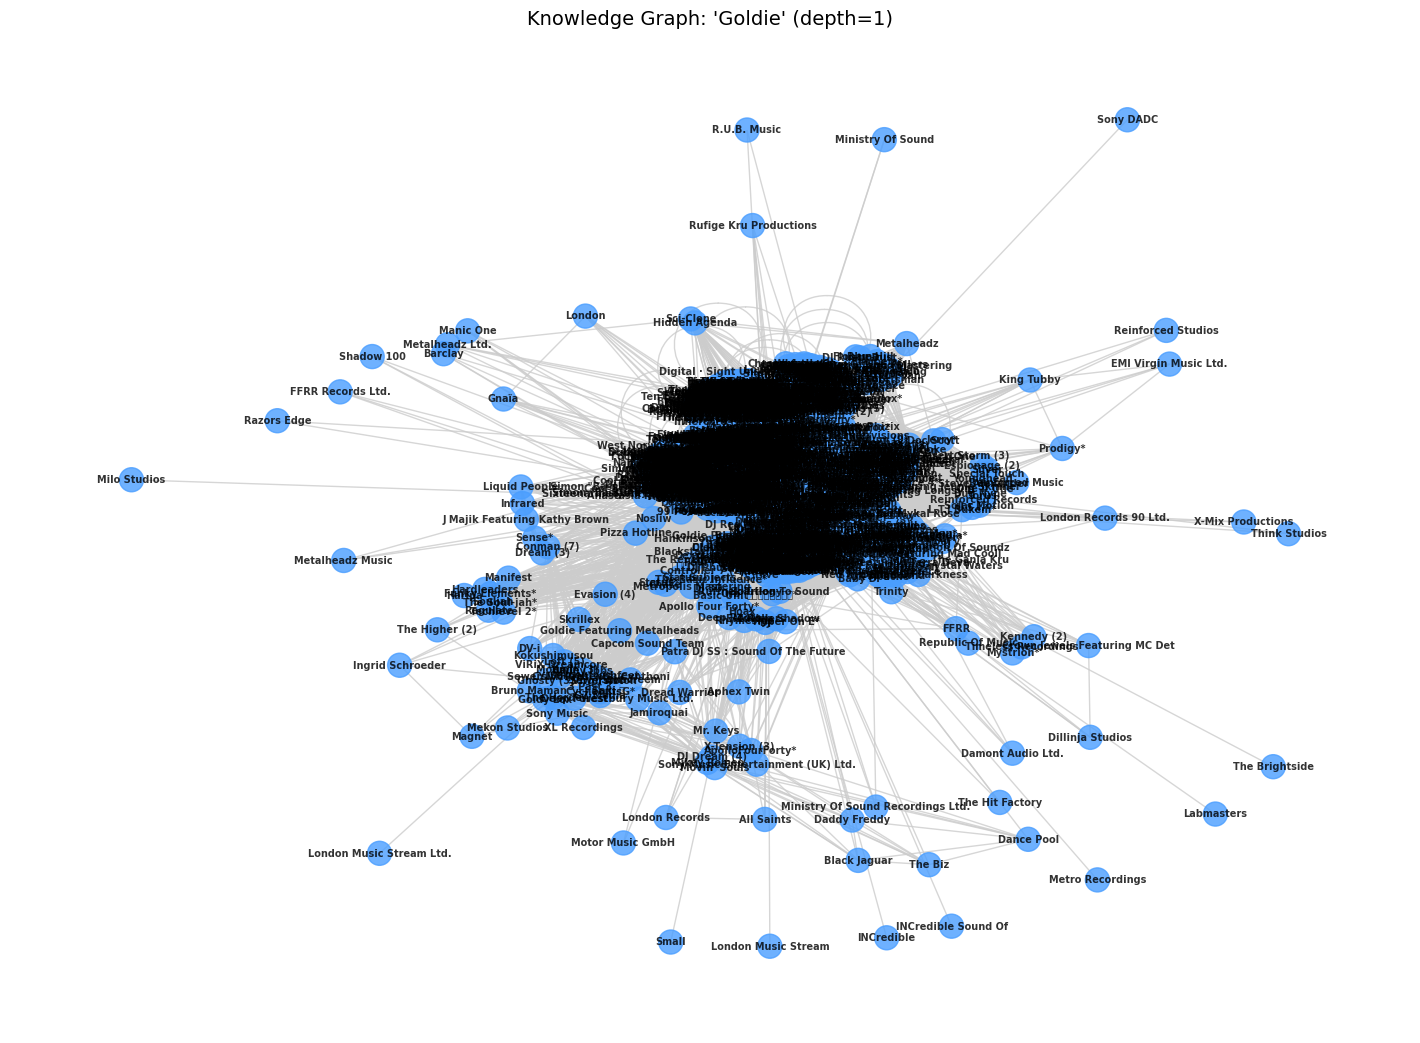

Subgraph: 50 nodes, 1226 edges


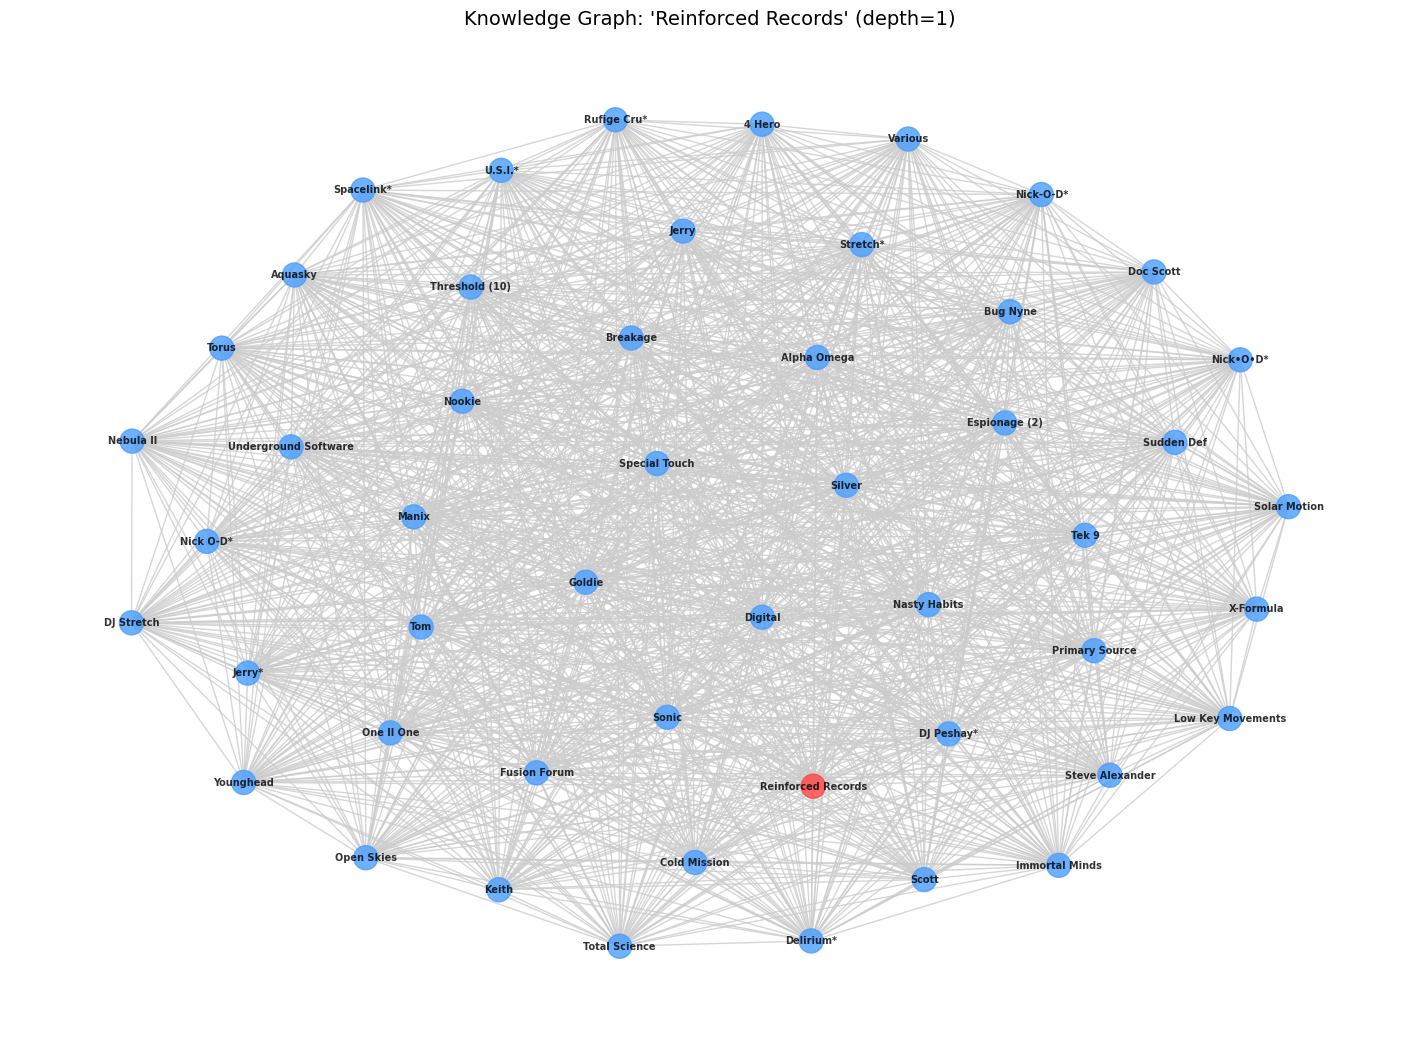

Subgraph: 1235 nodes, 268240 edges


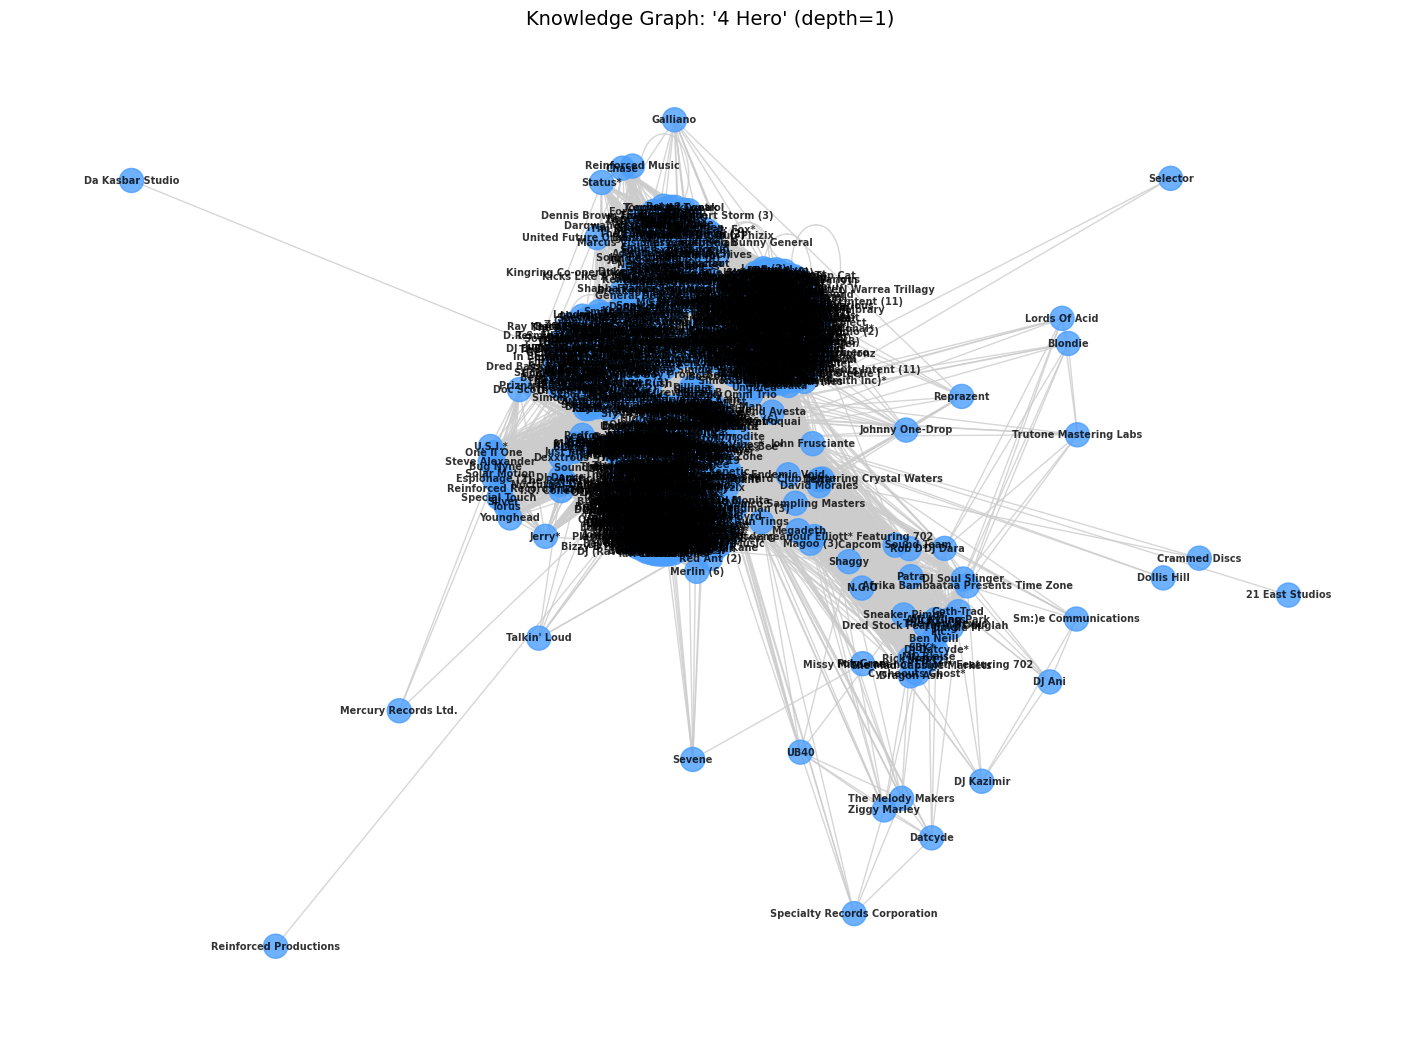

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle

# Load graph
with open('PROCESSING_CSVS/jungle/processed_vinyl/jungle_vinyl_graph.pkl', 'rb') as f:
    G = pickle.load(f)

print(f"Full graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

def plot_subgraph(G, center_node, depth=1):
    """Plot subgraph around a specific node."""
    if center_node not in G:
        print(f"'{center_node}' not in graph. Try these similar:")
        matches = [n for n in G.nodes() if center_node.lower() in n.lower()][:10]
        for m in matches:
            print(f"  - {m}")
        return
    
    # Get nodes within N hops
    nodes = {center_node}
    current = {center_node}
    for _ in range(depth):
        neighbors = set()
        for node in current:
            neighbors.update(G.neighbors(node))
        nodes.update(neighbors)
        current = neighbors
    
    subgraph = G.subgraph(nodes)
    print(f"Subgraph: {subgraph.number_of_nodes()} nodes, {subgraph.number_of_edges()} edges")
    
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(subgraph, k=2, iterations=50, seed=42)
    
    # Color seed node red
    colors = ['#ff4444' if n == center_node else '#4a9eff' for n in subgraph.nodes()]
    
    nx.draw(subgraph, pos,
            node_size=300,
            node_color=colors,
            edge_color='#cccccc',
            alpha=0.8,
            with_labels=True,
            font_size=7,
            font_weight='bold')
    
    plt.title(f"Knowledge Graph: '{center_node}' (depth={depth})", fontsize=14)
    plt.tight_layout()
    plt.savefig(f'subgraph_{center_node.replace(" ", "_").replace("/", "_")}.png', dpi=150)
    plt.show()

# === TRY THESE ===
plot_subgraph(G, 'Goldie', depth=1)
plot_subgraph(G, 'Reinforced Records', depth=1)
plot_subgraph(G, '4 Hero', depth=1)

In [25]:
# DJ Rashad subgraph plotting
def plot_clean_subgraph(G, center, depth=1):
    nodes = {center}
    current = {center}
    for _ in range(depth):
        neighbors = set()
        for node in current:
            neighbors.update(G.neighbors(node))
        nodes.update(neighbors)
        current = neighbors
    
    sub = G.subgraph(nodes)
    print(f"Subgraph: {sub.number_of_nodes()} nodes, {sub.number_of_edges()} edges")
    
    plt.figure(figsize=(16, 12), facecolor='white')
    pos = nx.spring_layout(sub, k=2, iterations=100, seed=42)
    
    # Size nodes by degree
    sizes = [sub.degree(n) * 50 + 100 for n in sub.nodes()]
    colors = ['#ff4444' if n == center else '#4a9eff' for n in sub.nodes()]
    
    nx.draw(sub, pos, node_size=sizes, node_color=colors, 
            edge_color='#cccccc', alpha=0.8, with_labels=True,
            font_size=9, font_weight='bold')
    
    plt.title(f"Knowledge Graph: {center} (depth={depth})", fontsize=16)
    plt.axis('off')
    plt.savefig(f'subgraph_{center.replace(" ", "_")}.png', dpi=200, bbox_inches='tight', facecolor='white')
    plt.show()

# Check if DJ Rashad is in there
if 'DJ Rashad' in G:
    plot_clean_subgraph(G, 'DJ Rashad', depth=1)
else:
    # Find similar
    matches = [n for n in G.nodes() if 'rashad' in n.lower()]
    print("Rashad matches:", matches)

Rashad matches: []


Main cluster: 269 nodes, 1093 edges


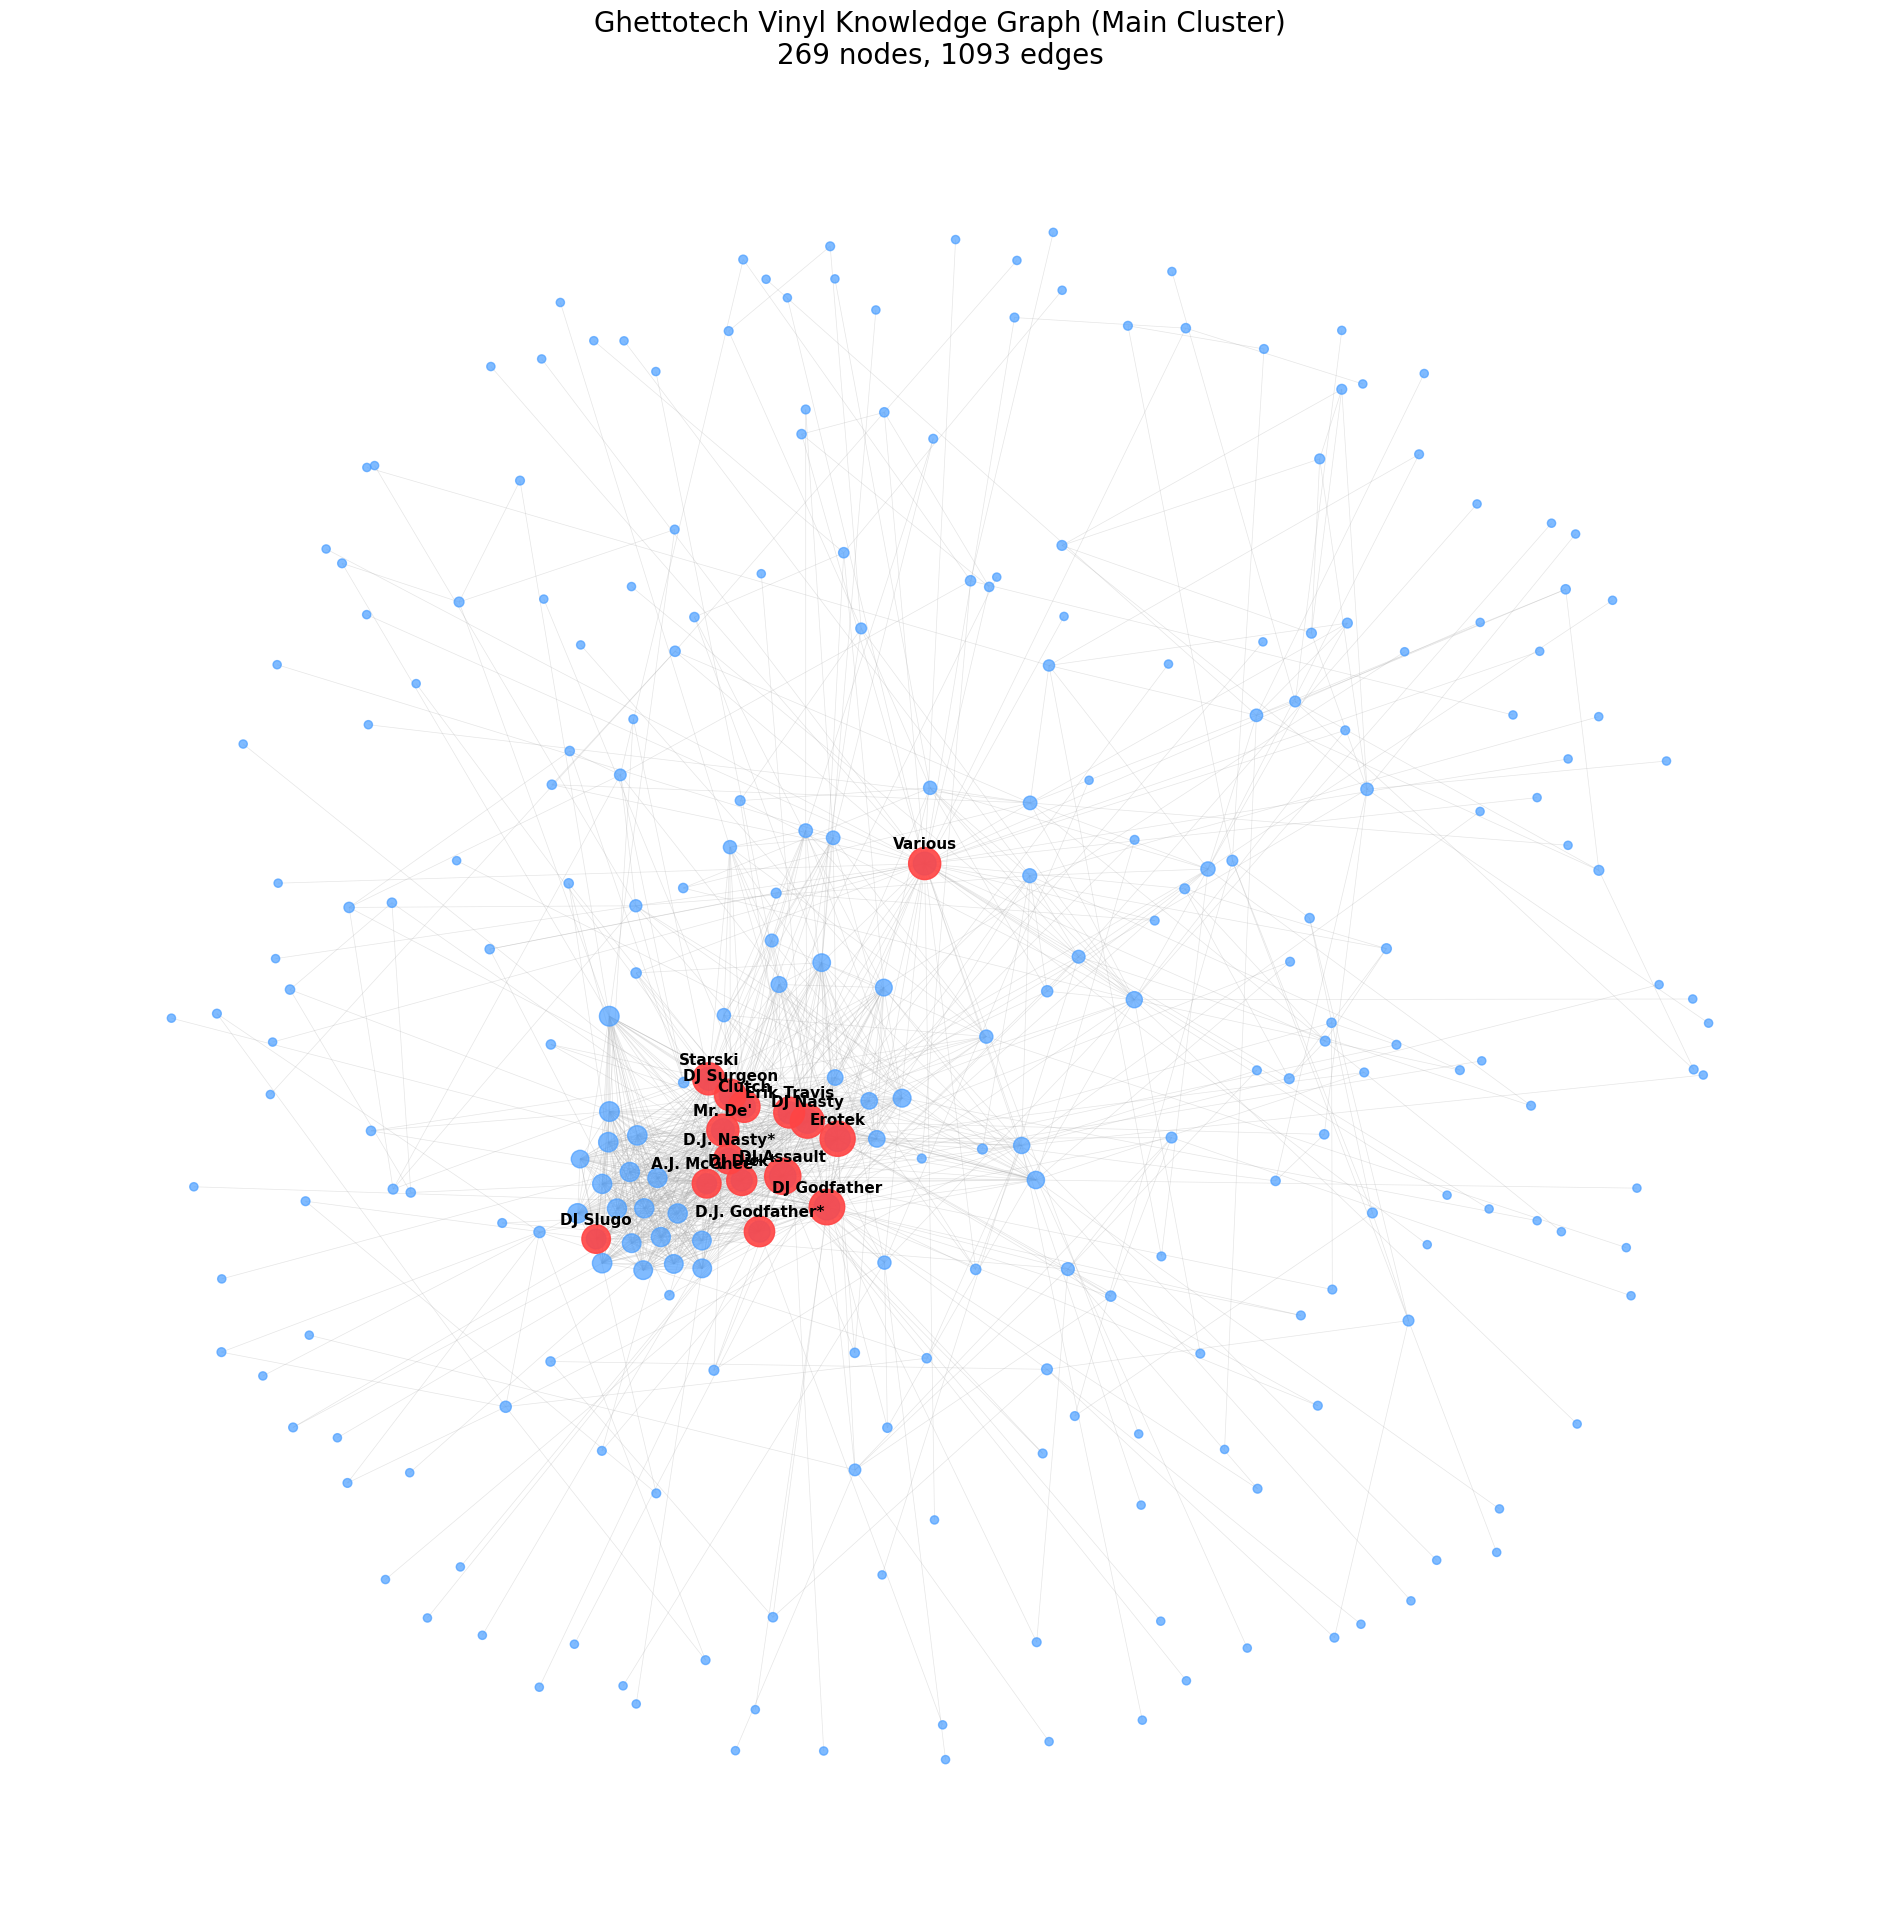


Top 15 most connected:
  DJ Assault: 66 connections
  DJ Godfather: 63 connections
  Erotek: 61 connections
  DJ Nasty: 56 connections
  Starski: 48 connections
  Various: 48 connections
  Mr. De': 48 connections
  Clutch: 46 connections
  DJ Surgeon: 46 connections
  Erik Travis: 43 connections
  D.J. Godfather*: 41 connections
  D.J. Nasty*: 40 connections
  DJ Dick*: 40 connections
  A.J. McGhee*: 35 connections
  DJ Slugo: 34 connections


In [26]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt

# Load ghettotech graph
with open('PROCESSING_CSVS/ghettotech/processed_vinyl/ghettotech_vinyl_graph.pkl', 'rb') as f:
    G = pickle.load(f)

# Keep only the largest connected component (removes outliers)
largest_cc = max(nx.connected_components(G), key=len)
G_main = G.subgraph(largest_cc).copy()

print(f"Main cluster: {G_main.number_of_nodes()} nodes, {G_main.number_of_edges()} edges")

# Plot
plt.figure(figsize=(24, 24), facecolor='white')
pos = nx.spring_layout(G_main, k=0.8, iterations=100, seed=42)

# Draw edges
nx.draw_networkx_edges(G_main, pos, edge_color='#aaaaaa', alpha=0.3, width=0.5)

# Draw all nodes - size by connections
node_sizes = [G_main.degree(n) * 5 + 30 for n in G_main.nodes()]
nx.draw_networkx_nodes(G_main, pos, node_size=node_sizes, node_color='#4a9eff', alpha=0.7)

# Top 15 most connected - highlight and label
top_nodes = sorted(G_main.degree(), key=lambda x: x[1], reverse=True)[:15]
top_node_names = [n[0] for n in top_nodes]

nx.draw_networkx_nodes(G_main, pos, nodelist=top_node_names, 
                       node_size=[G_main.degree(n) * 8 + 150 for n in top_node_names], 
                       node_color='#ff4444', alpha=0.9)

# Offset labels
label_pos = {k: (v[0], v[1] + 0.025) for k, v in pos.items()}
top_labels = {n: n for n in top_node_names}
nx.draw_networkx_labels(G_main, label_pos, top_labels, font_size=11, font_weight='bold')

plt.title(f"Ghettotech Vinyl Knowledge Graph (Main Cluster)\n{G_main.number_of_nodes()} nodes, {G_main.number_of_edges()} edges", fontsize=20)
plt.axis('off')
plt.savefig('ghettotech_graph_main.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()

# Print top connected
print("\nTop 15 most connected:")
for name, degree in top_nodes:
    print(f"  {name}: {degree} connections")

In [6]:
import pickle

BASE_PATH = 'PROCESSING_CSVS'

# Check all genre graphs
for folder in sorted(os.listdir(BASE_PATH)):
    if folder == '_combined' or folder.startswith('.'):
        continue
    
    graph_path = os.path.join(BASE_PATH, folder, 'processed_vinyl', f'{folder}_vinyl_graph.pkl')
    
    if os.path.exists(graph_path):
        with open(graph_path, 'rb') as f:
            G = pickle.load(f)
        print(f"{folder}: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
    else:
        print(f"{folder}: no vinyl graph")

acid_house: 19920 nodes, 349408 edges
baltimore_club: 606 nodes, 2044 edges
bassline: 1624 nodes, 3544 edges
bleep: 1887 nodes, 10017 edges
breakbeat: 33430 nodes, 1448675 edges
breakbeat_acid: 2971 nodes, 10104 edges
breakbeat_happy_hardcore: 1126 nodes, 12583 edges
breakbeat_hardcore: 7051 nodes, 312724 edges
breakbeat_hardcore_happy_hardcore: 601 nodes, 3468 edges
breakbeat_hardcore_jungle: 1923 nodes, 40411 edges
breakbeat_hardcore_techno: 2230 nodes, 17561 edges
breakbeat_house: 8694 nodes, 57821 edges
dj_battle_tool: 2508 nodes, 6700 edges
dnb: 25915 nodes, 2679809 edges
donk: 1359 nodes, 21132 edges
dub_jungle: 654 nodes, 1144 edges
dubstep: 8263 nodes, 246120 edges
electro: 66284 nodes, 3915388 edges
electro_funk: 5483 nodes, 51687 edges
footwork: 581 nodes, 1440 edges
freetekno: 3661 nodes, 96022 edges
gabber: 5036 nodes, 188635 edges
ghetto: 2266 nodes, 16057 edges
ghetto_house: 1433 nodes, 12952 edges
ghettotech: 570 nodes, 1332 edges
happy_hardcore: 6159 nodes, 142721 edges

Hardcore Techno Jungle: 290 nodes, 618 edges


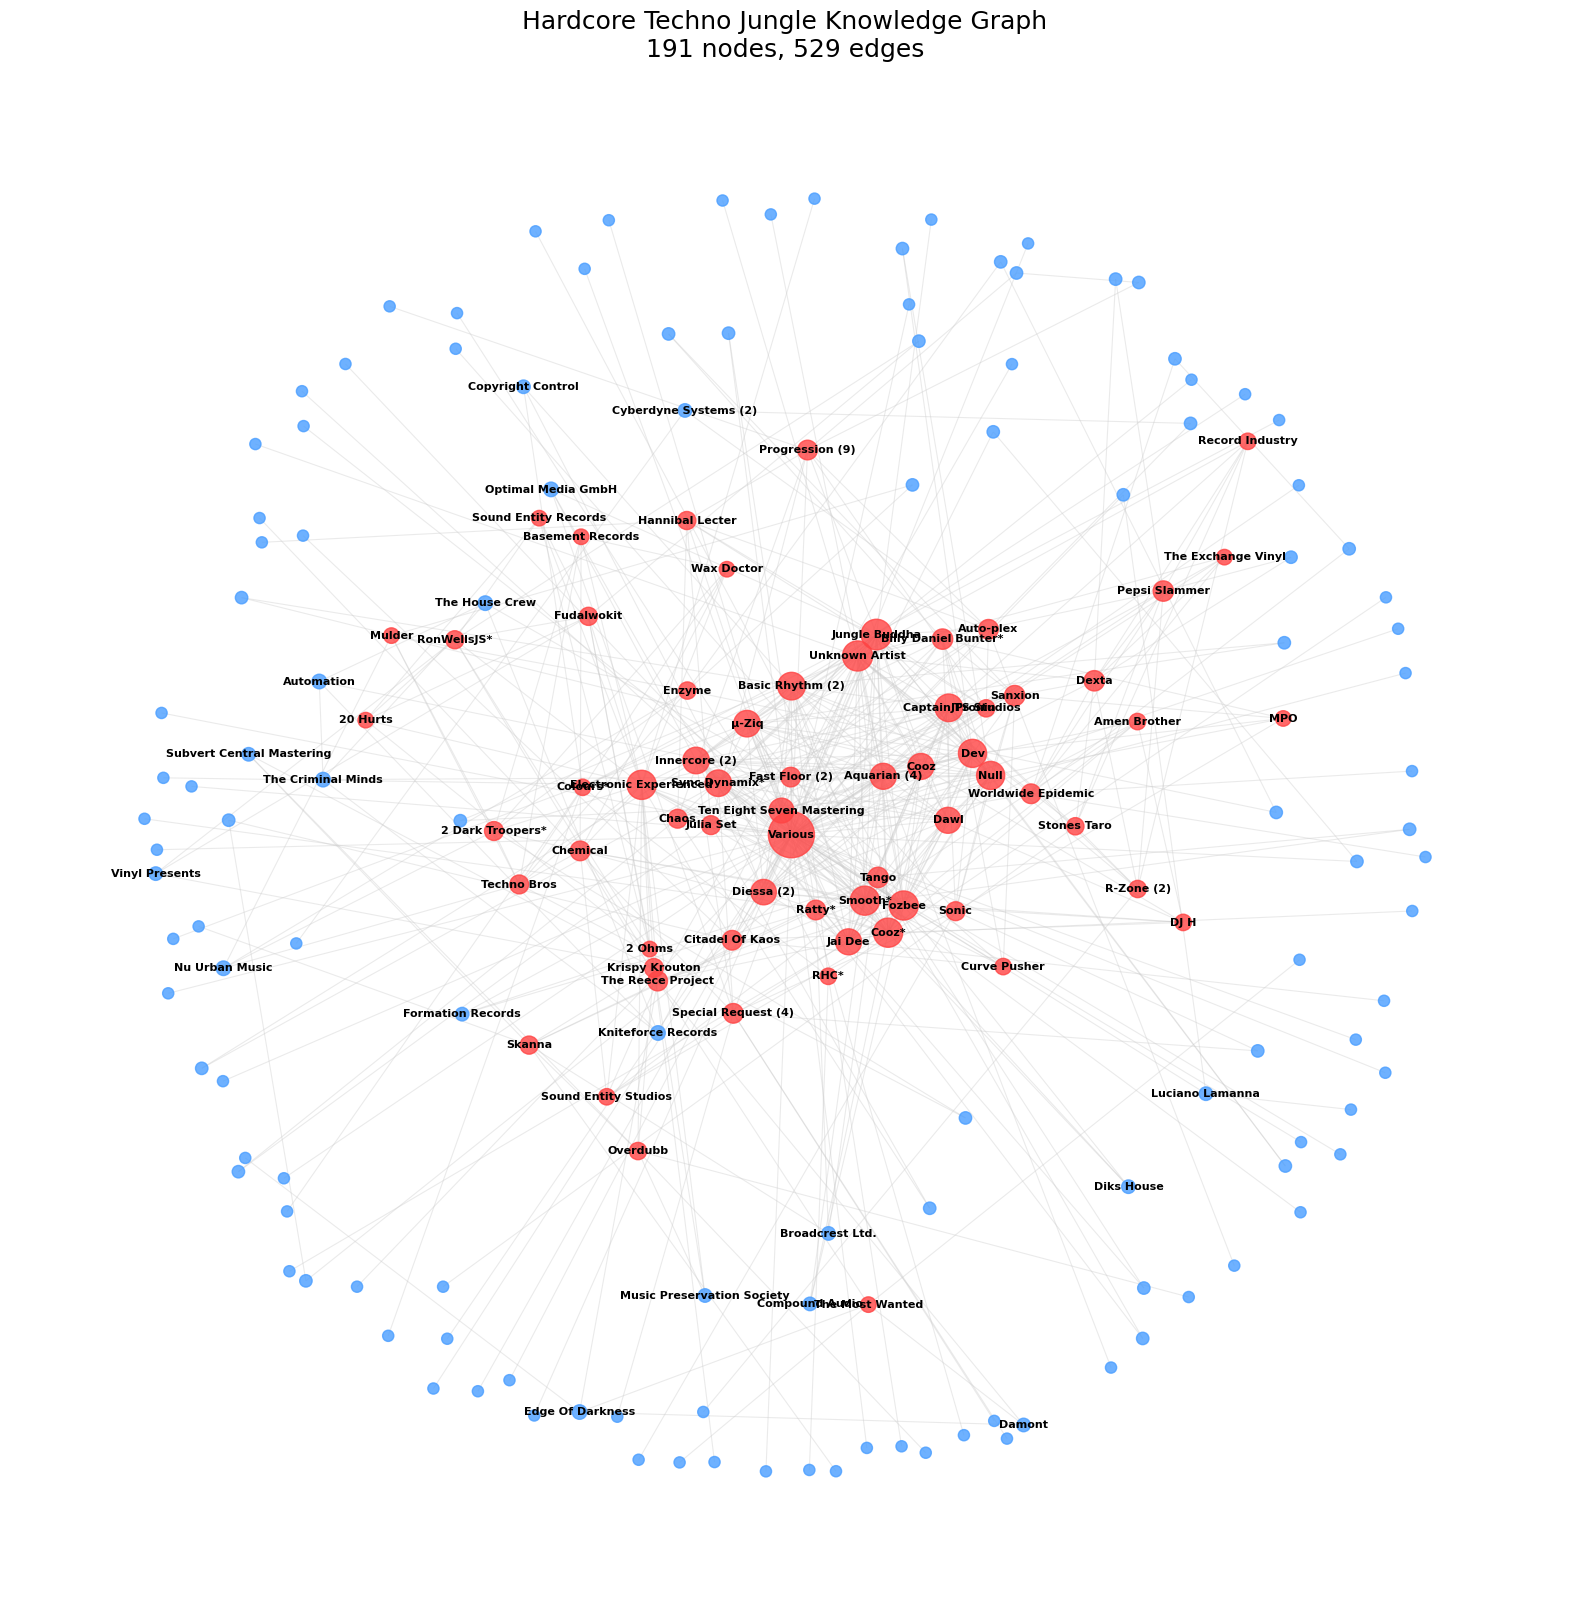

In [27]:
# Load hardcore_techno_jungle
with open('PROCESSING_CSVS/hardcore_techno_jungle/processed_vinyl/hardcore_techno_jungle_vinyl_graph.pkl', 'rb') as f:
    G = pickle.load(f)

print(f"Hardcore Techno Jungle: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

# Get main cluster
largest_cc = max(nx.connected_components(G), key=len)
G_main = G.subgraph(largest_cc).copy()


# Plot
plt.figure(figsize=(20, 20), facecolor='white')
pos = nx.spring_layout(G_main, k=1.2, iterations=100, seed=42)

# Size by connections
node_sizes = [G_main.degree(n) * 15 + 50 for n in G_main.nodes()]
colors = ['#ff4444' if G_main.degree(n) >= 5 else '#4a9eff' for n in G_main.nodes()]

nx.draw_networkx_edges(G_main, pos, edge_color='#cccccc', alpha=0.4, width=0.8)
nx.draw_networkx_nodes(G_main, pos, node_size=node_sizes, node_color=colors, alpha=0.8)

# Label nodes with 3+ connections
labels = {n: n for n in G_main.nodes() if G_main.degree(n) >= 3}
nx.draw_networkx_labels(G_main, pos, labels, font_size=8, font_weight='bold')

plt.title(f"Hardcore Techno Jungle Knowledge Graph\n{G_main.number_of_nodes()} nodes, {G_main.number_of_edges()} edges", fontsize=18)
plt.axis('off')
plt.savefig('hardcore_techno_jungle_graph.png', dpi=200, bbox_inches='tight', facecolor='white')
plt.show()